In [1]:
library(tidyverse)
library(gridExtra)
library(grid)
library(RColorBrewer)
library(caret)

Warning message:
"package 'ggplot2' was built under R version 4.3.1"
Warning message:
"package 'tidyr' was built under R version 4.3.1"
Warning message:
"package 'readr' was built under R version 4.3.1"
Warning message:
"package 'dplyr' was built under R version 4.3.1"
Warning message:
"package 'stringr' was built under R version 4.3.1"
Warning message:
"package 'lubridate' was built under R version 4.3.1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'gridExtra'


The following object is masked f

In [2]:
options(
    repr.plot.width = 20,
    repr.plot.height = 15
)

In [3]:
# a custome theme for the graphs to make them look nicer with larger fonts
custom_theme <- function() {
    theme_minimal() +
    theme(
        text = element_text(size = 20),
        plot.title = element_text(size = 30, hjust = 0.5),
        axis.text.x = element_text(size = 20),
        axis.title = element_text(size = 25),
        legend.title = element_text(size = 25),
        legend.text = element_text(size = 15),
        strip.text = element_text(size = 20)
    )
}

# set the custom theme for all plots

theme_set(custom_theme())

In [4]:
# read the csv file 

df <- read_csv("./data-2.csv", col_type = cols())

The results of each person was appended to the csv file (ordering for test is preserved for each person)

In [5]:
# show df

df %>% head()

time,coffee,reaction_time,person
<chr>,<chr>,<dbl>,<chr>
morning,yes,289,Michael
morning,yes,287,Michael
morning,yes,267,Michael
midday,yes,323,Michael
afternoon,yes,321,Michael
midday,yes,250,Michael


In [6]:
# conver time to a factor 

df$time <- factor(df$time, levels = c("morning", "midday", "afternoon"))

In [7]:
df$person %>% typeof()

[1] "character"

In [8]:
# seperate data into training and testing with training having 80 % 

set.seed(4269)
trainIndex <- createDataPartition(df$person, p = 0.8, 
                                  list = FALSE, 
                                  times = 1)

training <- df[trainIndex, ]
testing <- df[-trainIndex, ]

# Exploratory analysis

What we expect for our analysis?

- Does time influence the reaction time?
- Does Coffee influence reaction time?
- Does person influence reaction time?
- Does the interaction between coffee and person influence reaction time?
- Does the interaction between time and person influence reaction time?
- Does the interaction between time and coffee influence reaction time?

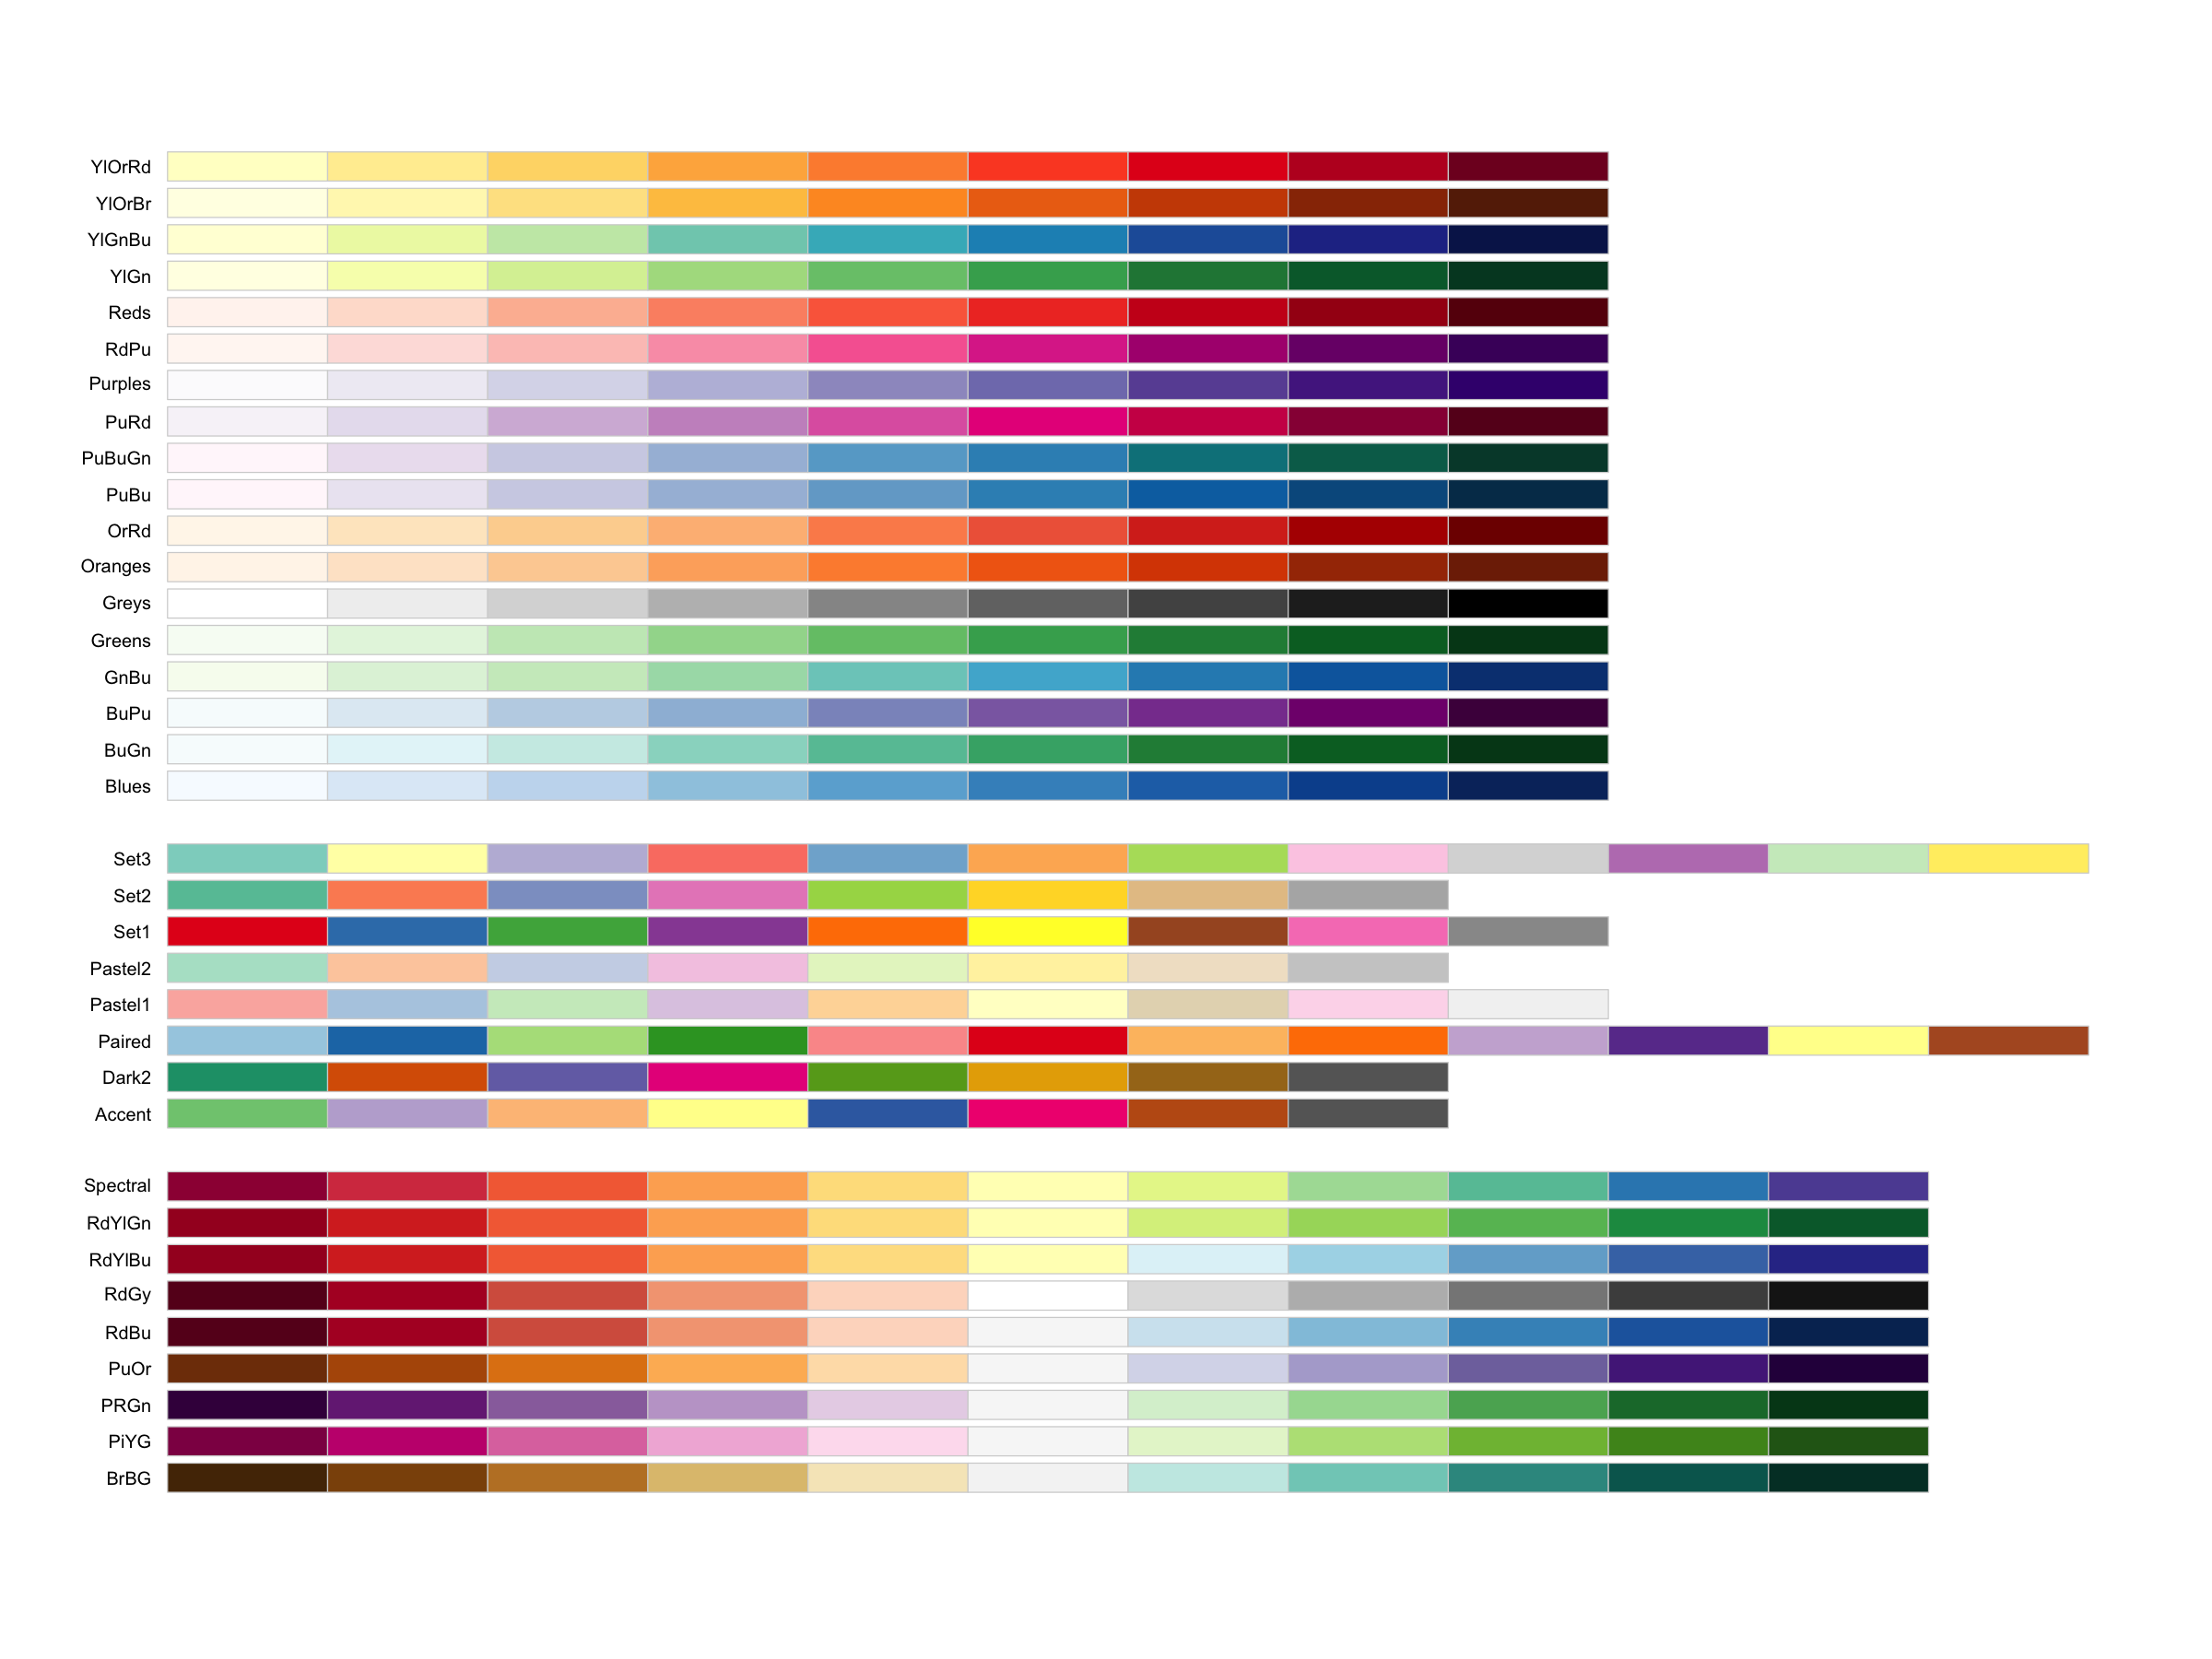

In [9]:
display.brewer.all() 

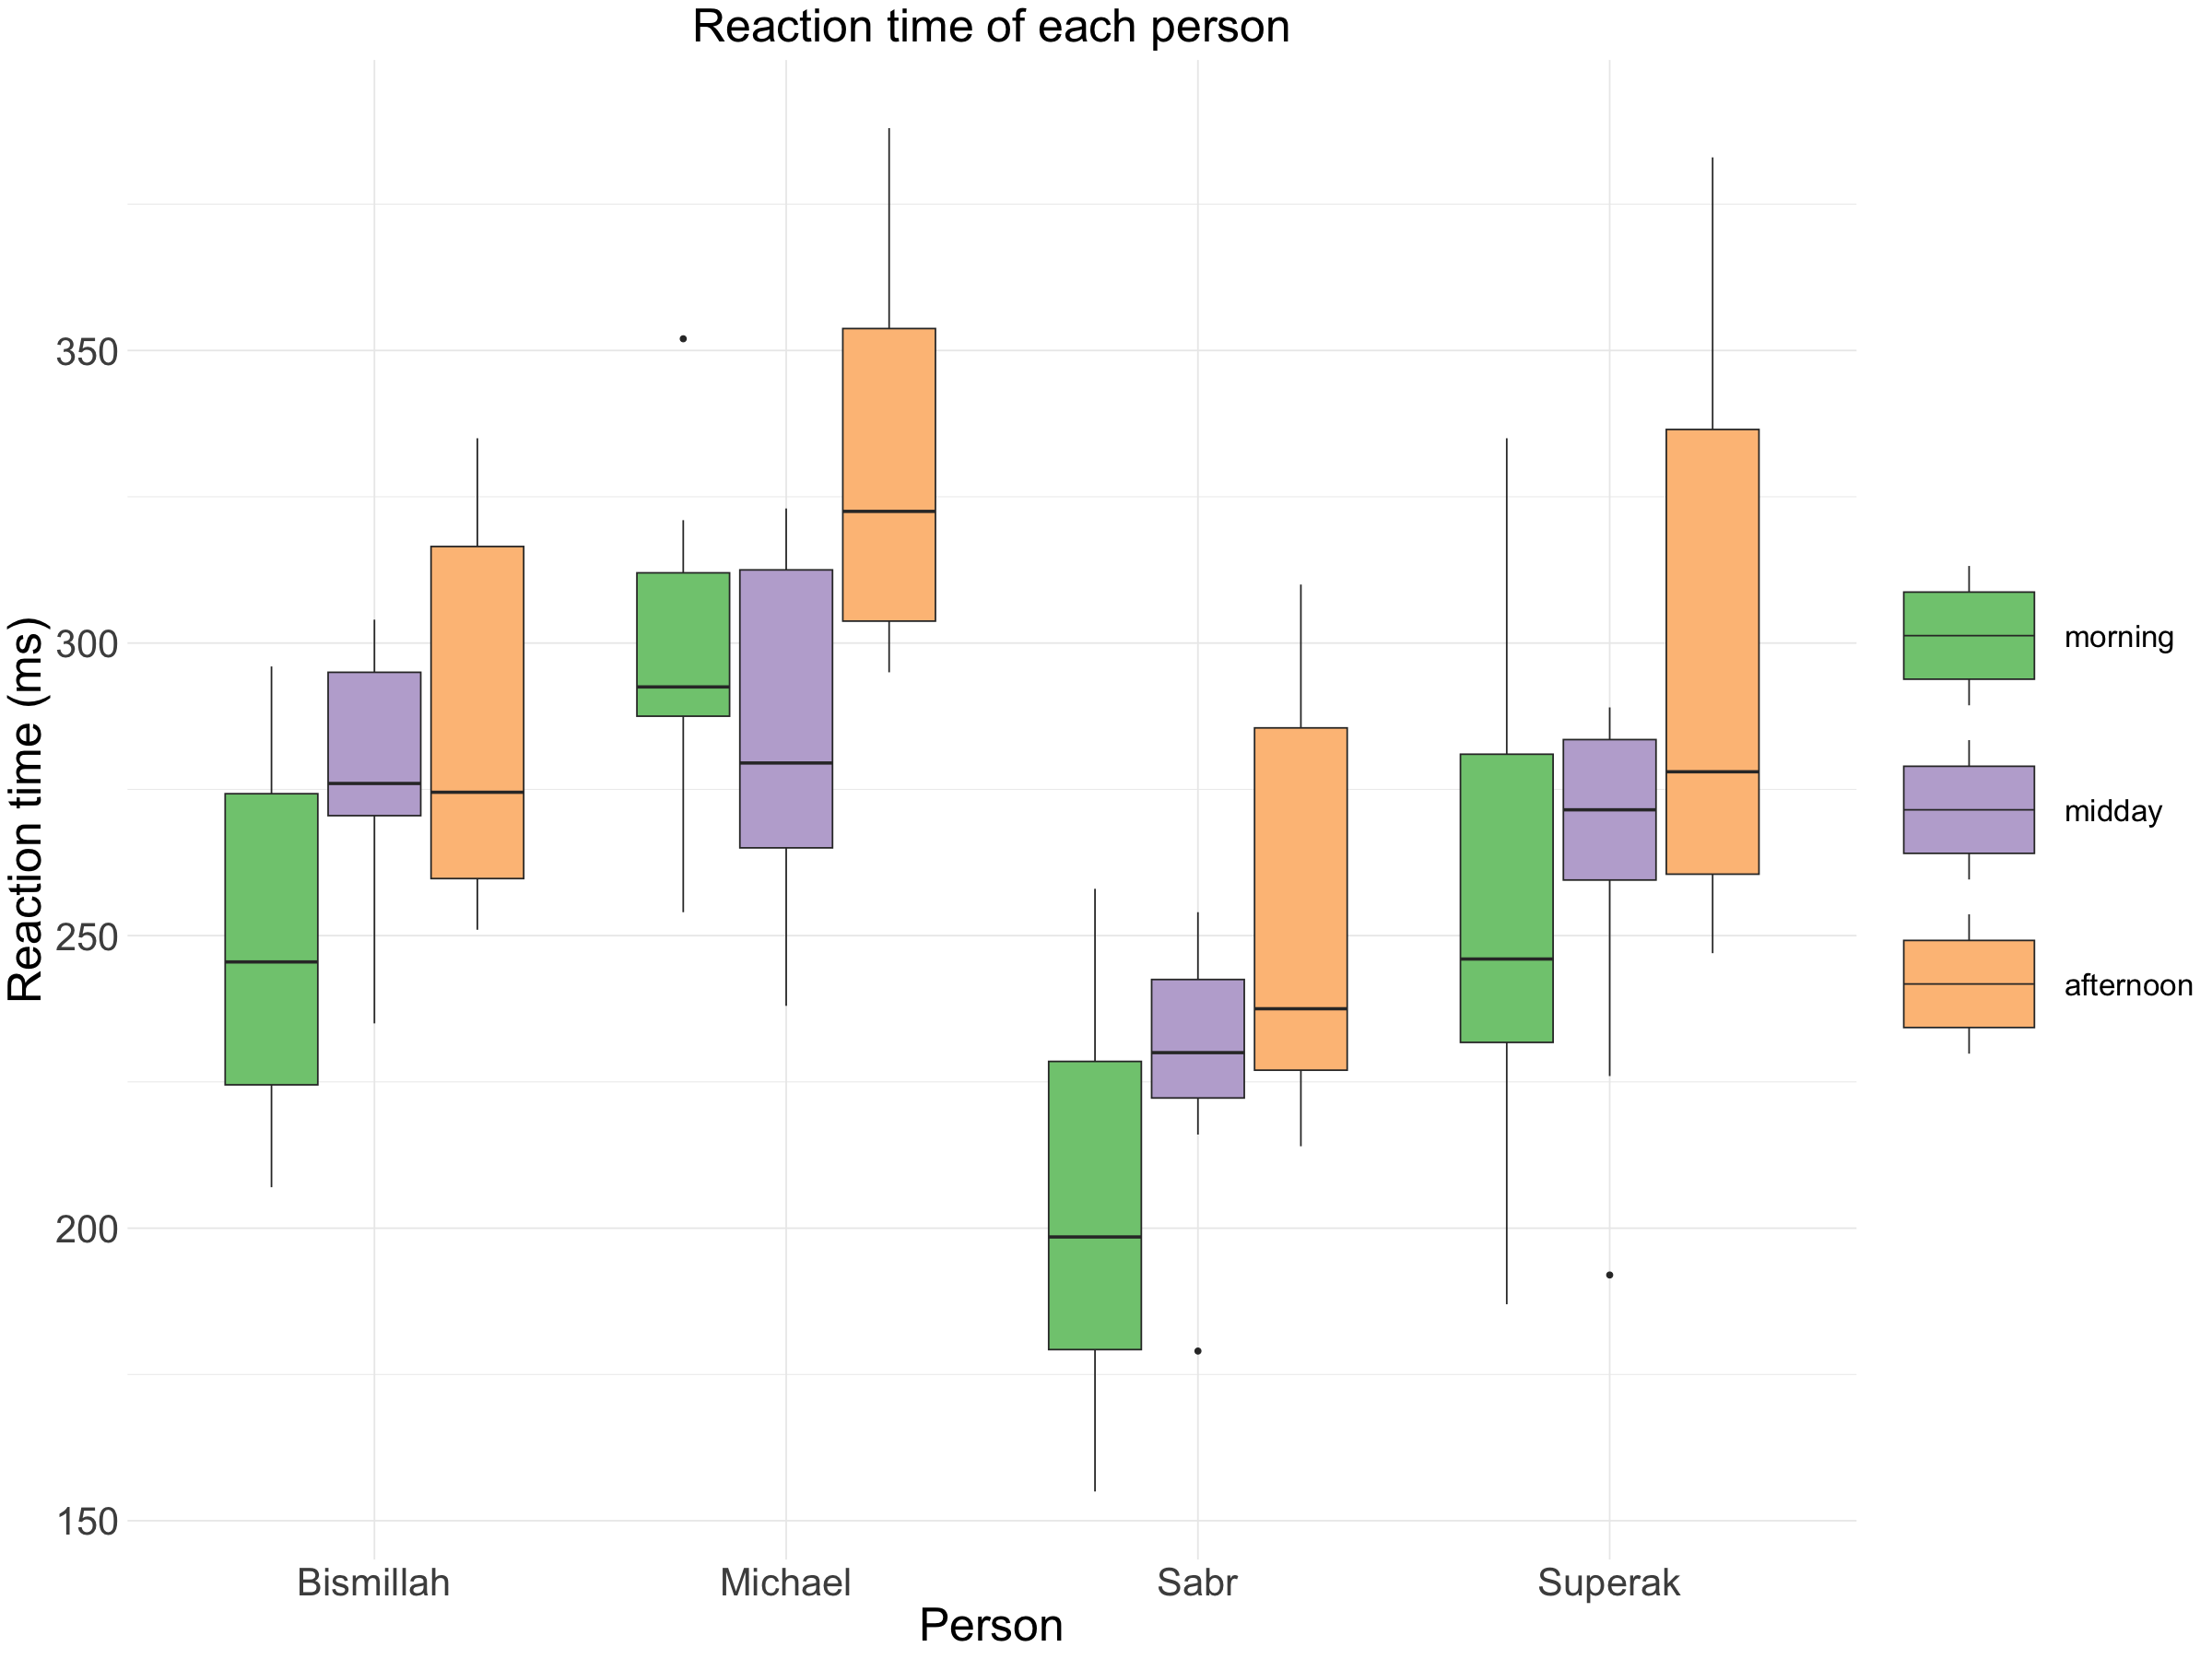

In [10]:
# does person, and time have influence on the reaction time ?

person_time_graph <- df %>%
    ggplot(aes(y = reaction_time, x = person, fill = time)) +
    geom_boxplot() +
    theme_minimal() +
    labs(
        title = "Reaction time of each person",
        x = "Person",
        y = "Reaction time (ms)"
    ) +
    theme(
        axis.text.x = element_text(size = 25),
        axis.text.y = element_text(size = 25),
        axis.title = element_text(size = 30),
        plot.title = element_text(size = 30, hjust = 0.5),
        legend.key.size = unit(4, "cm"),
        legend.text = element_text(size = 20),
        legend.title = element_blank()
    ) +
    scale_fill_brewer(palette = "Accent")



person_time_graph

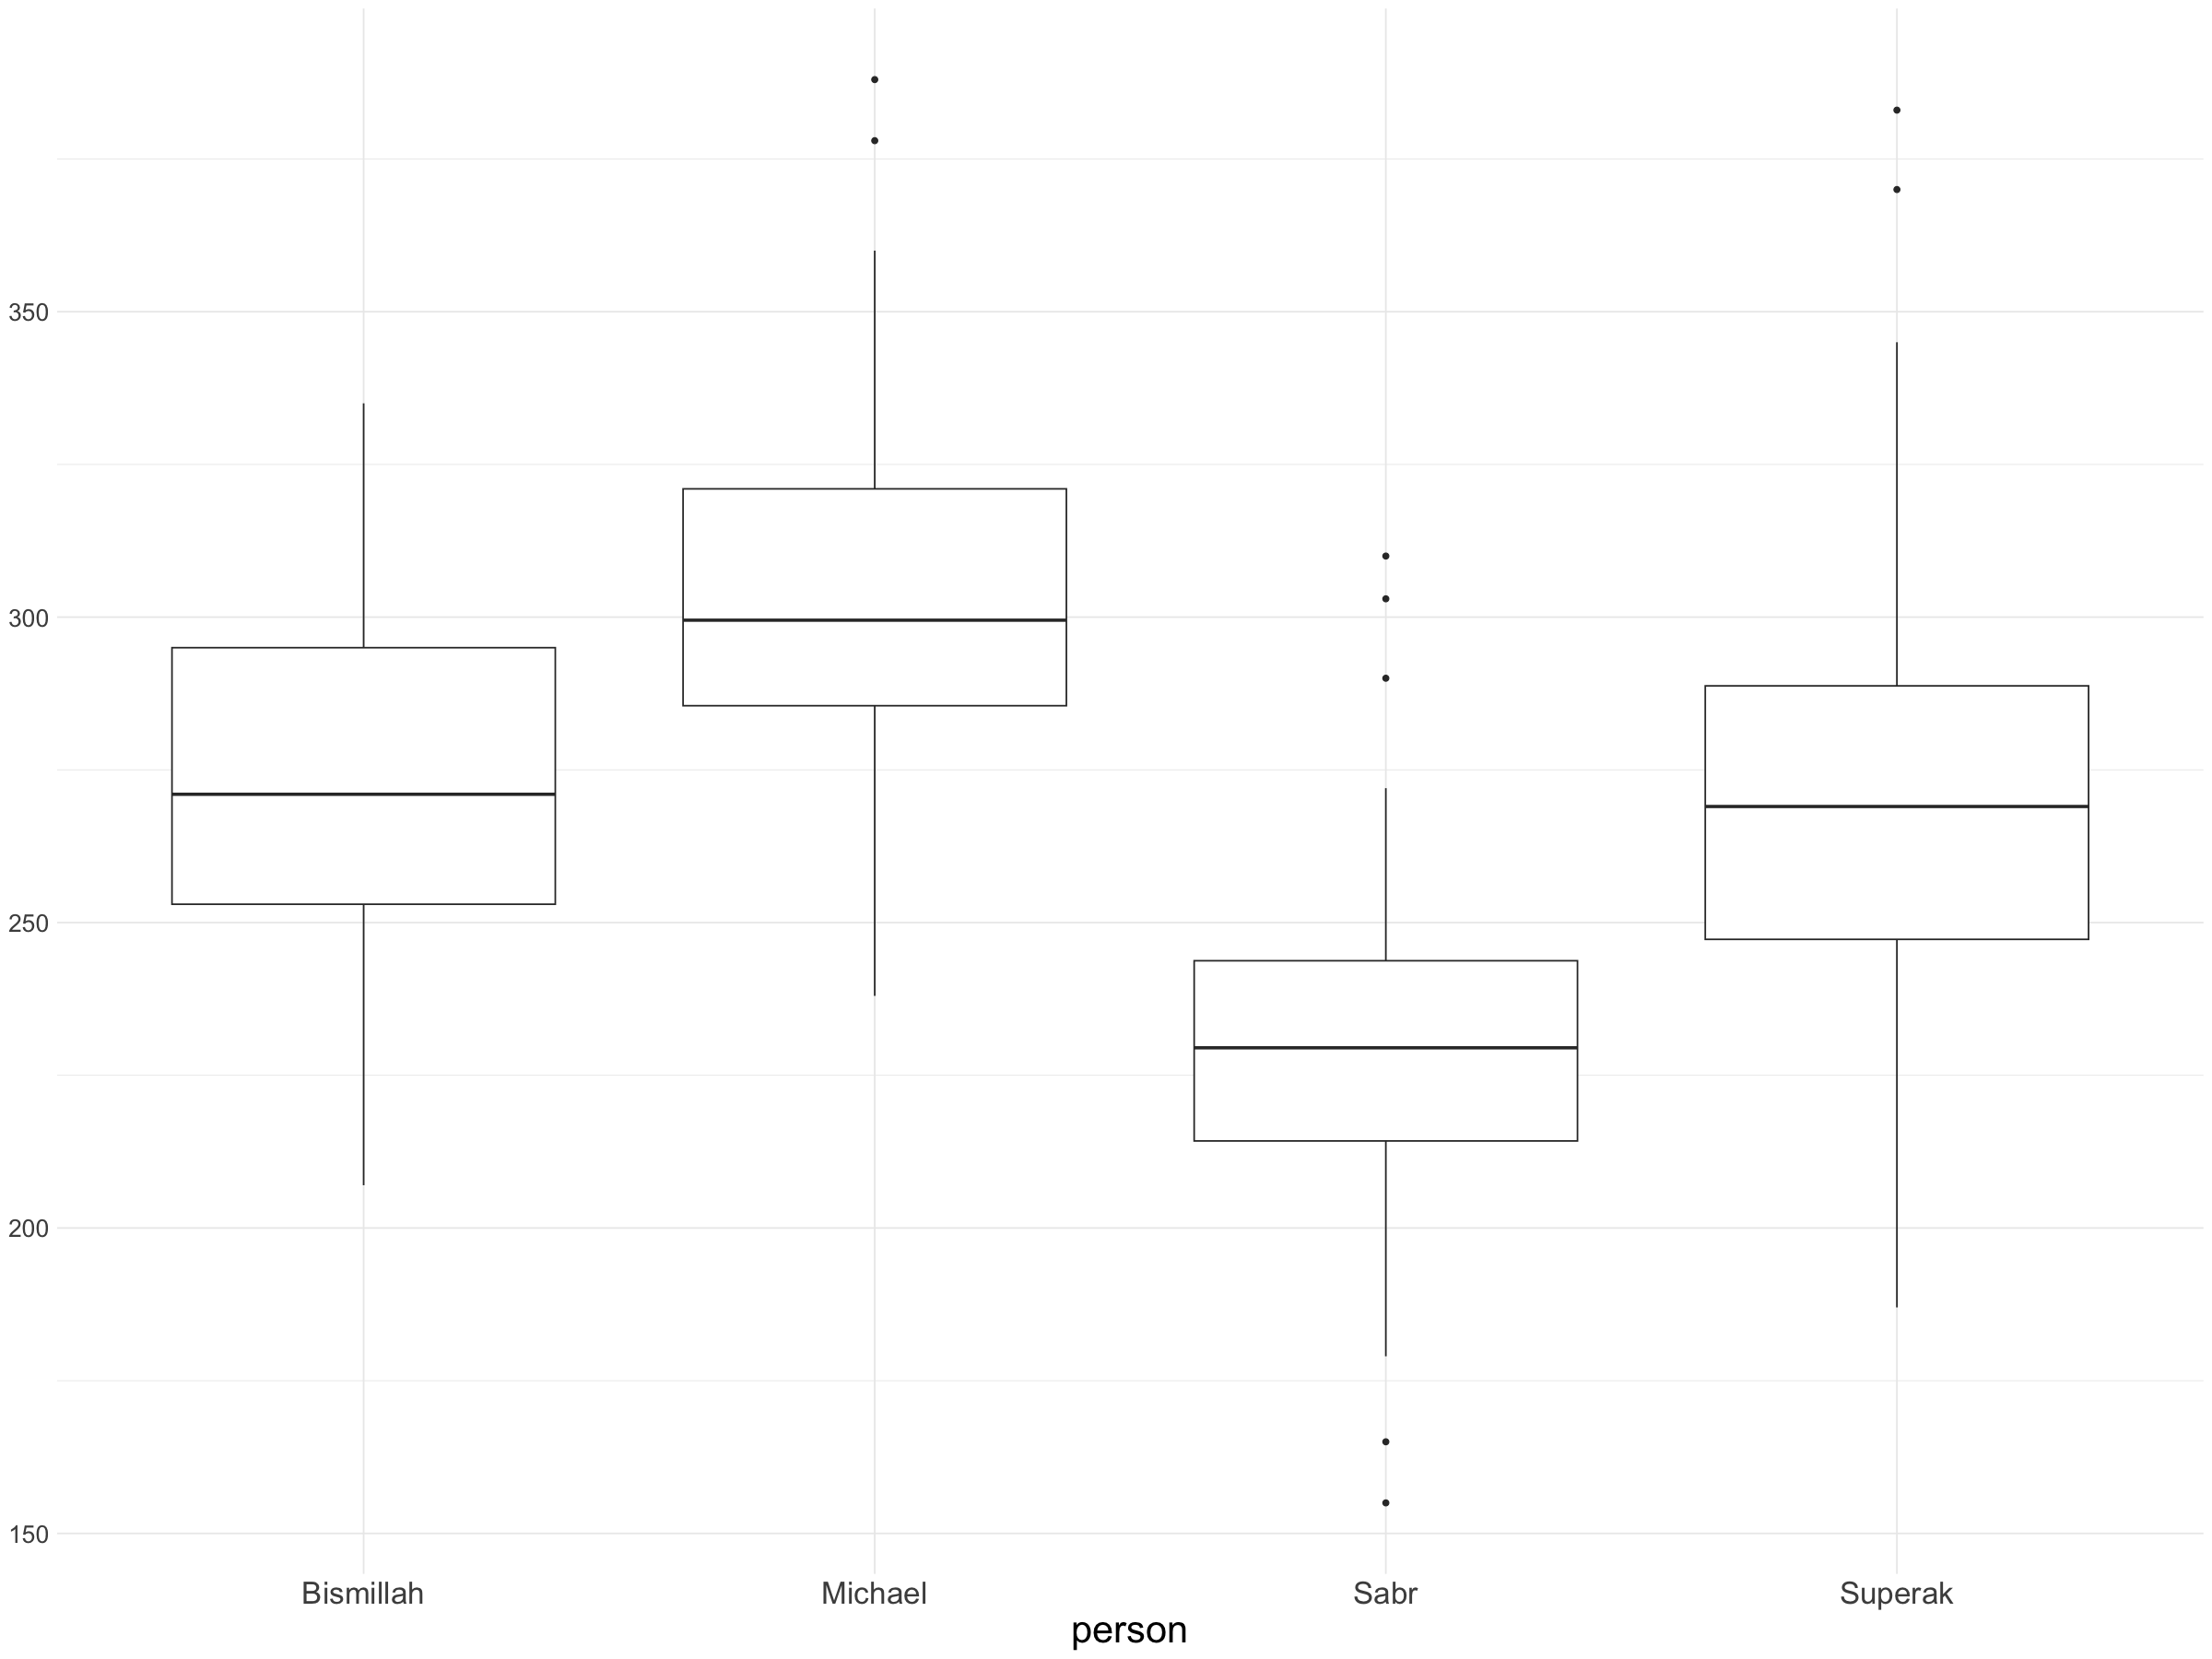

In [11]:
# person and reaction time 

person_graph <- df %>% ggplot(aes(x = person, y = reaction_time, group = person)) +
    geom_boxplot() +
    theme(
        axis.title.y = element_blank()
    )

person_graph

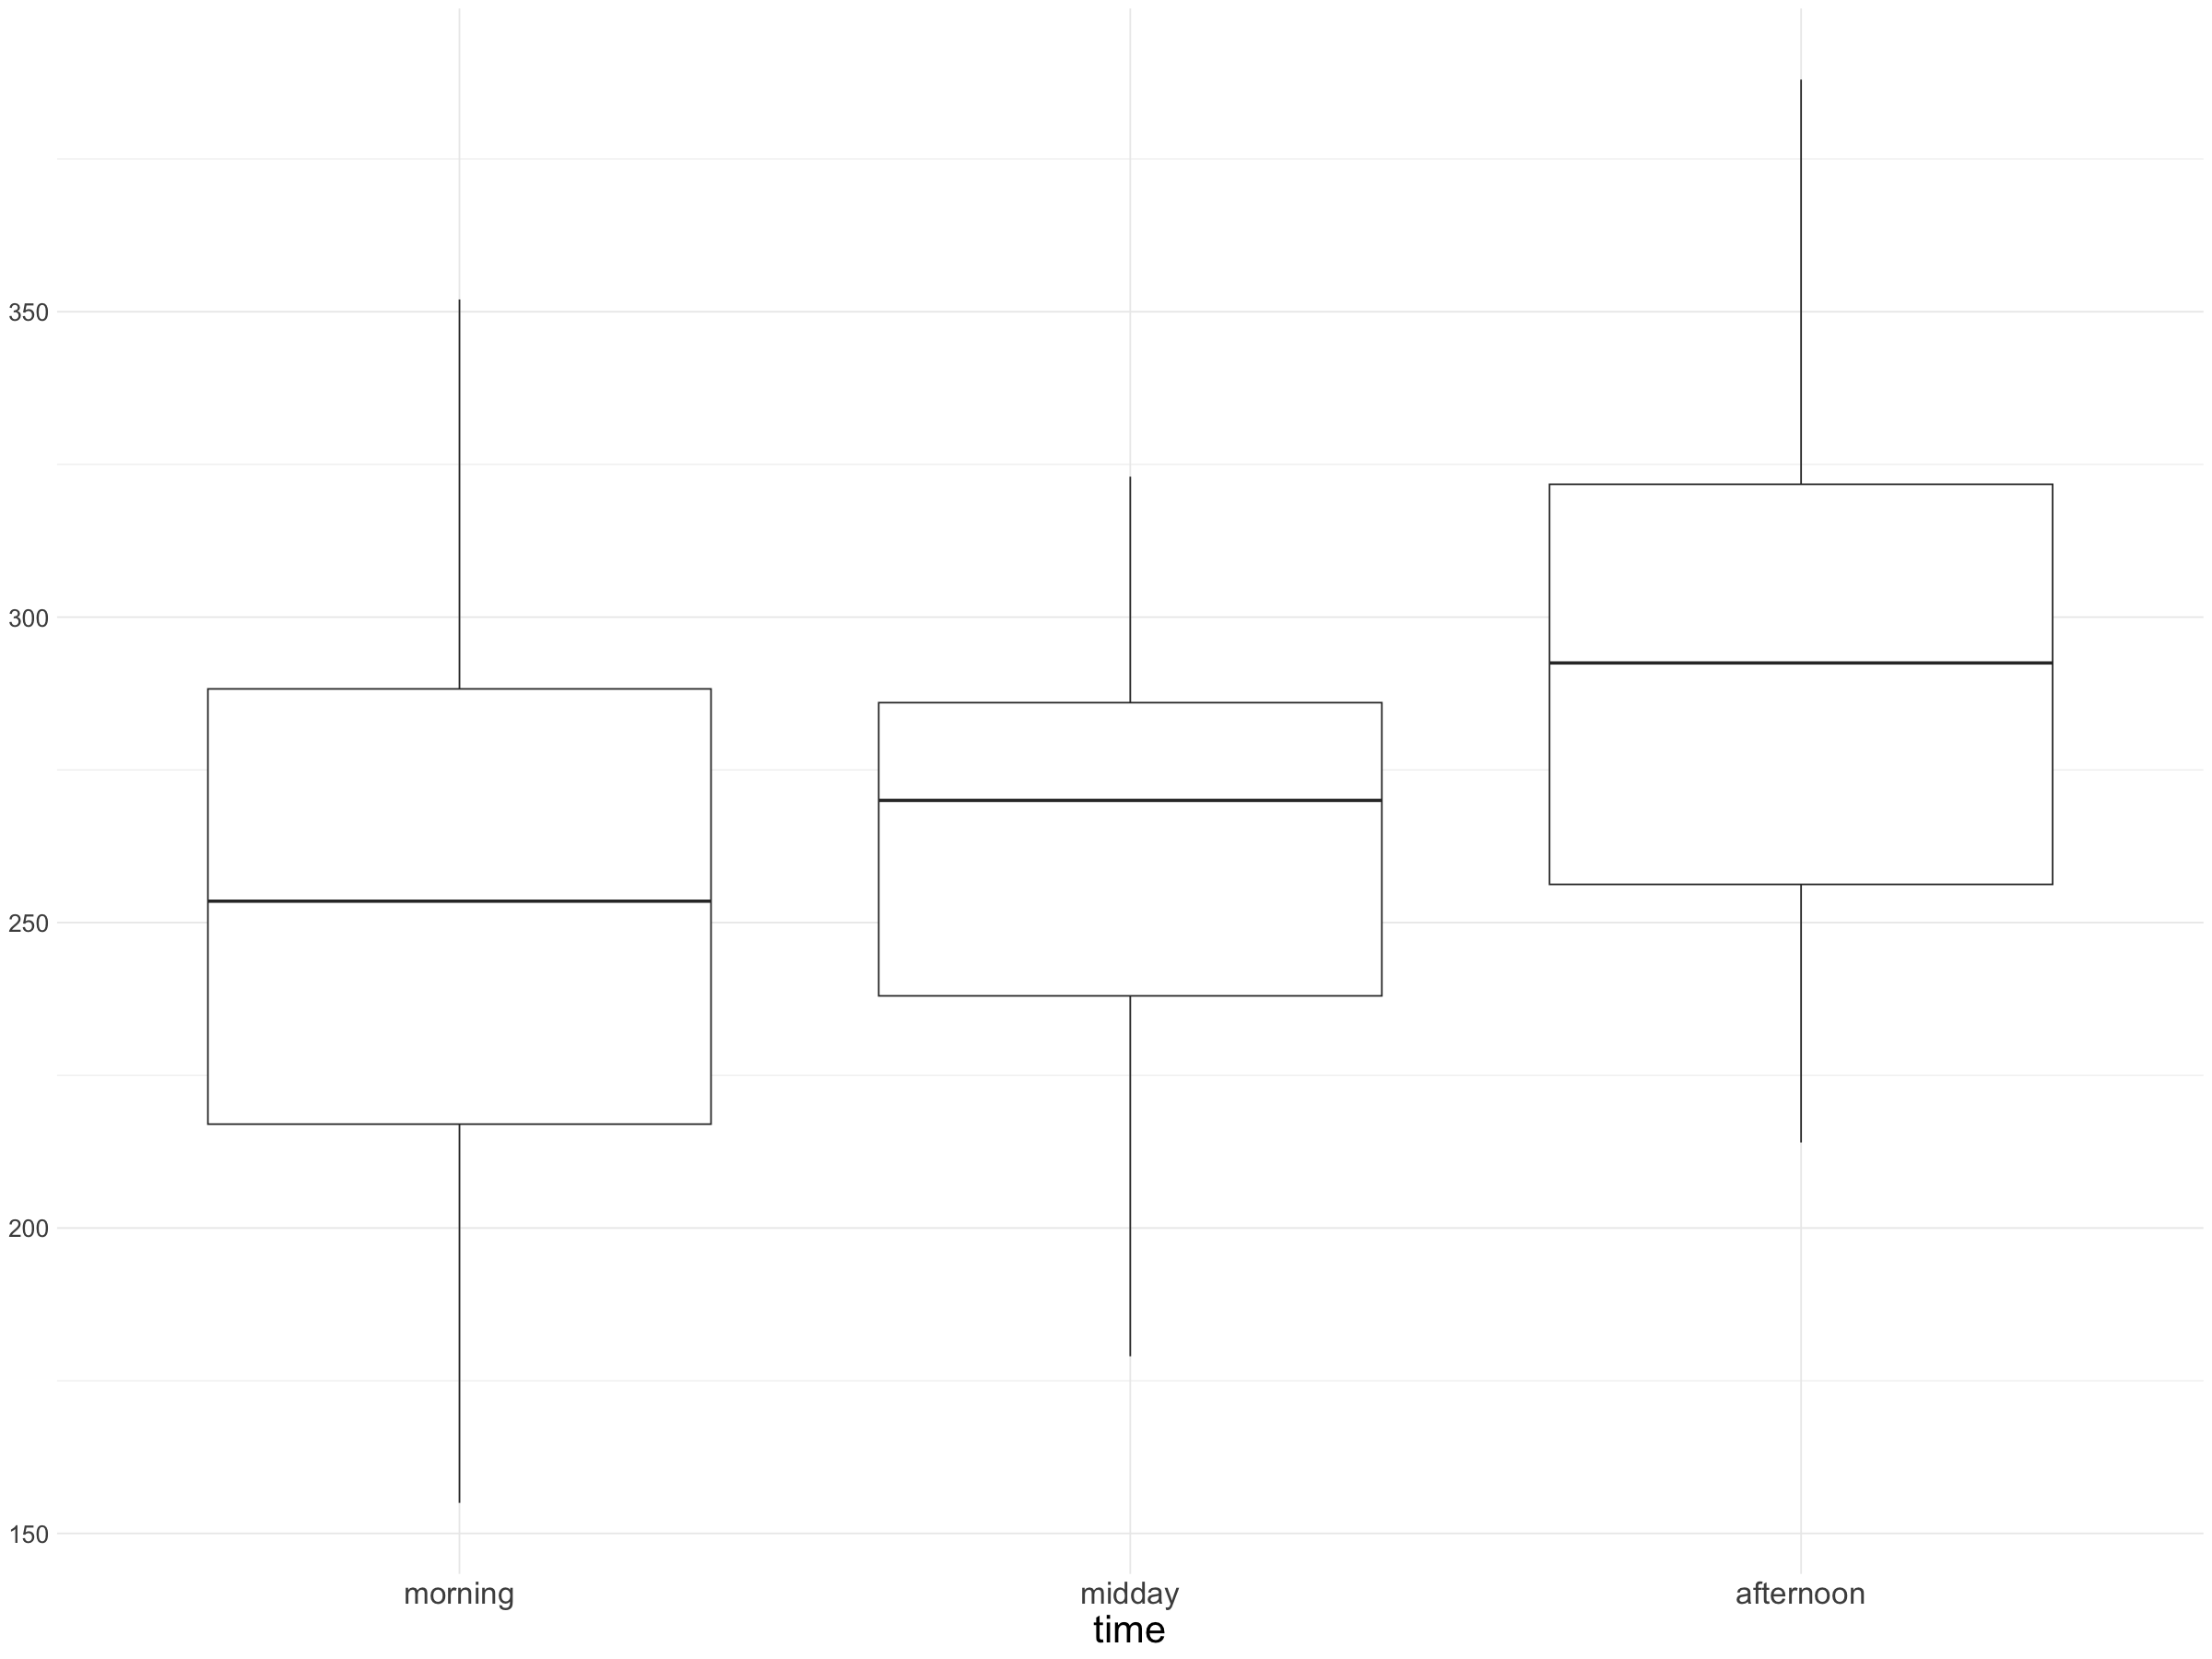

In [12]:
# time and reaction time graph

time_graph <- df %>% ggplot(aes(x = time, y = reaction_time, group = time)) +
    geom_boxplot() +
    theme(
        axis.title.y = element_blank()
    )

time_graph


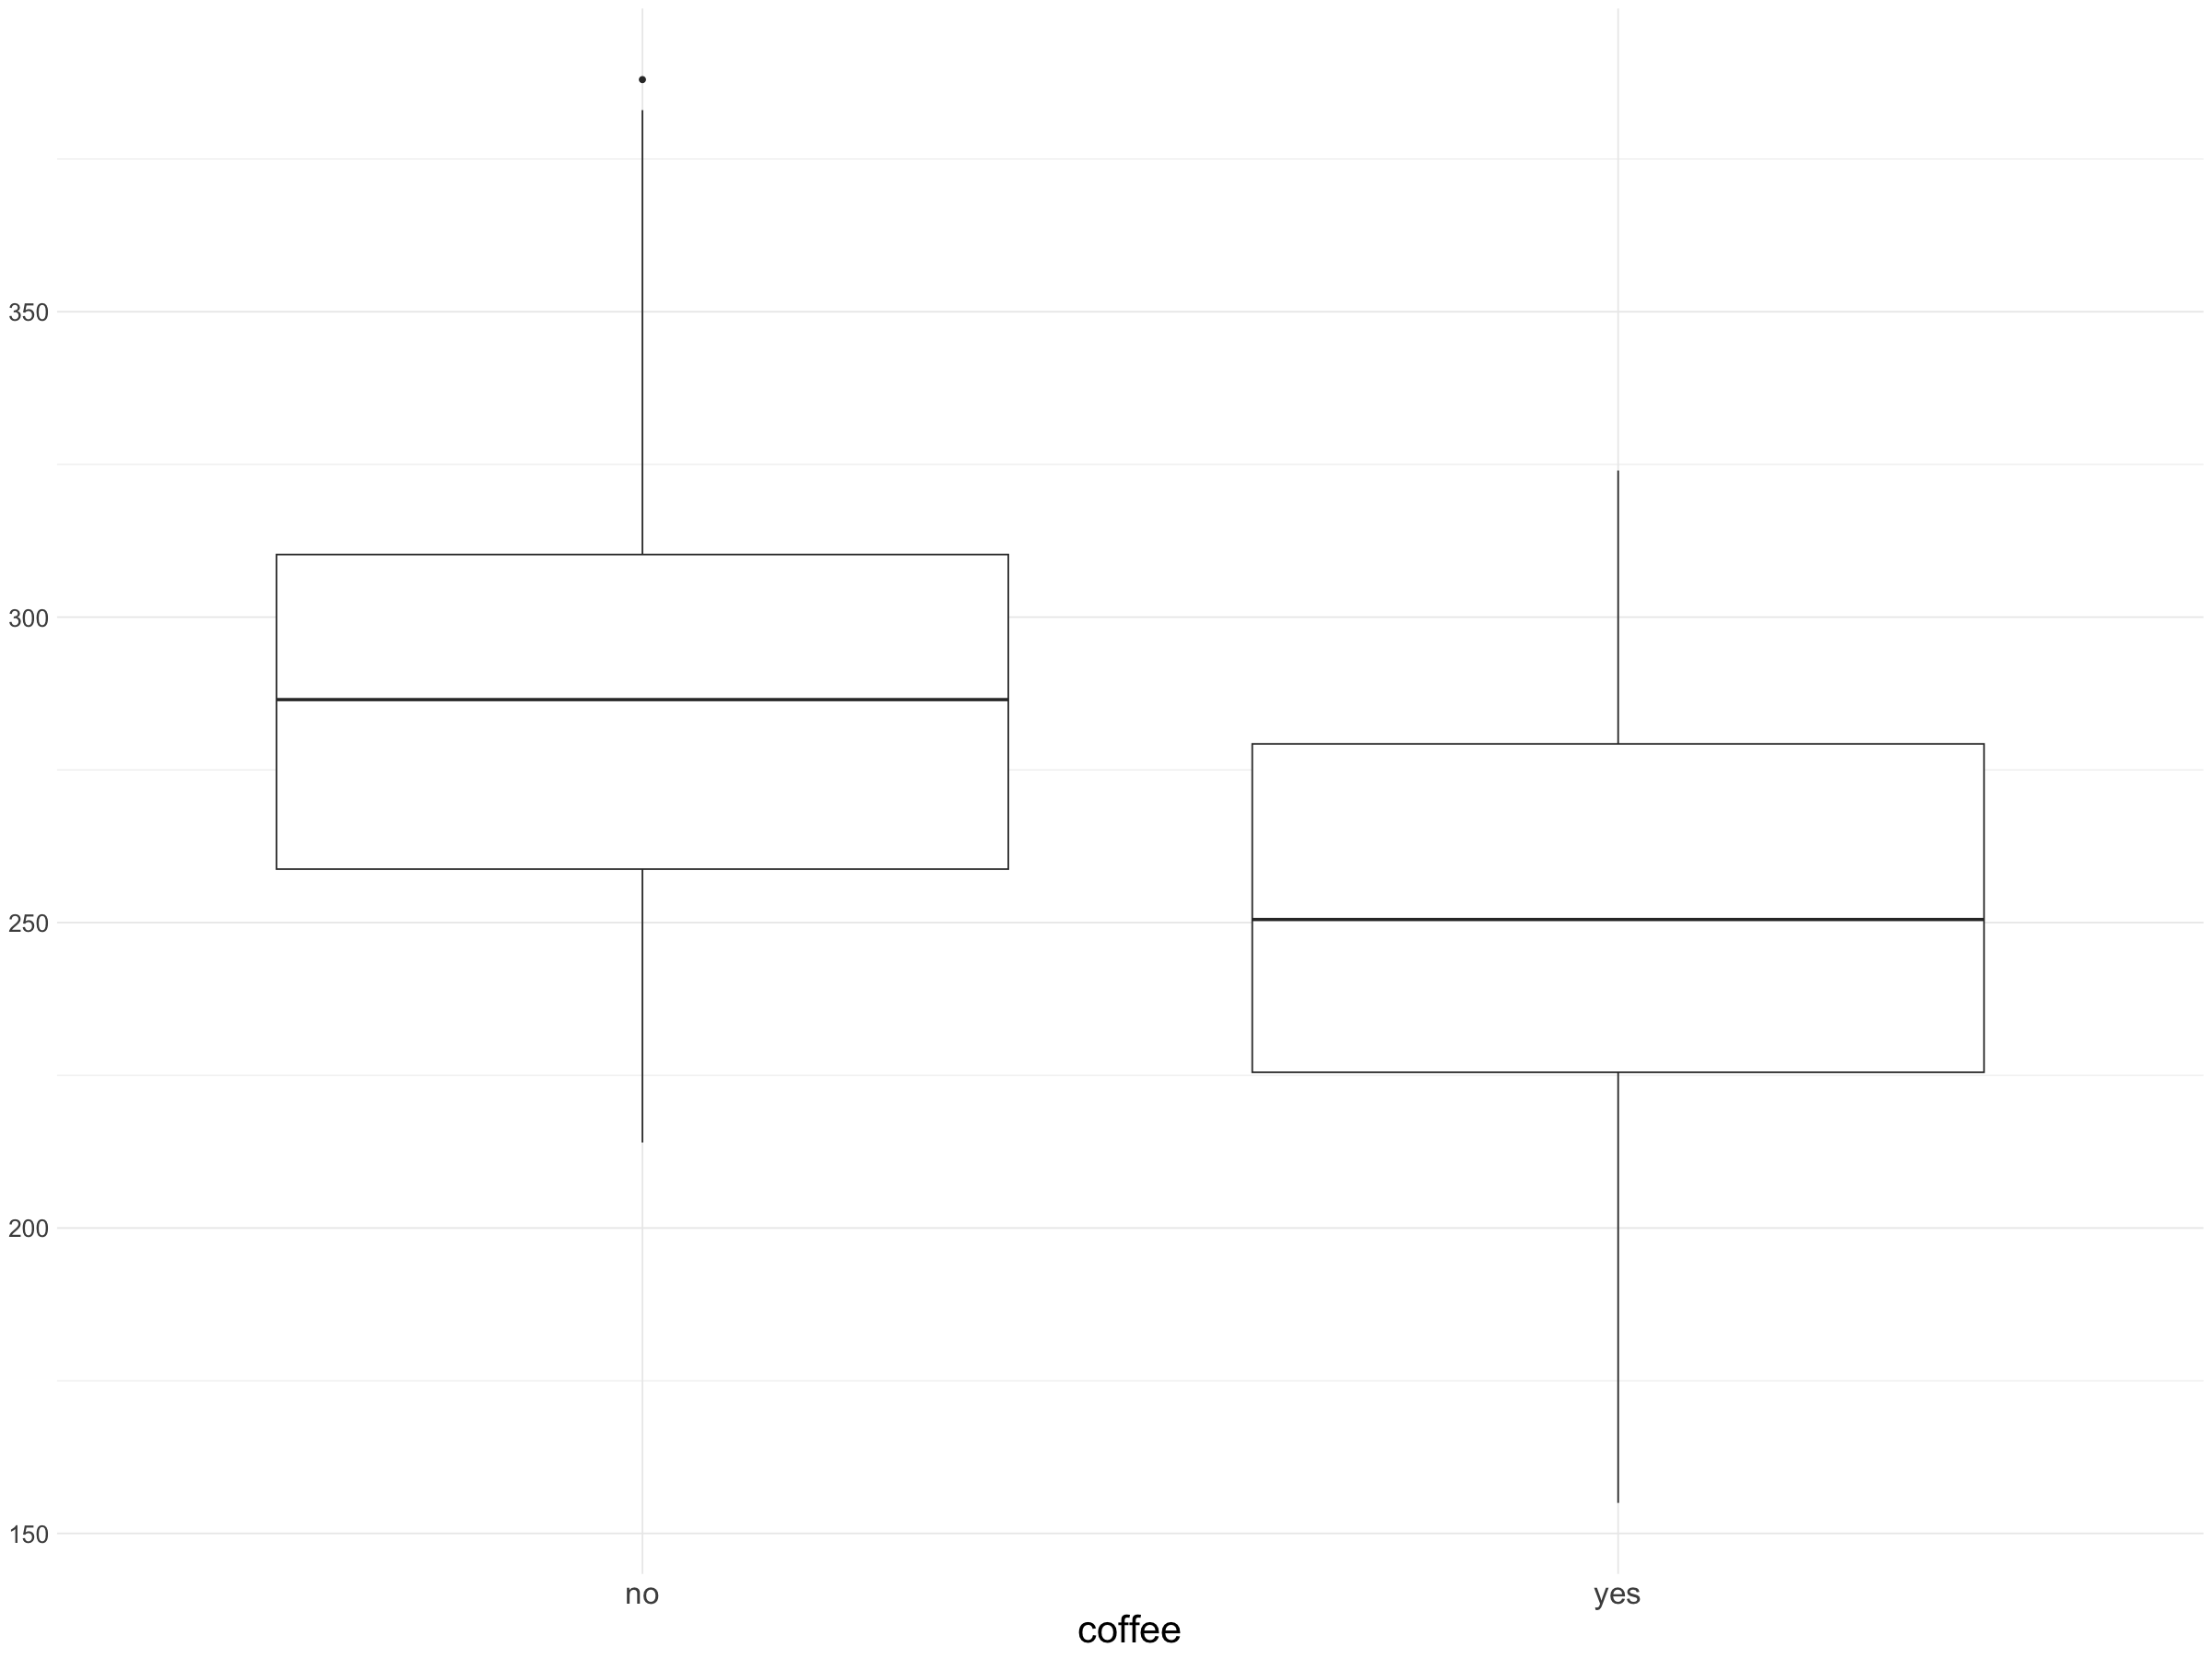

In [13]:
# coffee and reaction time graph

coffee_graph <- df %>% ggplot(aes(x = coffee, y = reaction_time, group = coffee)) +
    geom_boxplot() +
    theme(
        axis.title.y = element_blank()
    )

coffee_graph

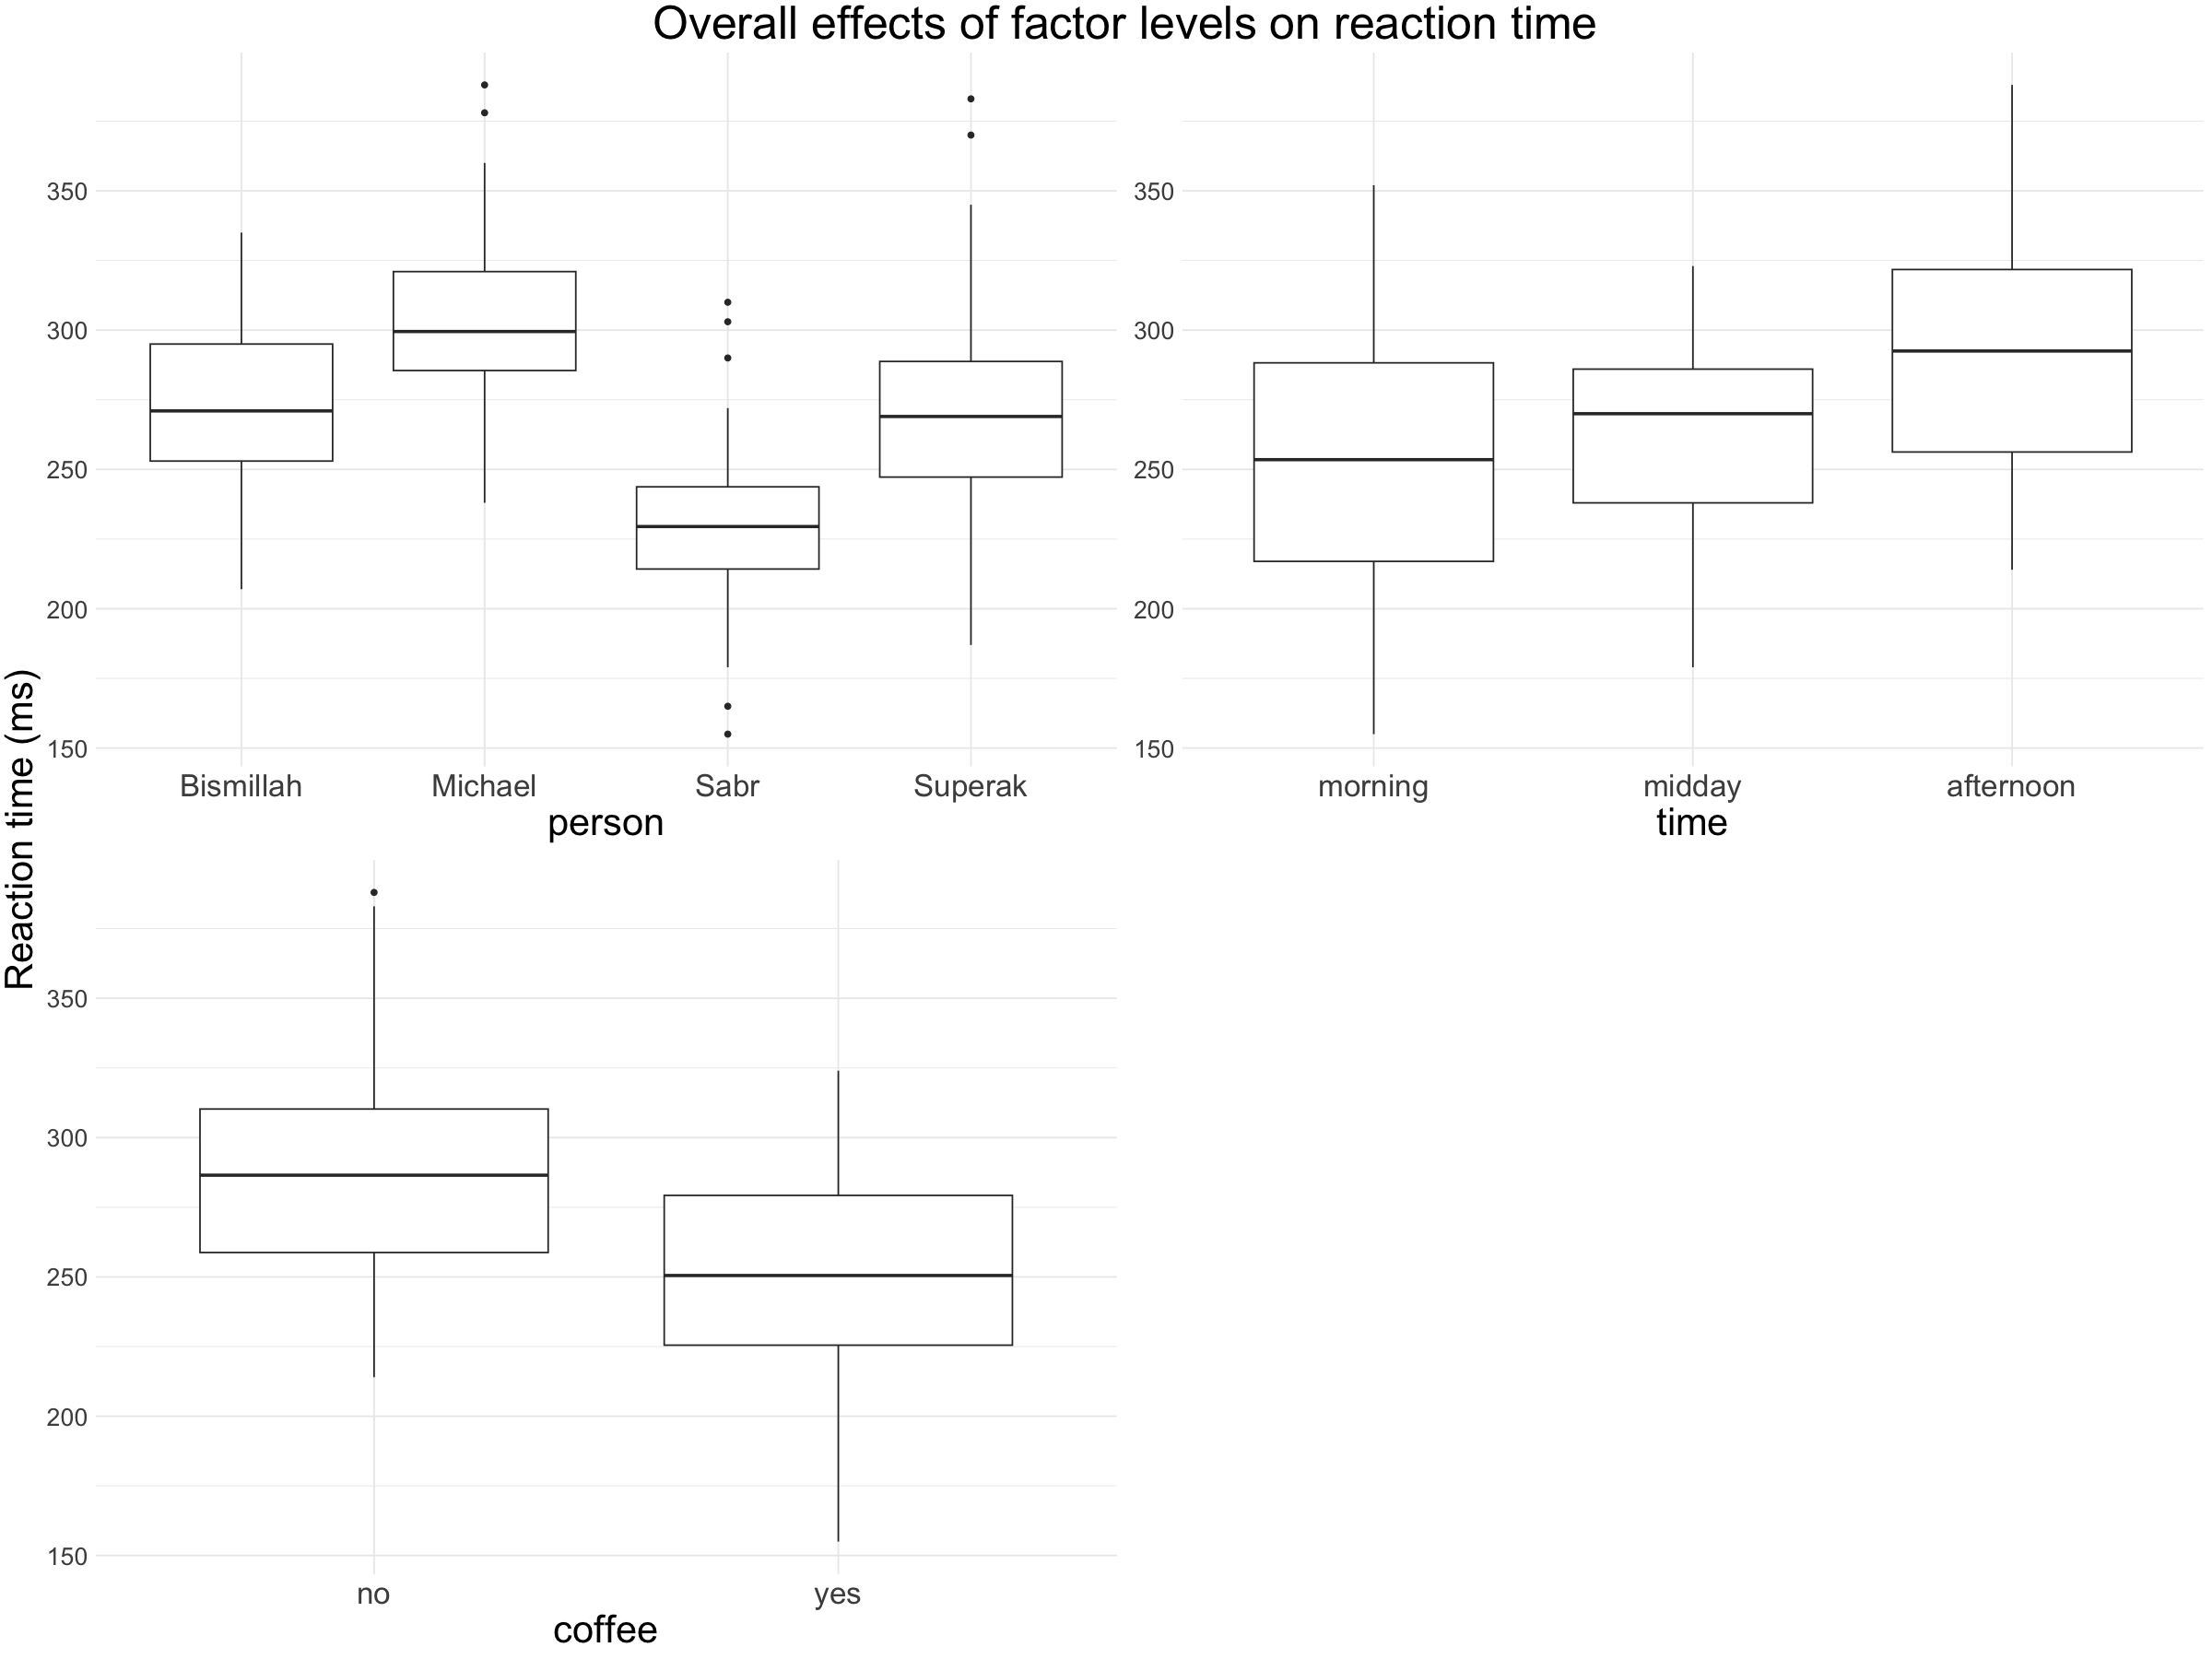

In [14]:
# put the above graphs into a larger compact graph

par(mfrow = c(3, 1))



grid.arrange(person_graph,
             time_graph,
             coffee_graph,
             ncol = 2,
             top = textGrob("Overall effects of factor levels on reaction time", gp = gpar(fontsize = 30)),
             left = textGrob("Reaction time (ms)", rot = 90, gp = gpar(fontsize = 25))
            )


`summarise()` has grouped output by 'coffee'. You can override using the
`.groups` argument.


coffee,time,mean_reaction_time
<chr>,<fct>,<dbl>
no,morning,277.30
no,midday,265.90
no,afternoon,320.85
yes,morning,222.30
yes,midday,260.55
yes,afternoon,264.10


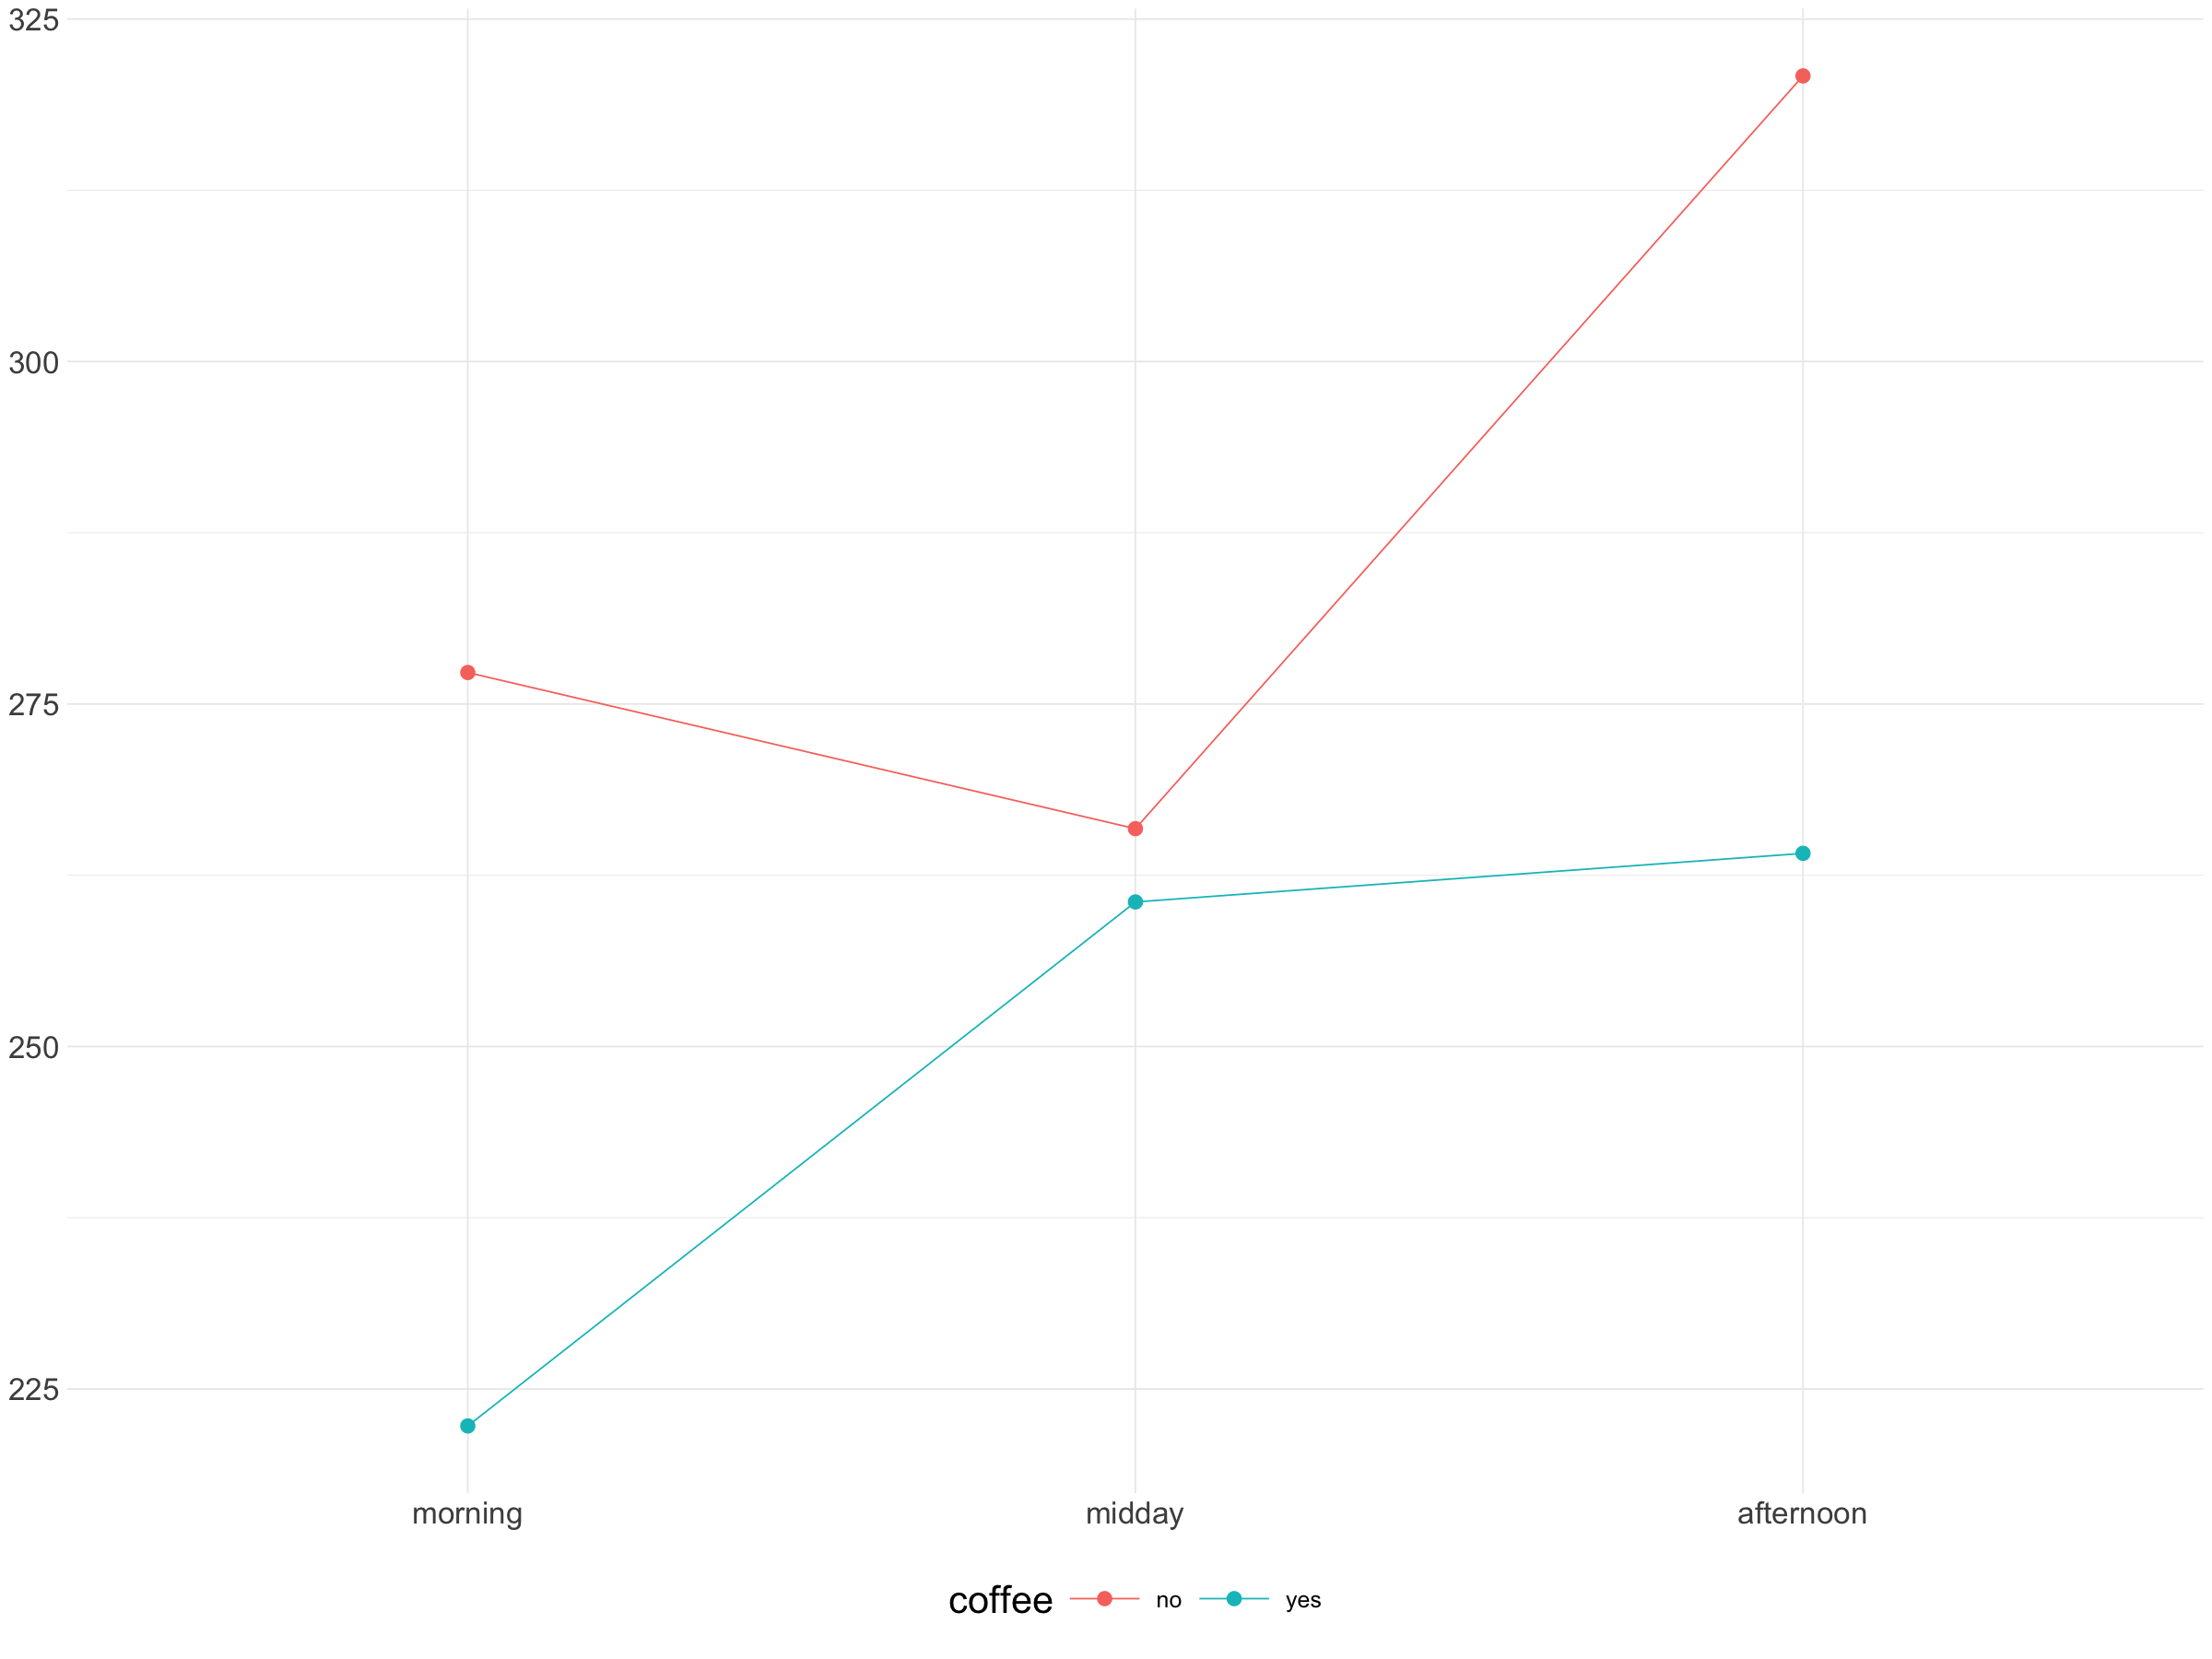

In [15]:
# find the mean of coffee and time 

summary_df <- df %>%
  group_by(coffee, time) %>%
  summarise(mean_reaction_time = mean(reaction_time))

summary_df

# generate coffee and time interaction plot

coffee_time_graph <- ggplot(summary_df, aes(x = time, y = mean_reaction_time, color = coffee, group = coffee)) +
    geom_point(size = 4) +
    geom_line() +
    labs (
        x = "Time",
        y = "Reaction Time(ms)"
    ) +
    theme(
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        axis.title = element_text(size = 25),
        plot.title = element_text(size = 25, hjust = 0.5),
        legend.key.size = unit(2, "cm"),
        legend.text = element_text(size = 15),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        legend.position = "bottom"
        
    )

coffee_time_graph

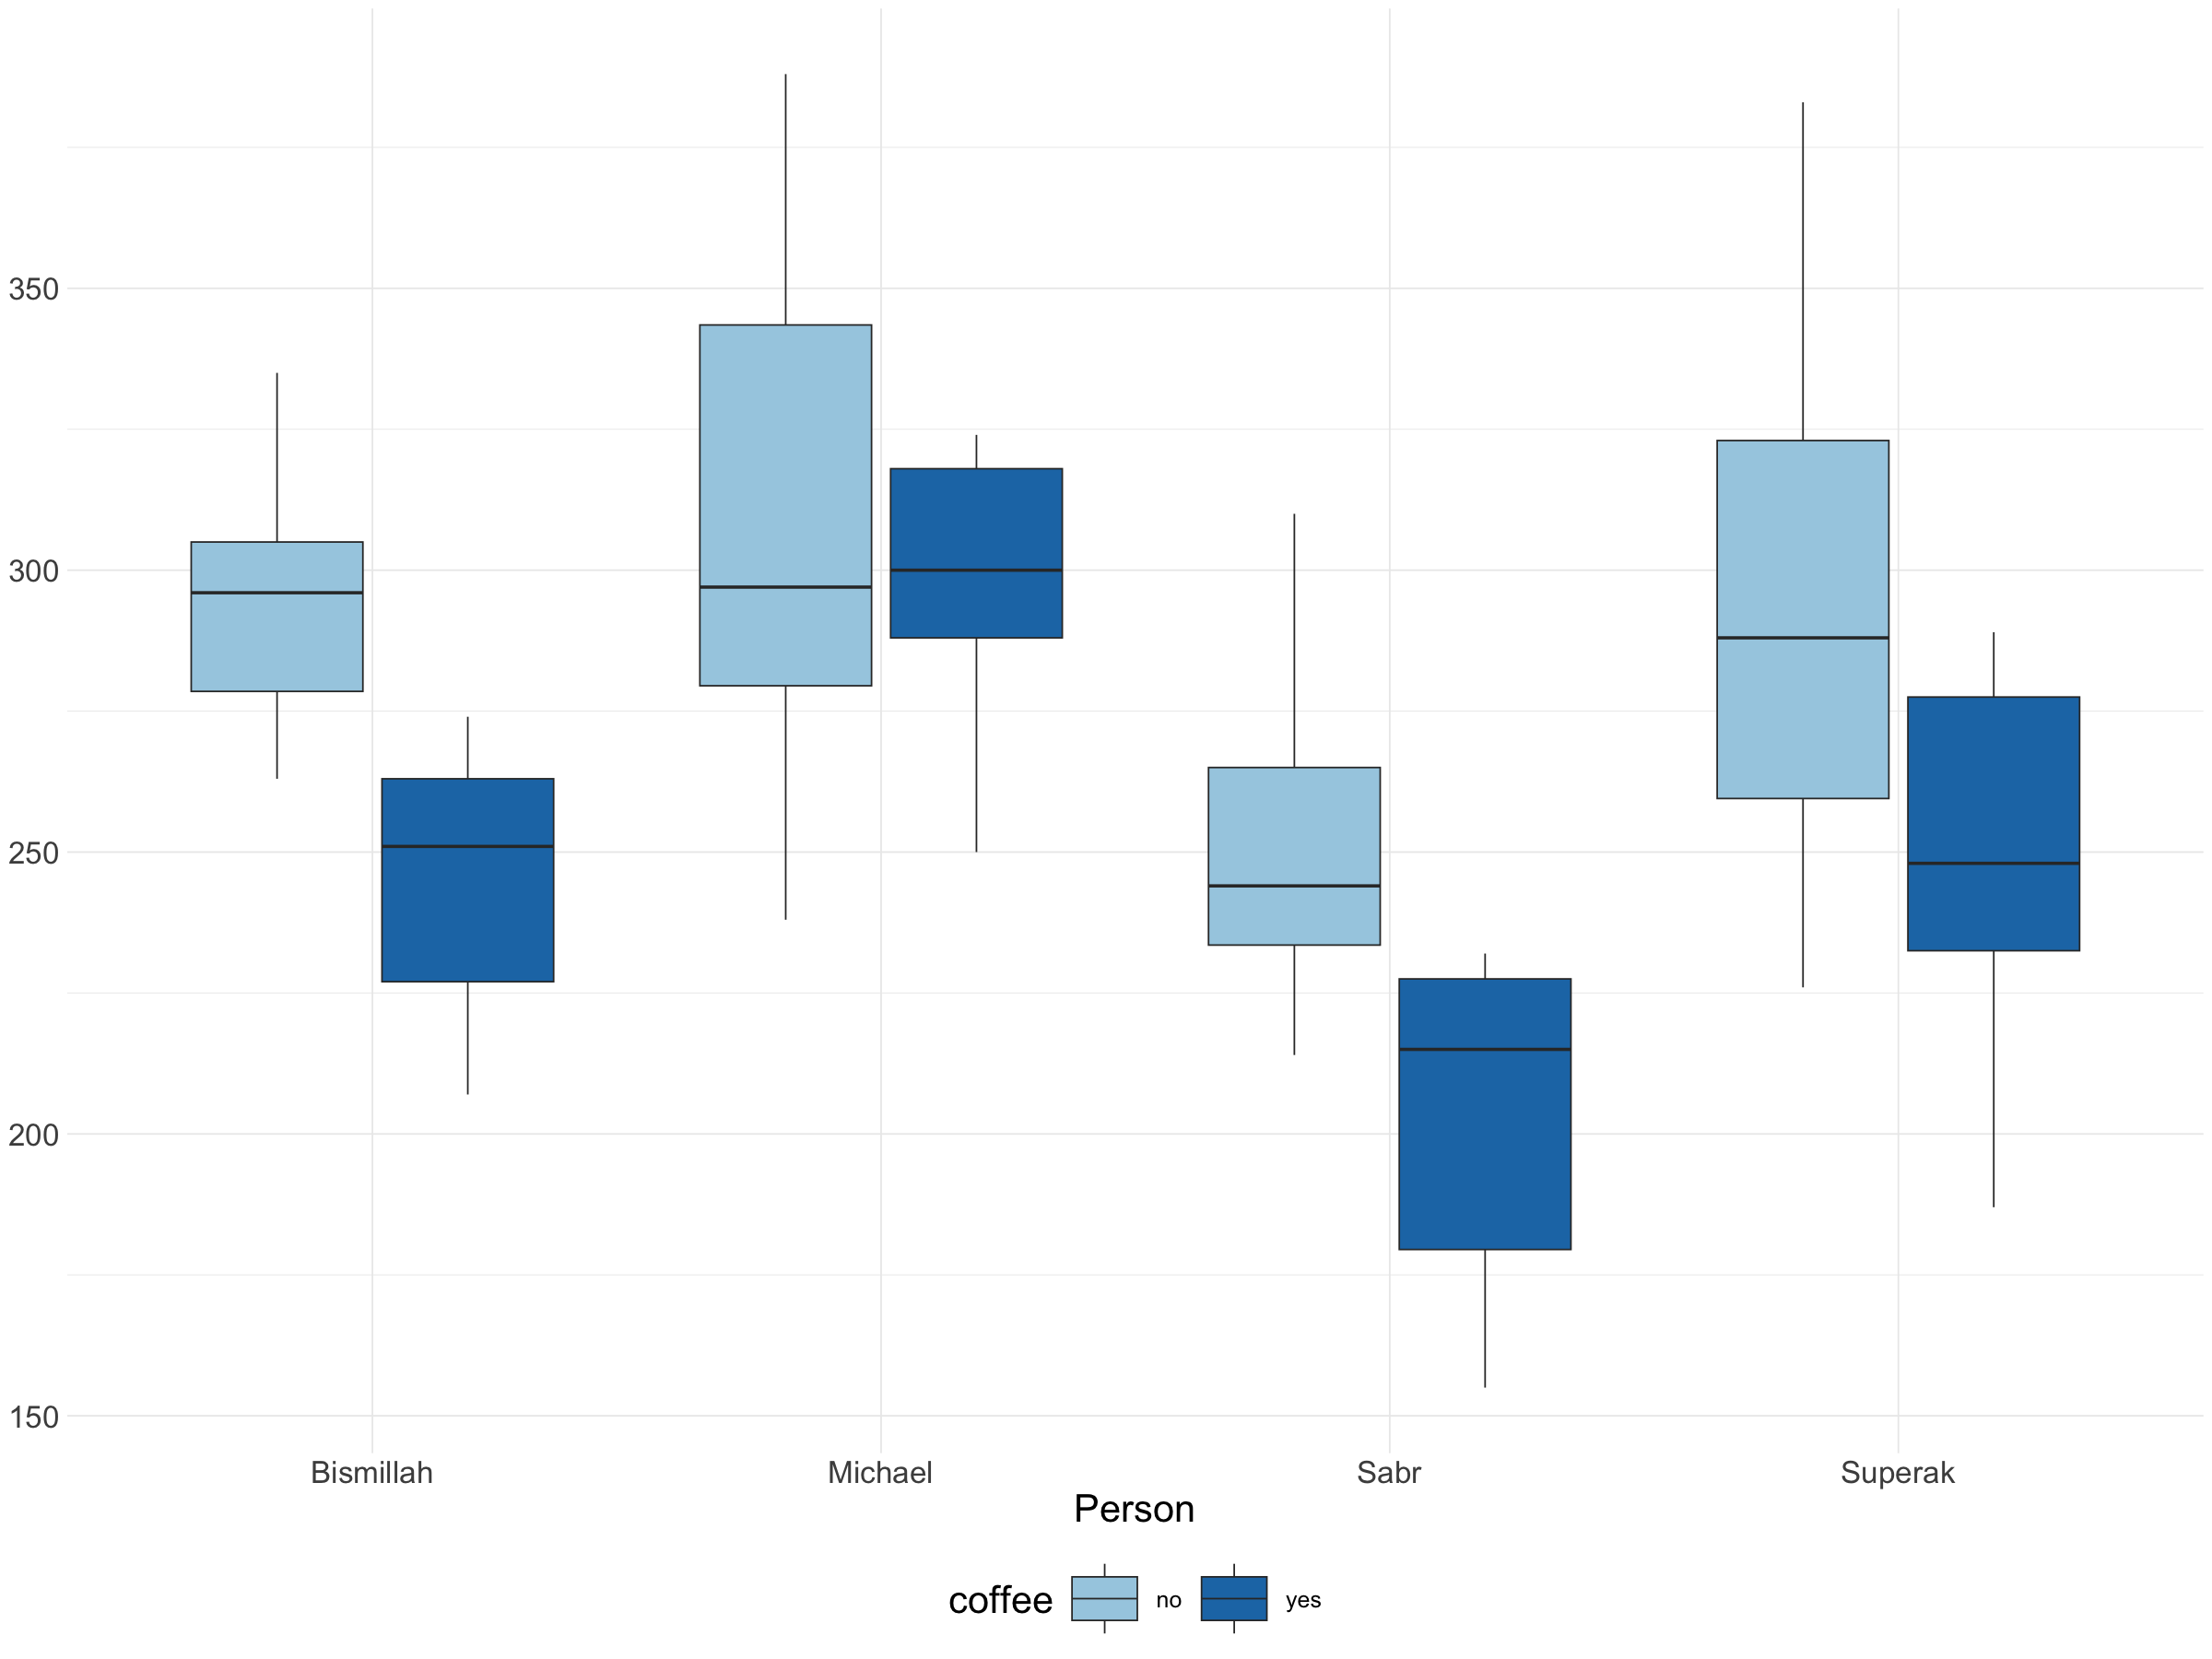

In [16]:

# generrate person and coffee interaction plots

person_coffee_graph <- df %>% group_by(coffee, person) %>%
        ggplot(aes(x = person, y = reaction_time, fill = coffee)) +
            geom_boxplot() +
            scale_fill_brewer(palette = "Paired") +
            labs(
                y = "Reaction Time (ms)",
                x = "Person"
            ) +
            theme(
                axis.text.x = element_text(size = 20),
                axis.text.y = element_text(size = 20),
                axis.title = element_text(size = 25),
                plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(2, "cm"),
                legend.text = element_text(size = 15),
                axis.title.y = element_blank(),
                legend.position = "bottom"
            )

person_coffee_graph

`summarise()` has grouped output by 'person'. You can override using the
`.groups` argument.


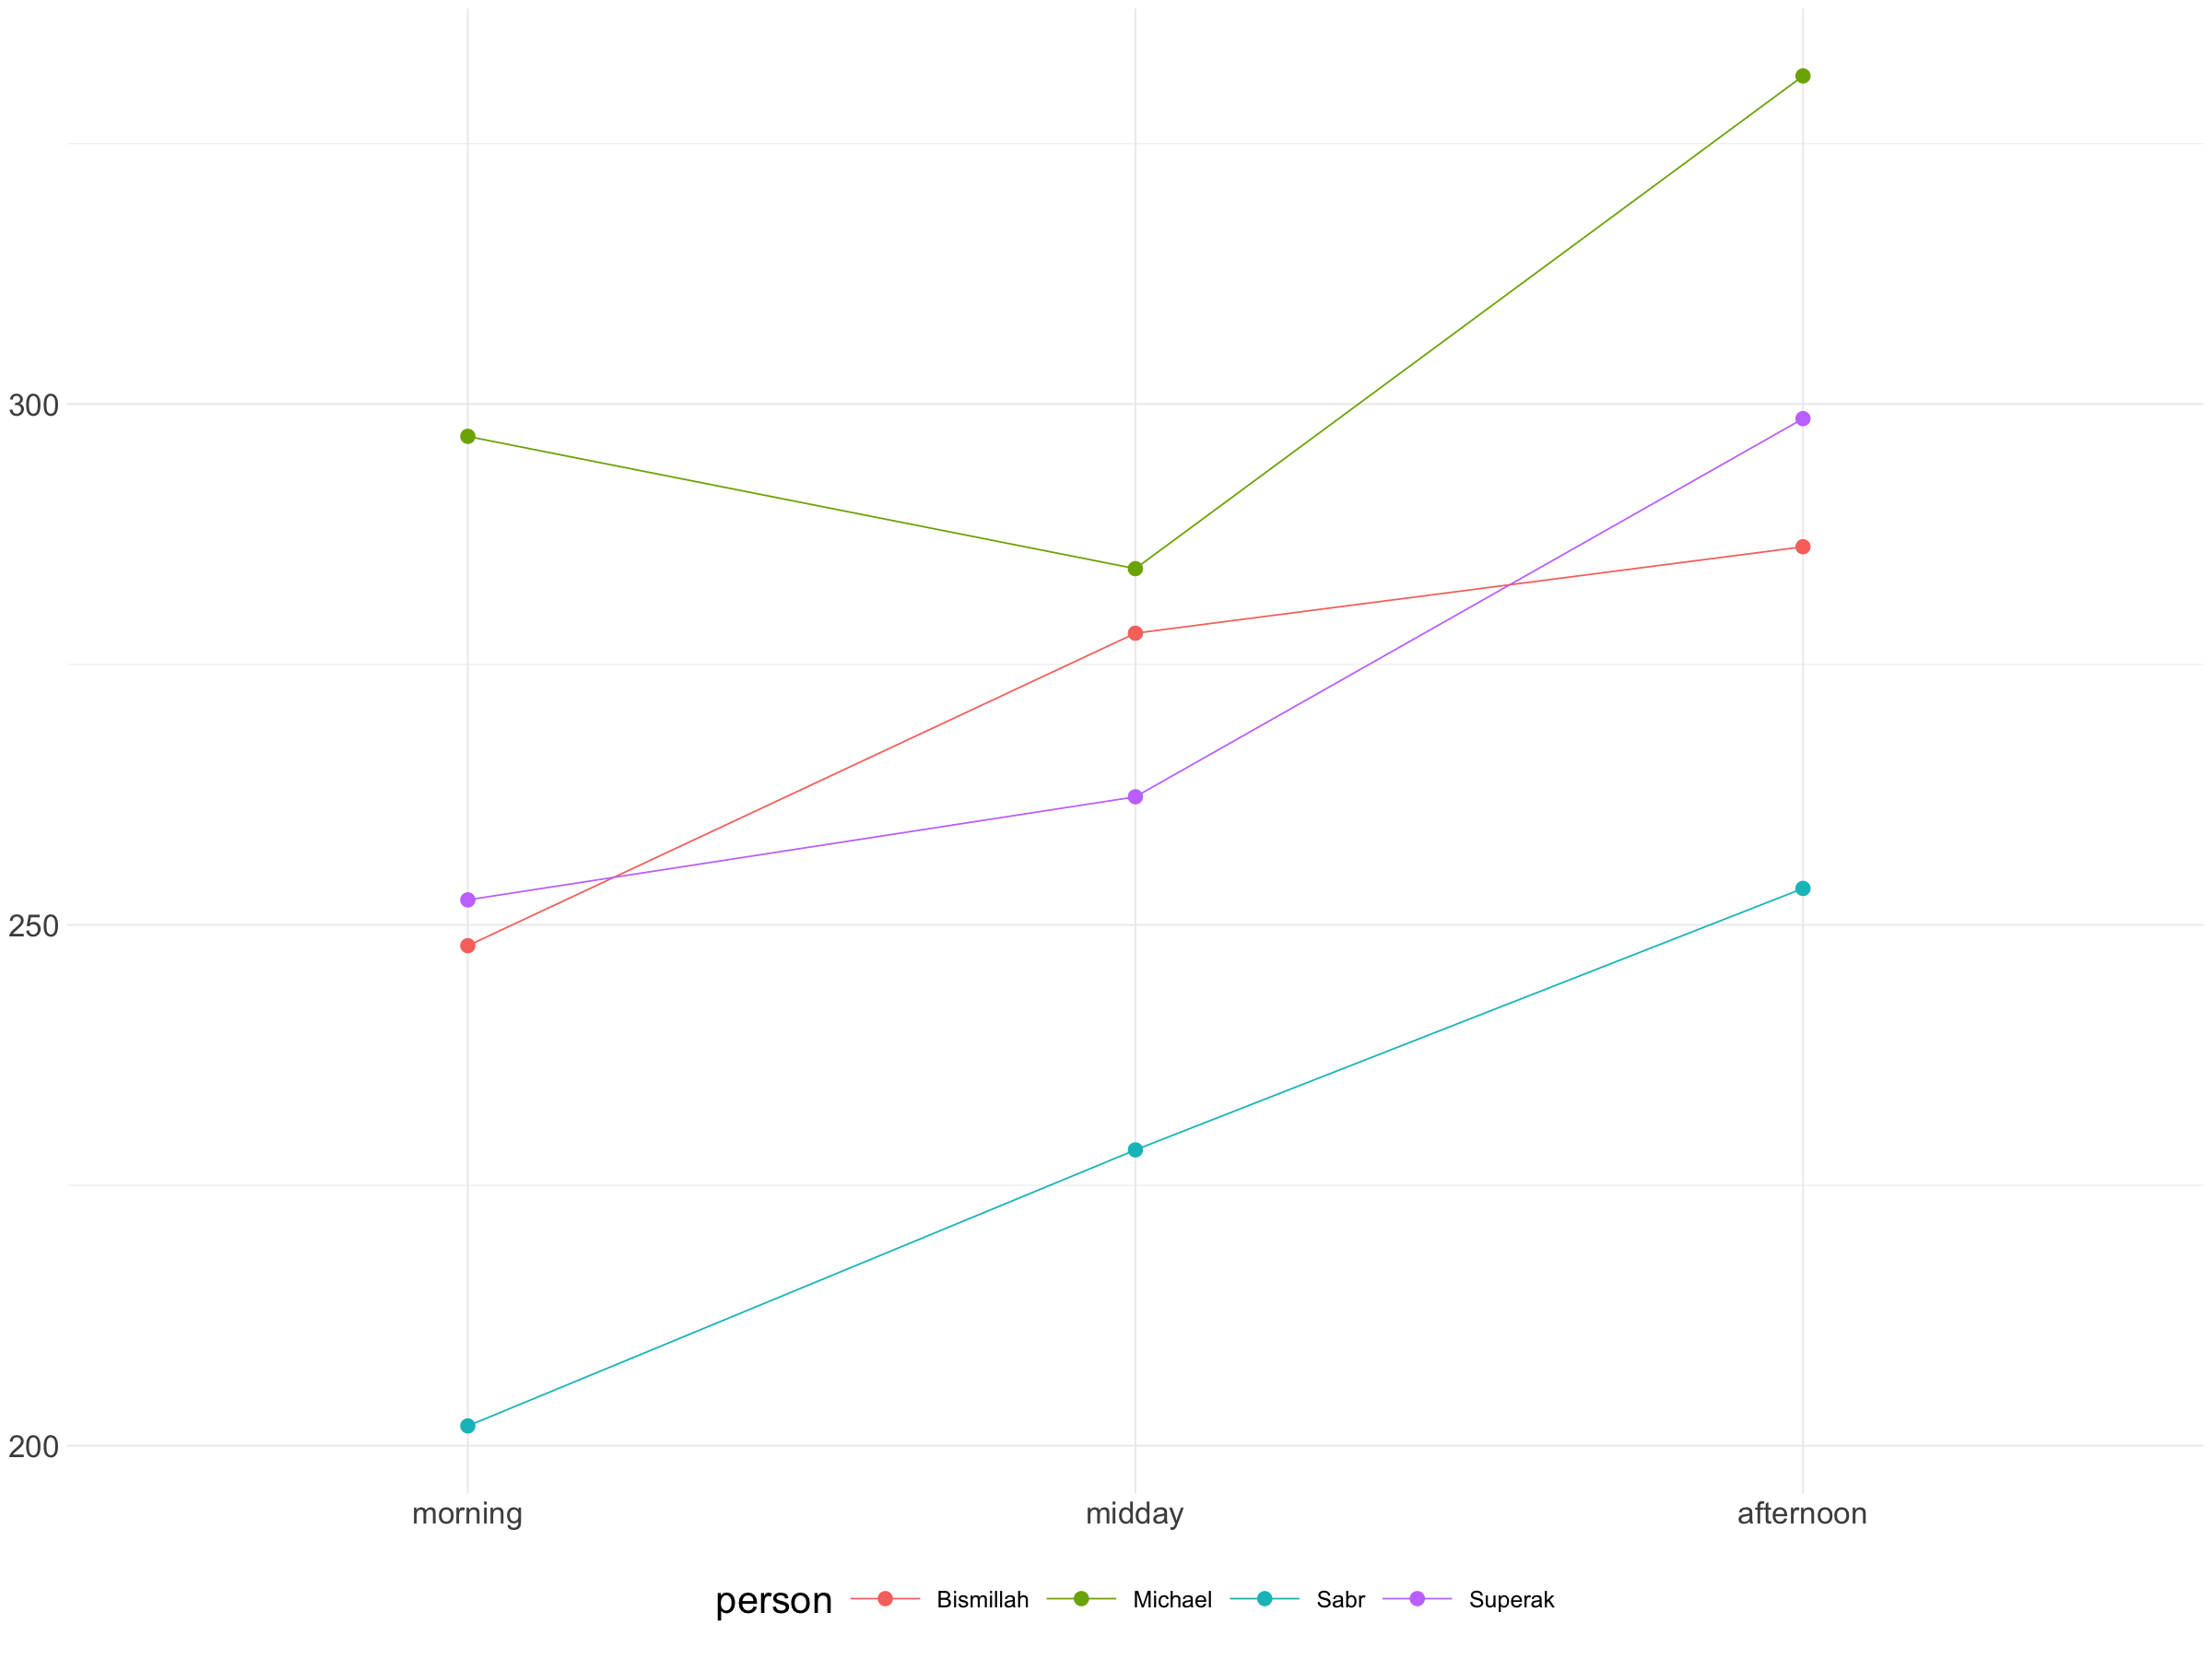

In [17]:
# generate time and person interaction plot

df %>% group_by(person, time) %>%
    summarise(mean_person_time = mean(reaction_time)) %>%
        ggplot(aes(x = time, y = mean_person_time, color = person, group = person)) +
            geom_point(size = 4) +
            geom_line() +
            labs(
                x = "Time",
                y = "Reaction Time (ms)"
            
            ) +
            theme(
                axis.text.x = element_text(size = 20),
                axis.text.y = element_text(size = 20),
                axis.title = element_text(size = 25),
                plot.title = element_text(size = 25, hjust = 0.5),
                legend.key.size = unit(2, "cm"),
                legend.text = element_text(size = 15),
                axis.title.x = element_blank(),
                axis.title.y = element_blank(),
                legend.position = "bottom"
            ) -> time_person_graph


time_person_graph

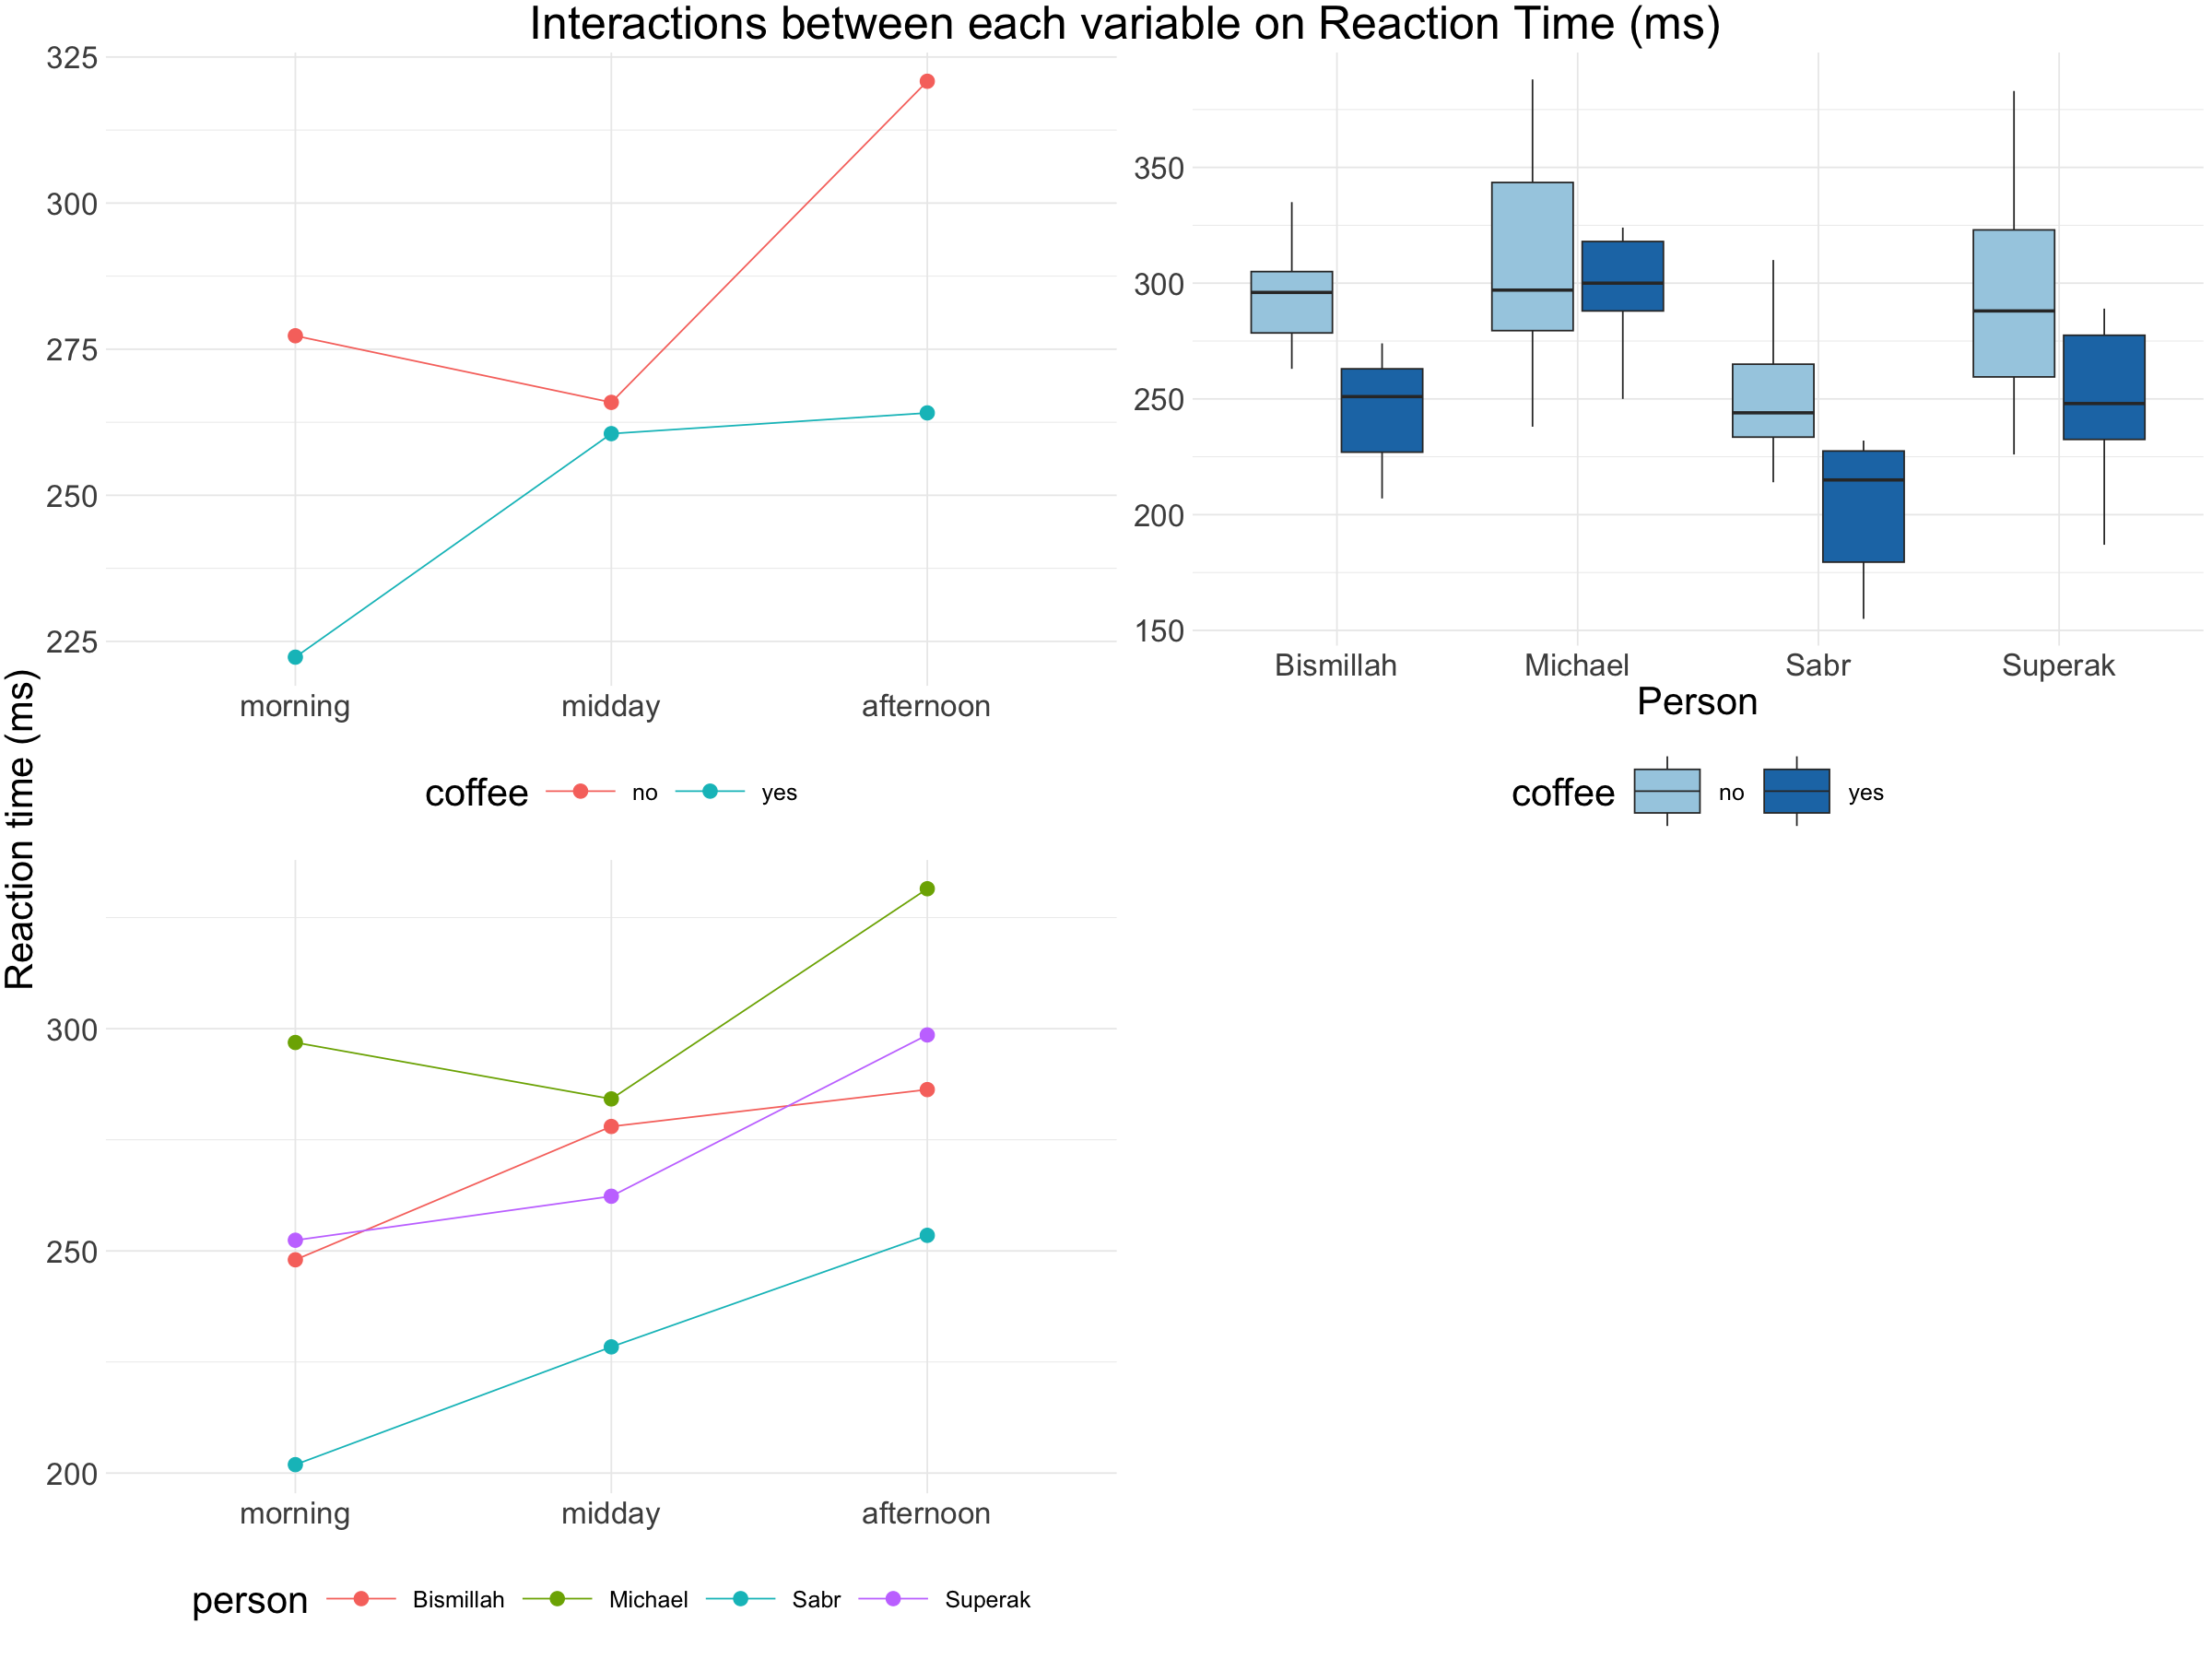

In [18]:
# put the interaction plots in a compact plot

grid.arrange(
    coffee_time_graph,
    person_coffee_graph,
    time_person_graph,
    ncol = 2,
    top = textGrob("Interactions between each variable on Reaction Time (ms)", gp = gpar(fontsize = 30)),
    left = textGrob("Reaction time (ms)", rot = 90, gp = gpar(fontsize = 25))

)

## 5.1 outliers, leverage and influential observations

# Model choice

- model choice
    - do exhaustive search
    - do step wise selection
        - backwards
        - forward
        - both
    - partial F-test: check if the full model is better than the reduced model using ANOVA


In [19]:
df %>% head()

time,coffee,reaction_time,person
<fct>,<chr>,<dbl>,<chr>
morning,yes,289,Michael
morning,yes,287,Michael
morning,yes,267,Michael
midday,yes,323,Michael
afternoon,yes,321,Michael
midday,yes,250,Michael


In [20]:
# fit the full model

full_model <- lm(reaction_time ~ coffee * person * time, data = training)

In [21]:
# do forward stepwise regression

best_forward <- step(
    
    lm(reaction_time ~ 1, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "forward",

)

Start:  AIC=742.72
reaction_time ~ 1

         Df Sum of Sq    RSS    AIC
+ person  3     69925 145455 711.03
+ coffee  1     39976 175405 725.01
+ time    2     32314 183067 731.11
<none>                215380 742.72

Step:  AIC=711.03
reaction_time ~ person

         Df Sum of Sq    RSS    AIC
+ coffee  1     40129 105327 682.05
+ time    2     36300 109156 687.47
<none>                145455 711.03

Step:  AIC=682.05
reaction_time ~ person + coffee

                Df Sum of Sq    RSS    AIC
+ time           2     34075  71252 648.52
<none>                       105327 682.05
+ coffee:person  3      5315 100011 683.07

Step:  AIC=648.52
reaction_time ~ person + coffee + time

                Df Sum of Sq   RSS    AIC
+ coffee:time    2   13393.7 57858 632.53
+ coffee:person  3    6487.2 64765 645.36
+ person:time    6    8950.8 62301 647.64
<none>                       71252 648.52

Step:  AIC=632.53
reaction_time ~ person + coffee + time + coffee:time

                Df Sum of Sq 

In [22]:
best_backward <- step(
    lm(reaction_time ~ coffee * person * time, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "backward",
)

Start:  AIC=636.7
reaction_time ~ coffee * person * time

                     Df Sum of Sq   RSS    AIC
- coffee:person:time  6    1855.6 46063 628.65
<none>                            44207 636.70

Step:  AIC=628.65
reaction_time ~ coffee + person + time + coffee:person + coffee:time + 
    person:time

                Df Sum of Sq   RSS    AIC
<none>                       46063 628.65
- person:time    6    6894.0 52957 630.04
- coffee:person  3    4172.1 50235 630.97
- coffee:time    2   10618.1 56681 644.56


In [23]:
best_both <- step(
    lm(reaction_time ~ 1, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "both",
)

Start:  AIC=742.72
reaction_time ~ 1

         Df Sum of Sq    RSS    AIC
+ person  3     69925 145455 711.03
+ coffee  1     39976 175405 725.01
+ time    2     32314 183067 731.11
<none>                215380 742.72

Step:  AIC=711.03
reaction_time ~ person

         Df Sum of Sq    RSS    AIC
+ coffee  1     40129 105327 682.05
+ time    2     36300 109156 687.47
<none>                145455 711.03
- person  3     69925 215380 742.72

Step:  AIC=682.05
reaction_time ~ person + coffee

                Df Sum of Sq    RSS    AIC
+ time           2     34075  71252 648.52
<none>                       105327 682.05
+ coffee:person  3      5315 100011 683.07
- coffee         1     40129 145455 711.03
- person         3     70078 175405 725.01

Step:  AIC=648.52
reaction_time ~ person + coffee + time

                Df Sum of Sq    RSS    AIC
+ coffee:time    2     13394  57858 632.53
+ coffee:person  3      6487  64765 645.36
+ person:time    6      8951  62301 647.64
<none>            

In [24]:
# do forward stepwise regression using BIC criterion

best_forward_bic <- step(
    
    lm(reaction_time ~ 1, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "forward",
    k = log(nobs(full_model))


)

Start:  AIC=745.28
reaction_time ~ 1

         Df Sum of Sq    RSS    AIC
+ person  3     69925 145455 721.29
+ coffee  1     39976 175405 730.14
+ time    2     32314 183067 738.81
<none>                215380 745.28

Step:  AIC=721.29
reaction_time ~ person

         Df Sum of Sq    RSS    AIC
+ coffee  1     40129 105327 694.87
+ time    2     36300 109156 702.86
<none>                145455 721.29

Step:  AIC=694.87
reaction_time ~ person + coffee

                Df Sum of Sq    RSS    AIC
+ time           2     34075  71252 666.47
<none>                       105327 694.87
+ coffee:person  3      5315 100011 703.59

Step:  AIC=666.47
reaction_time ~ person + coffee + time

                Df Sum of Sq   RSS    AIC
+ coffee:time    2   13393.7 57858 655.61
<none>                       71252 666.47
+ coffee:person  3    6487.2 64765 671.00
+ person:time    6    8950.8 62301 680.97

Step:  AIC=655.61
reaction_time ~ person + coffee + time + coffee:time

                Df Sum of Sq 

In [25]:
best_backward_bic <- step(
    lm(reaction_time ~ coffee * person * time, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "backward",
    k = log(nobs(full_model))

)

Start:  AIC=698.24
reaction_time ~ coffee * person * time

                     Df Sum of Sq   RSS    AIC
- coffee:person:time  6    1855.6 46063 674.81
<none>                            44207 698.24

Step:  AIC=674.81
reaction_time ~ coffee + person + time + coffee:person + coffee:time + 
    person:time

                Df Sum of Sq   RSS    AIC
- person:time    6    6894.0 52957 660.81
- coffee:person  3    4172.1 50235 669.44
<none>                       46063 674.81
- coffee:time    2   10618.1 56681 685.59

Step:  AIC=660.81
reaction_time ~ coffee + person + time + coffee:person + coffee:time

                Df Sum of Sq   RSS    AIC
- coffee:person  3    4901.4 57858 655.61
<none>                       52957 660.81
- coffee:time    2   11807.9 64765 671.00

Step:  AIC=655.61
reaction_time ~ coffee + person + time + coffee:time

              Df Sum of Sq    RSS    AIC
<none>                      57858 655.61
- coffee:time  2     13394  71252 666.47
- person       3     75782 13

In [26]:
best_both_bic <- step(
    
    lm(reaction_time ~ 1, data = training), 
    scope = list(lower = ~ 1, upper = ~ coffee * person * time), 
    direction = "both",
    k = log(nobs(full_model))


)

Start:  AIC=745.28
reaction_time ~ 1

         Df Sum of Sq    RSS    AIC
+ person  3     69925 145455 721.29
+ coffee  1     39976 175405 730.14
+ time    2     32314 183067 738.81
<none>                215380 745.28

Step:  AIC=721.29
reaction_time ~ person

         Df Sum of Sq    RSS    AIC
+ coffee  1     40129 105327 694.87
+ time    2     36300 109156 702.86
<none>                145455 721.29
- person  3     69925 215380 745.28

Step:  AIC=694.87
reaction_time ~ person + coffee

                Df Sum of Sq    RSS    AIC
+ time           2     34075  71252 666.47
<none>                       105327 694.87
+ coffee:person  3      5315 100011 703.59
- coffee         1     40129 145455 721.29
- person         3     70078 175405 730.14

Step:  AIC=666.47
reaction_time ~ person + coffee + time

                Df Sum of Sq    RSS    AIC
+ coffee:time    2     13394  57858 655.61
<none>                        71252 666.47
+ coffee:person  3      6487  64765 671.00
+ person:time    6

## Assessing Initial model

In [27]:
model <- best_both_bic

In [28]:
model %>% summary()


Call:
lm(formula = reaction_time ~ person + coffee + time + coffee:time, 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.109 -15.598   1.696  16.055  62.692 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             279.7179     7.9189  35.323  < 2e-16 ***
personMichael            35.9808     7.4942   4.801 6.51e-06 ***
personSabr              -43.7452     7.4638  -5.861 8.06e-08 ***
personSuperak            -0.8897     7.4649  -0.119 0.905400    
coffeeyes               -55.8079     8.8888  -6.278 1.30e-08 ***
timemidday              -18.8586     9.3112  -2.025 0.045895 *  
timeafternoon            41.4798     8.9986   4.610 1.37e-05 ***
coffeeyes:timemidday     51.9472    13.0878   3.969 0.000148 ***
coffeeyes:timeafternoon   0.8350    12.6686   0.066 0.947601    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.79 on 87 degrees of freedom
Multiple R-squared:  

# unusal observation

In [29]:
cooks.distance(model) > 1

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   92    93    94    95    96 
FALSE FALSE FALSE FALSE FALSE

In [30]:
cooks.distance(model) > 1 %>% as_tibble()

value
FALSE


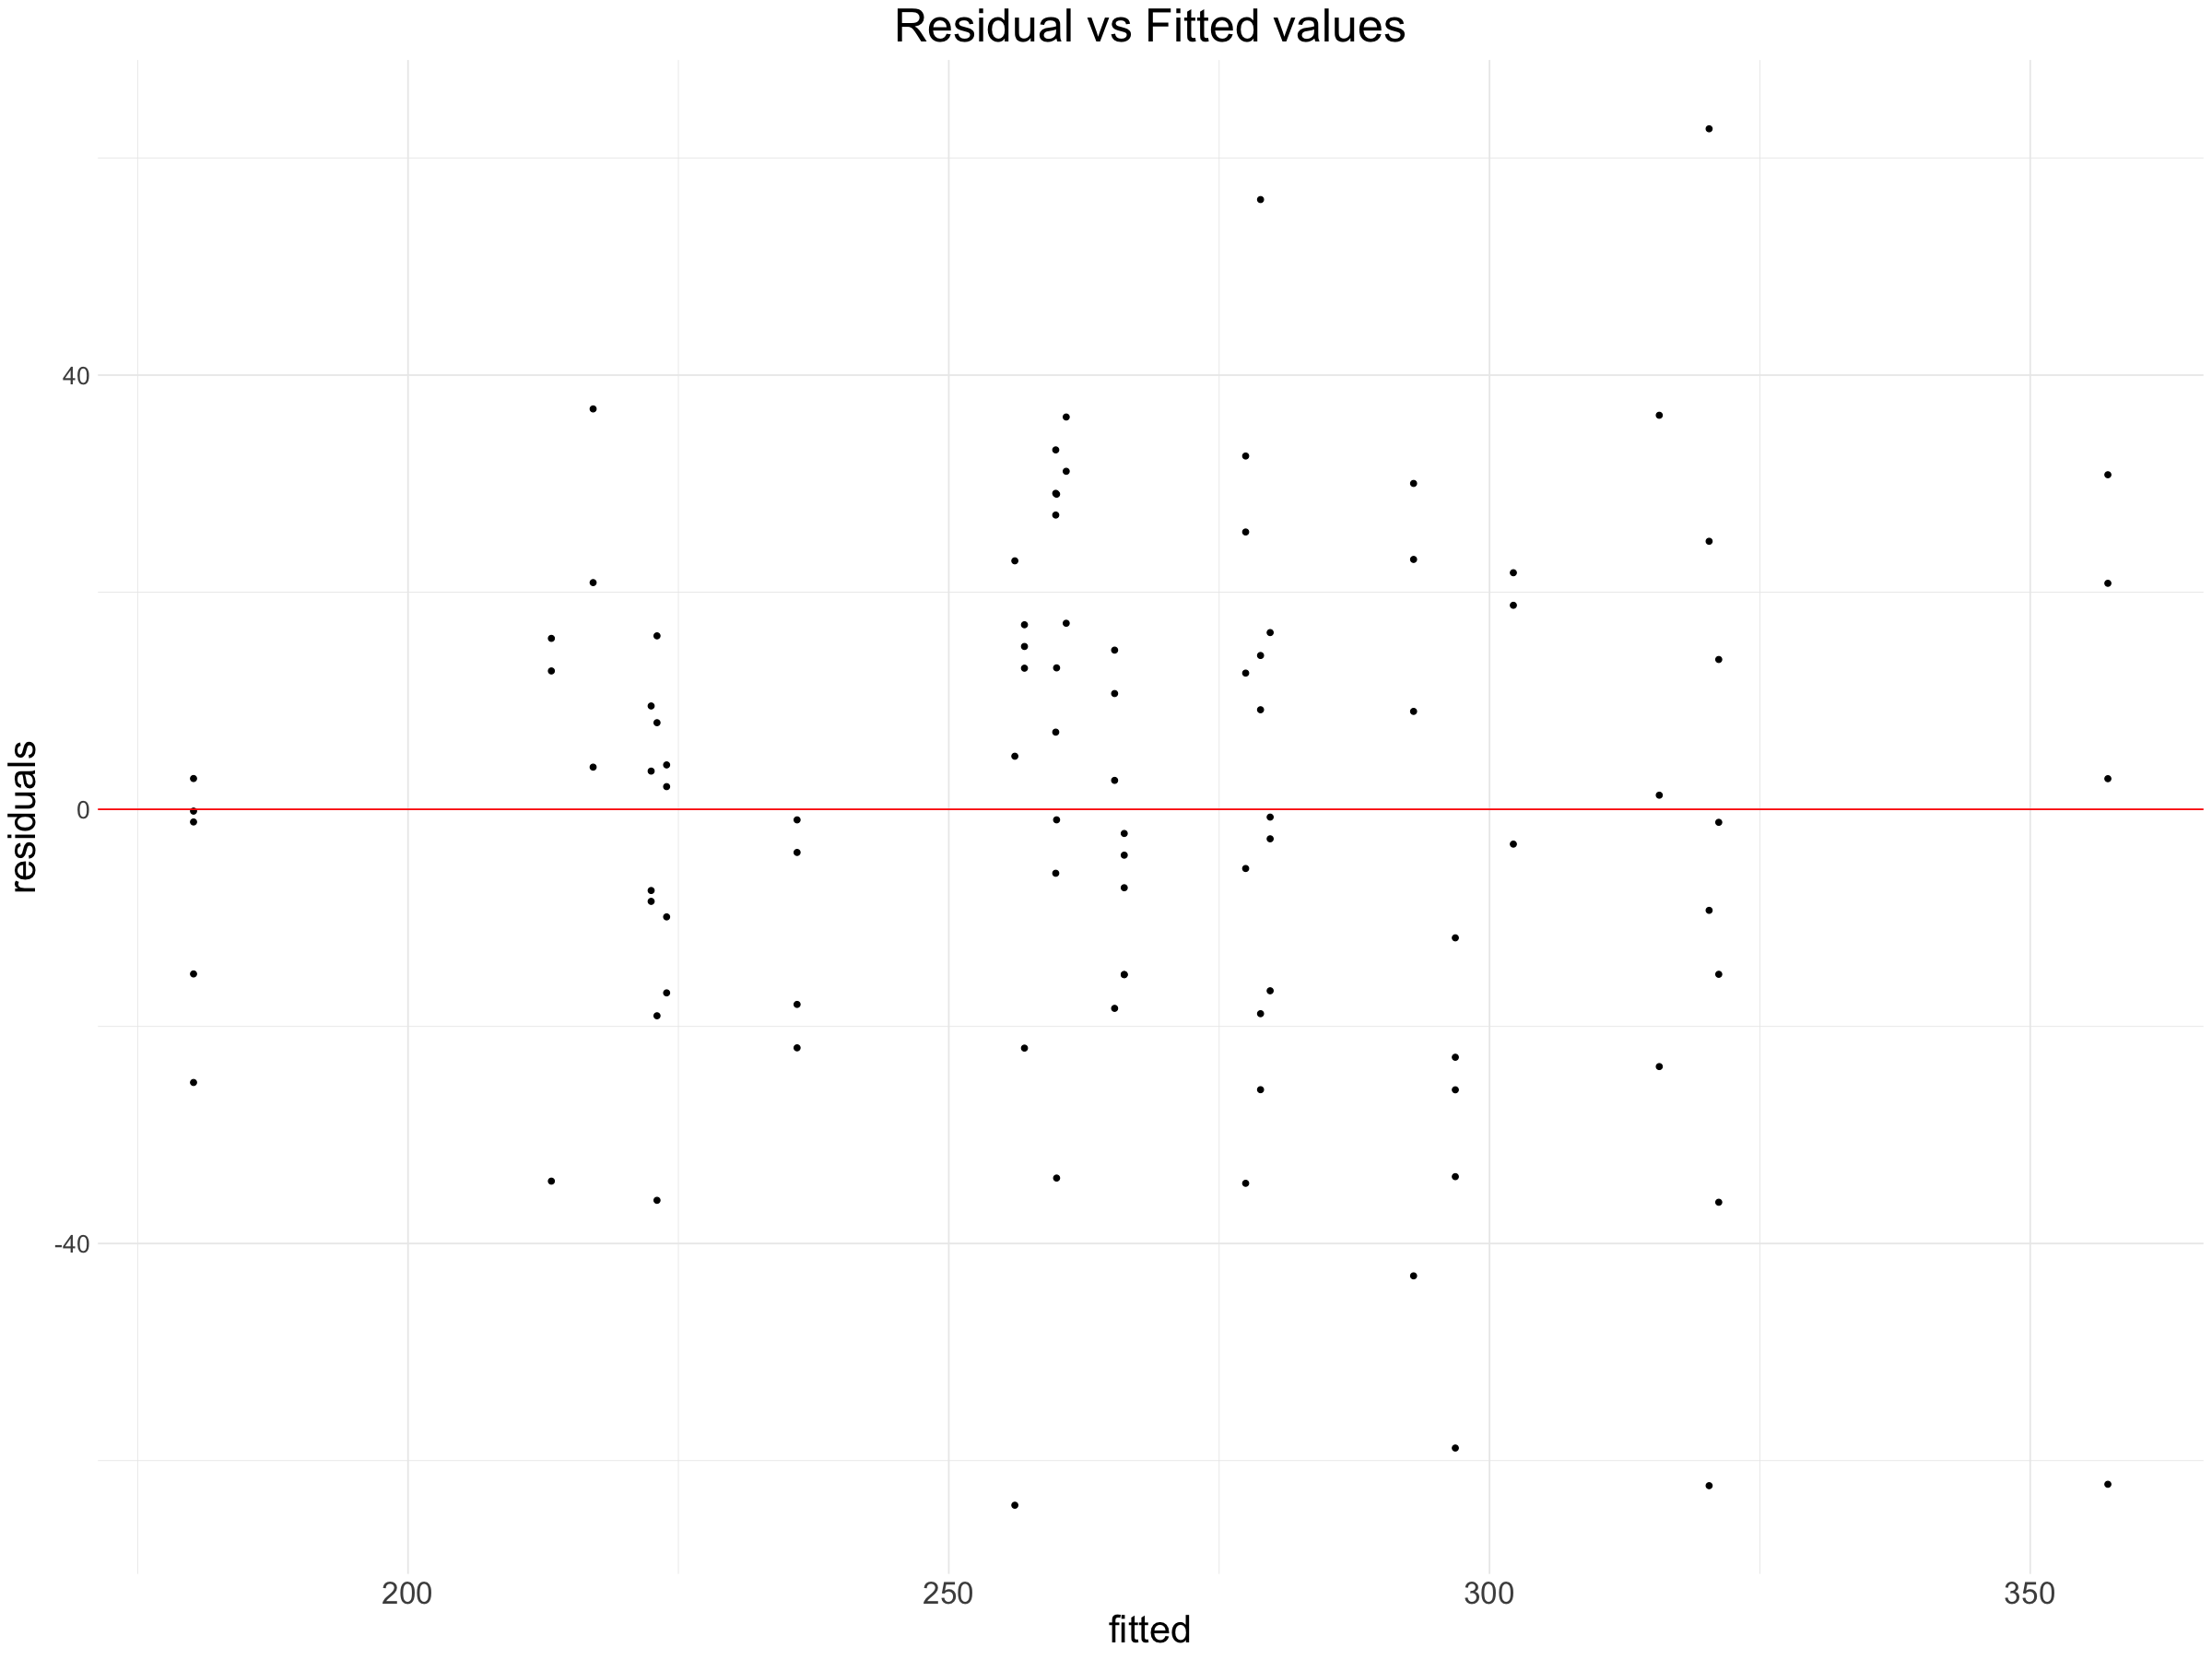

In [31]:
data <- data.frame(residuals = model$resid, fitted = model$fitted.values)

residual_fitted_graph <- data %>% ggplot(aes(x = fitted, y = residuals)) +
    geom_point() +
    labs(
        title = "Residual vs Fitted values"
    ) +
    geom_hline(yintercept = 0, color = "red")


residual_fitted_graph

In [32]:
y_pred <- model %>% predict(testing)
test_error <- y_pred - testing$reaction_time

test_data <- data.frame(residuals = test_error, predictions = y_pred)

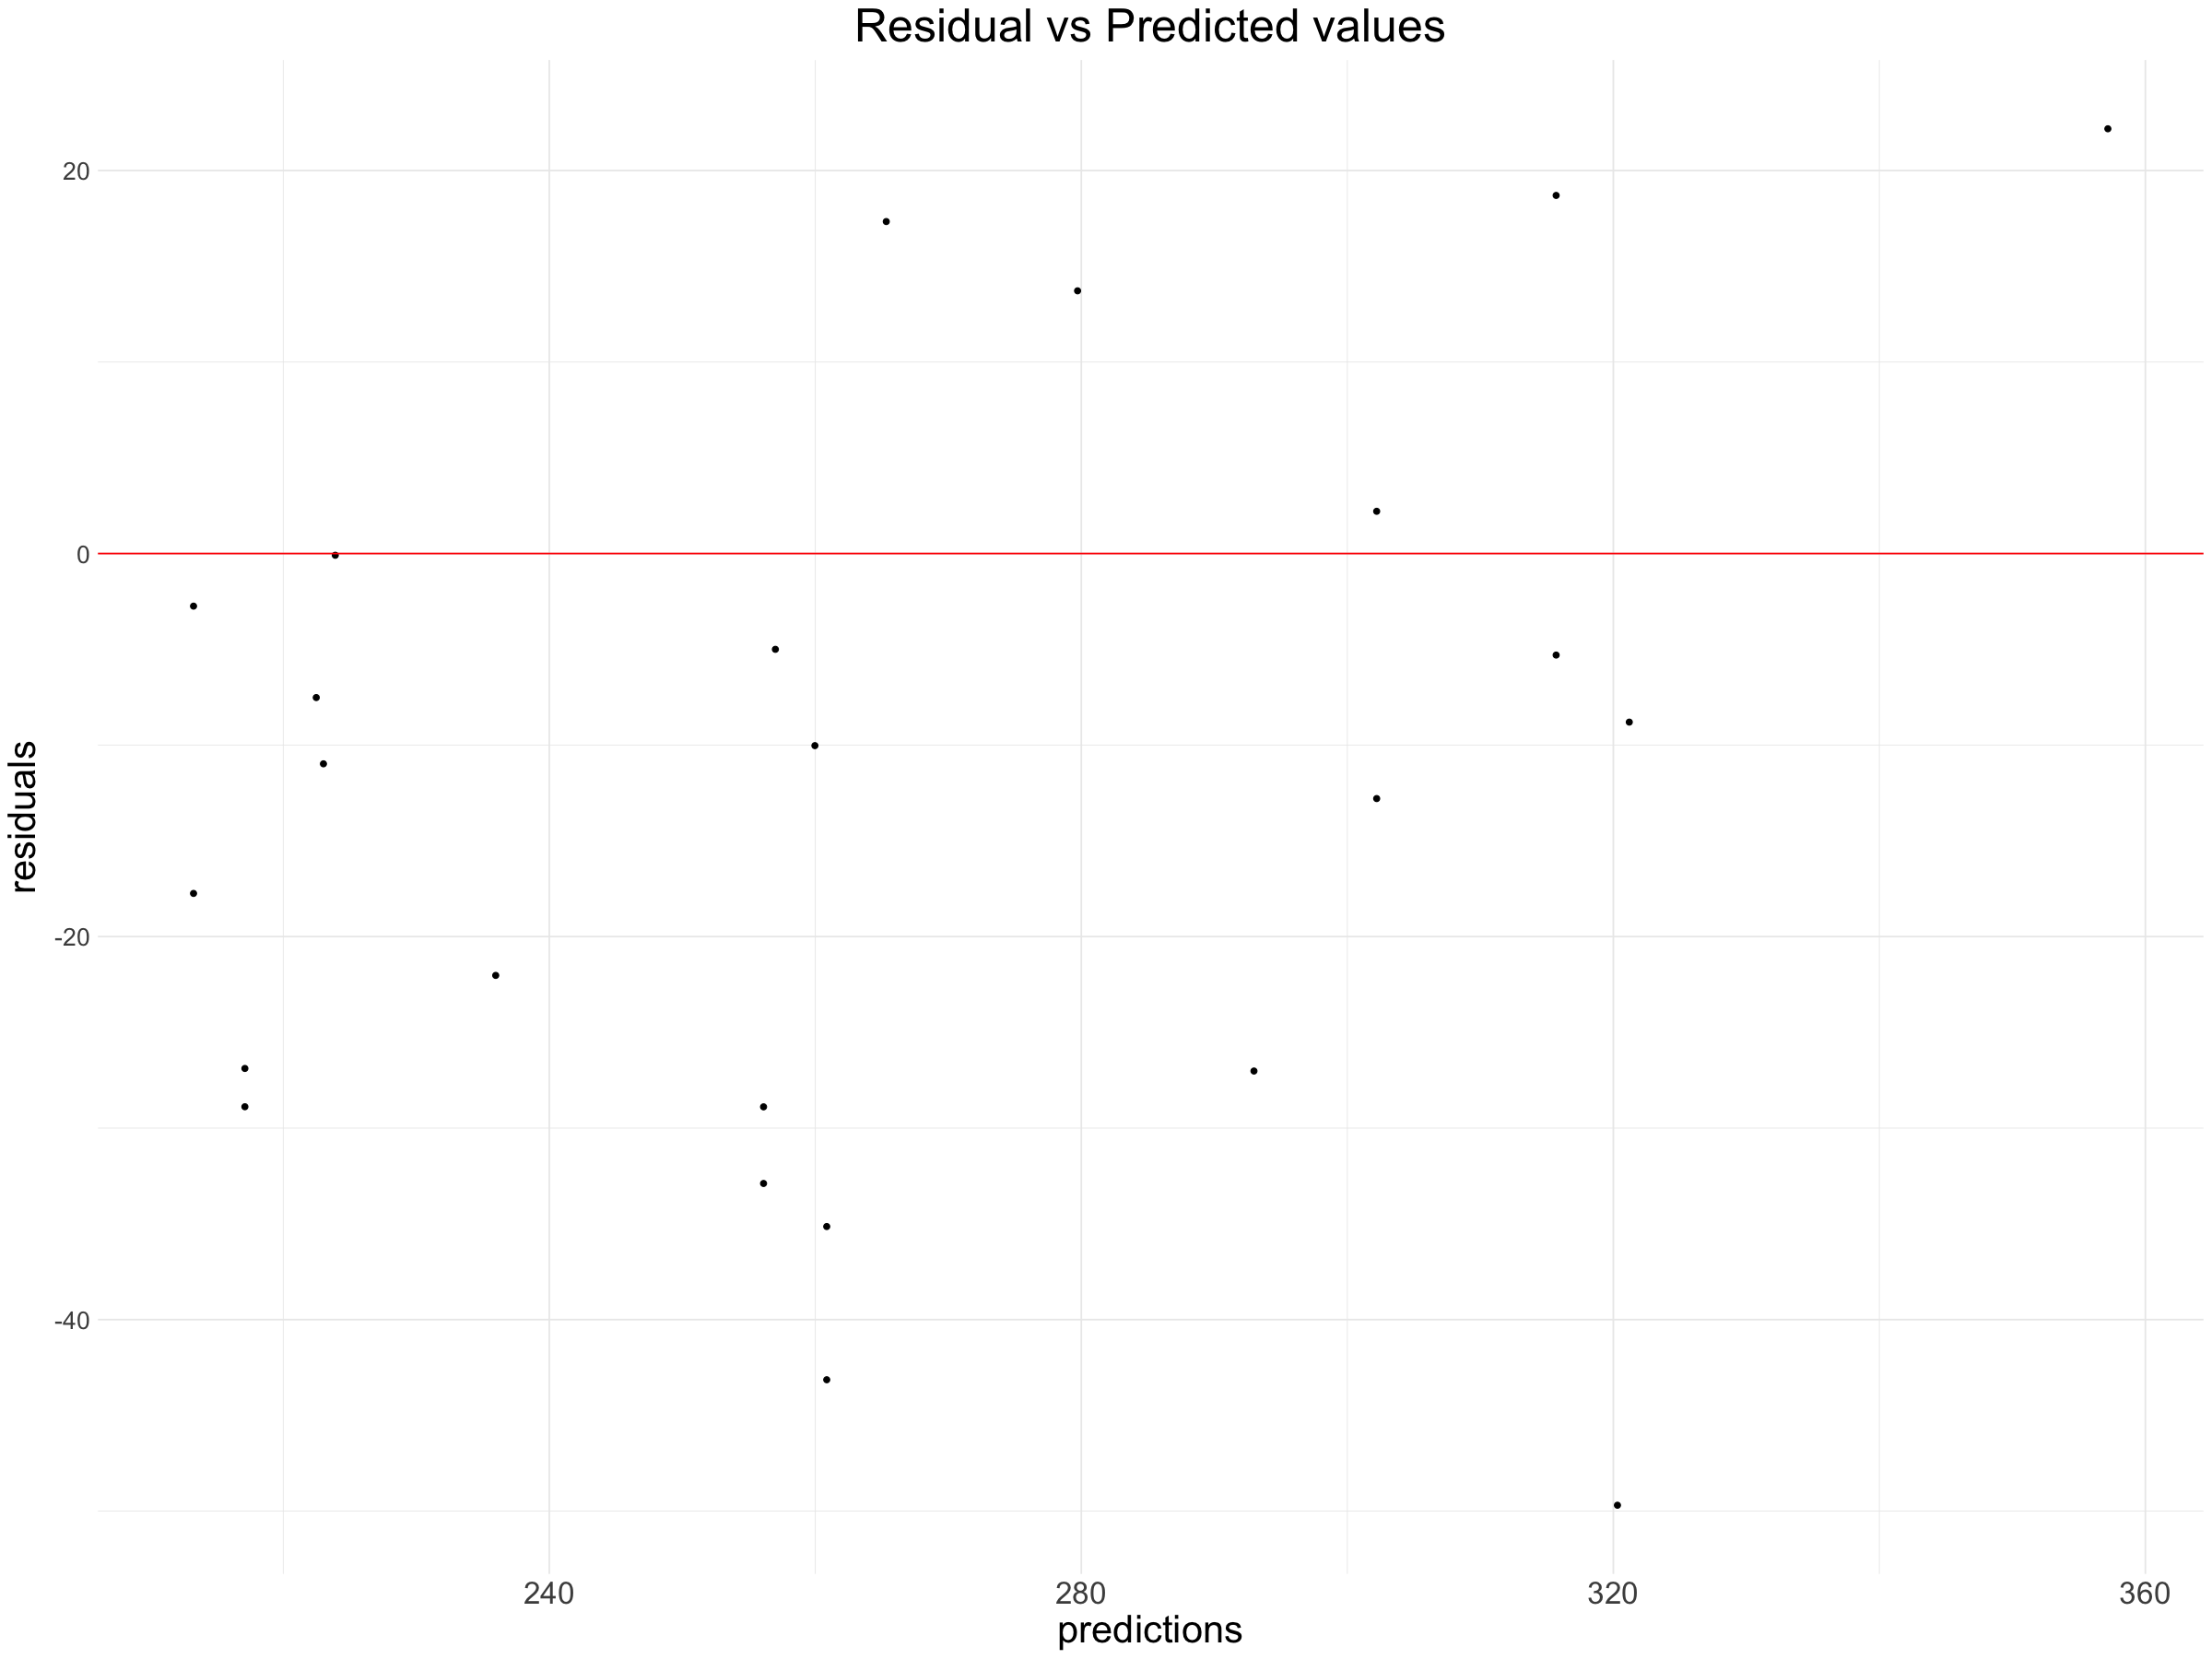

In [33]:
residual_pred_graph <- test_data %>% ggplot(aes(x = predictions, y = residuals)) +
    geom_point() +
    labs(
        title = "Residual vs Predicted values"
    ) +
    geom_hline(yintercept = 0, color = "red")

residual_pred_graph

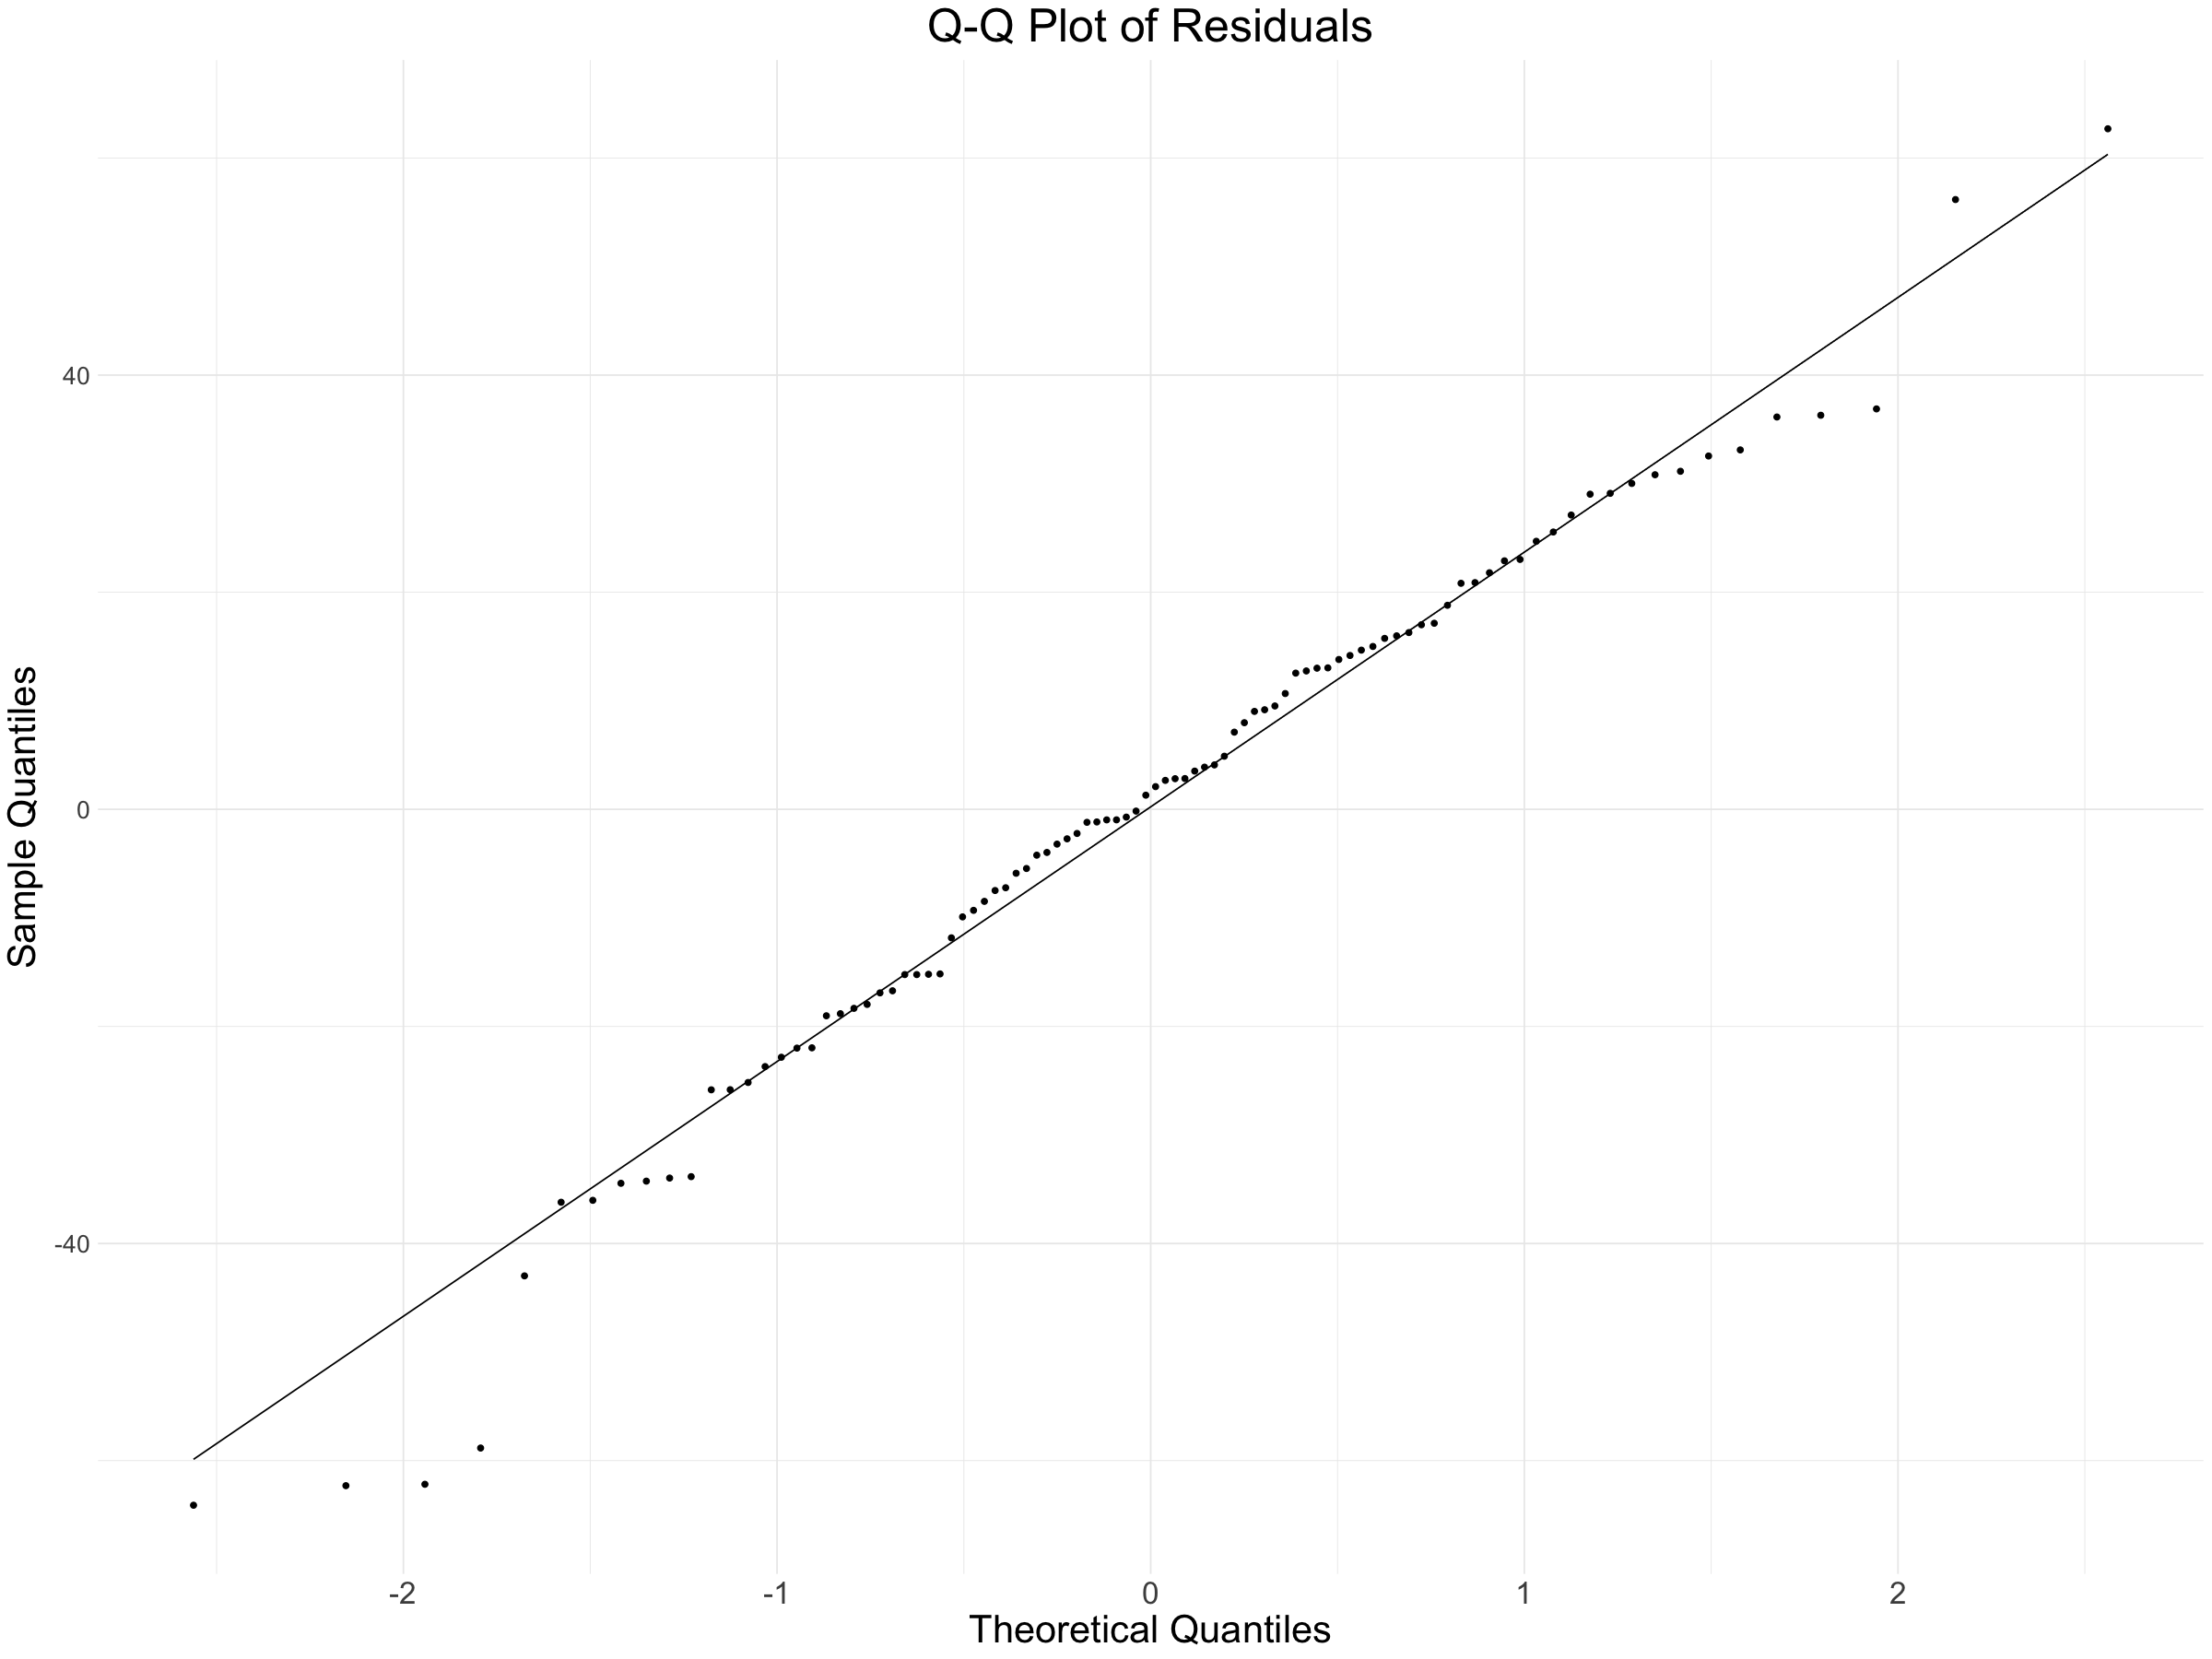

In [34]:
qq_plot <- ggplot(data, aes(sample = residuals)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = "Q-Q Plot of Residuals",
         x = "Theoretical Quantiles",
         y = "Sample Quantiles")

qq_plot

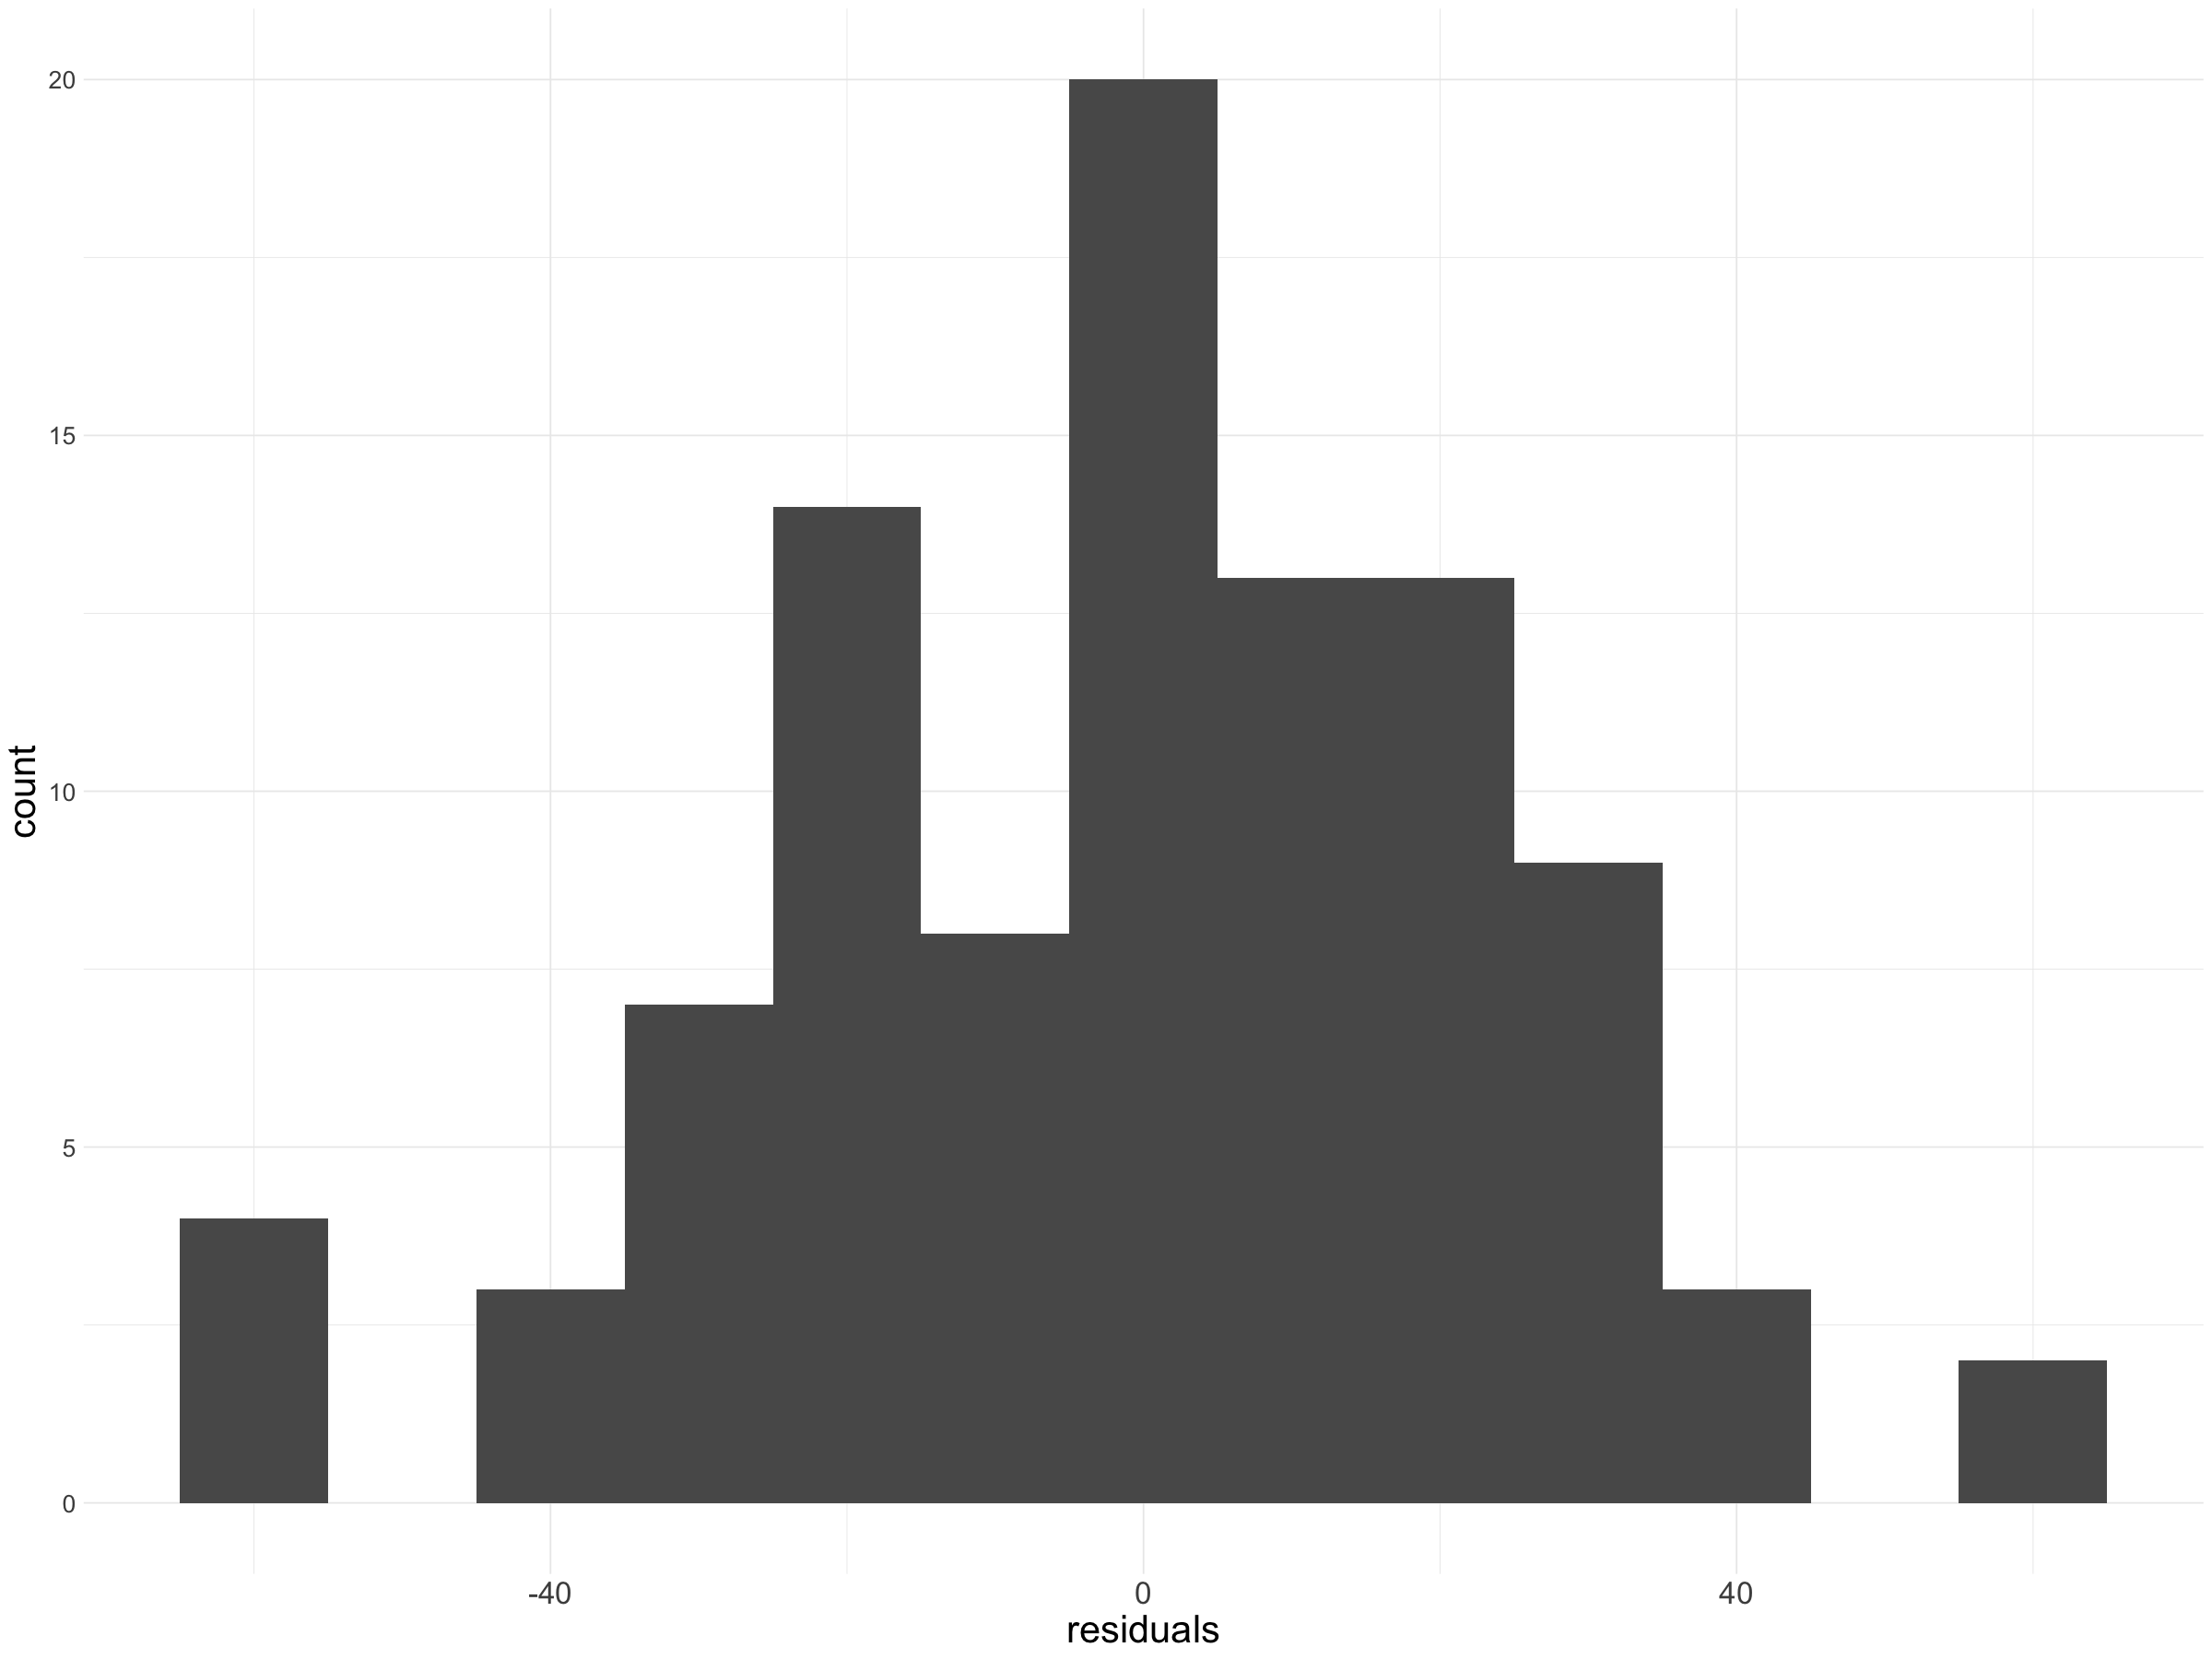

In [35]:
normality <- ggplot(data, aes(x = residuals)) +
    geom_histogram(binwidth = 10)

normality

In [36]:
training$residuals = resid(model)

In [37]:
# add index number 

training %>% mutate(
    index = row_number()
) -> training

In [38]:
training %>% ggplot(aes(x = index, y = residuals)) +
    geom_point() +
    geom_line() +
    labs(
        title = "residual vs index"
    ) -> independence 

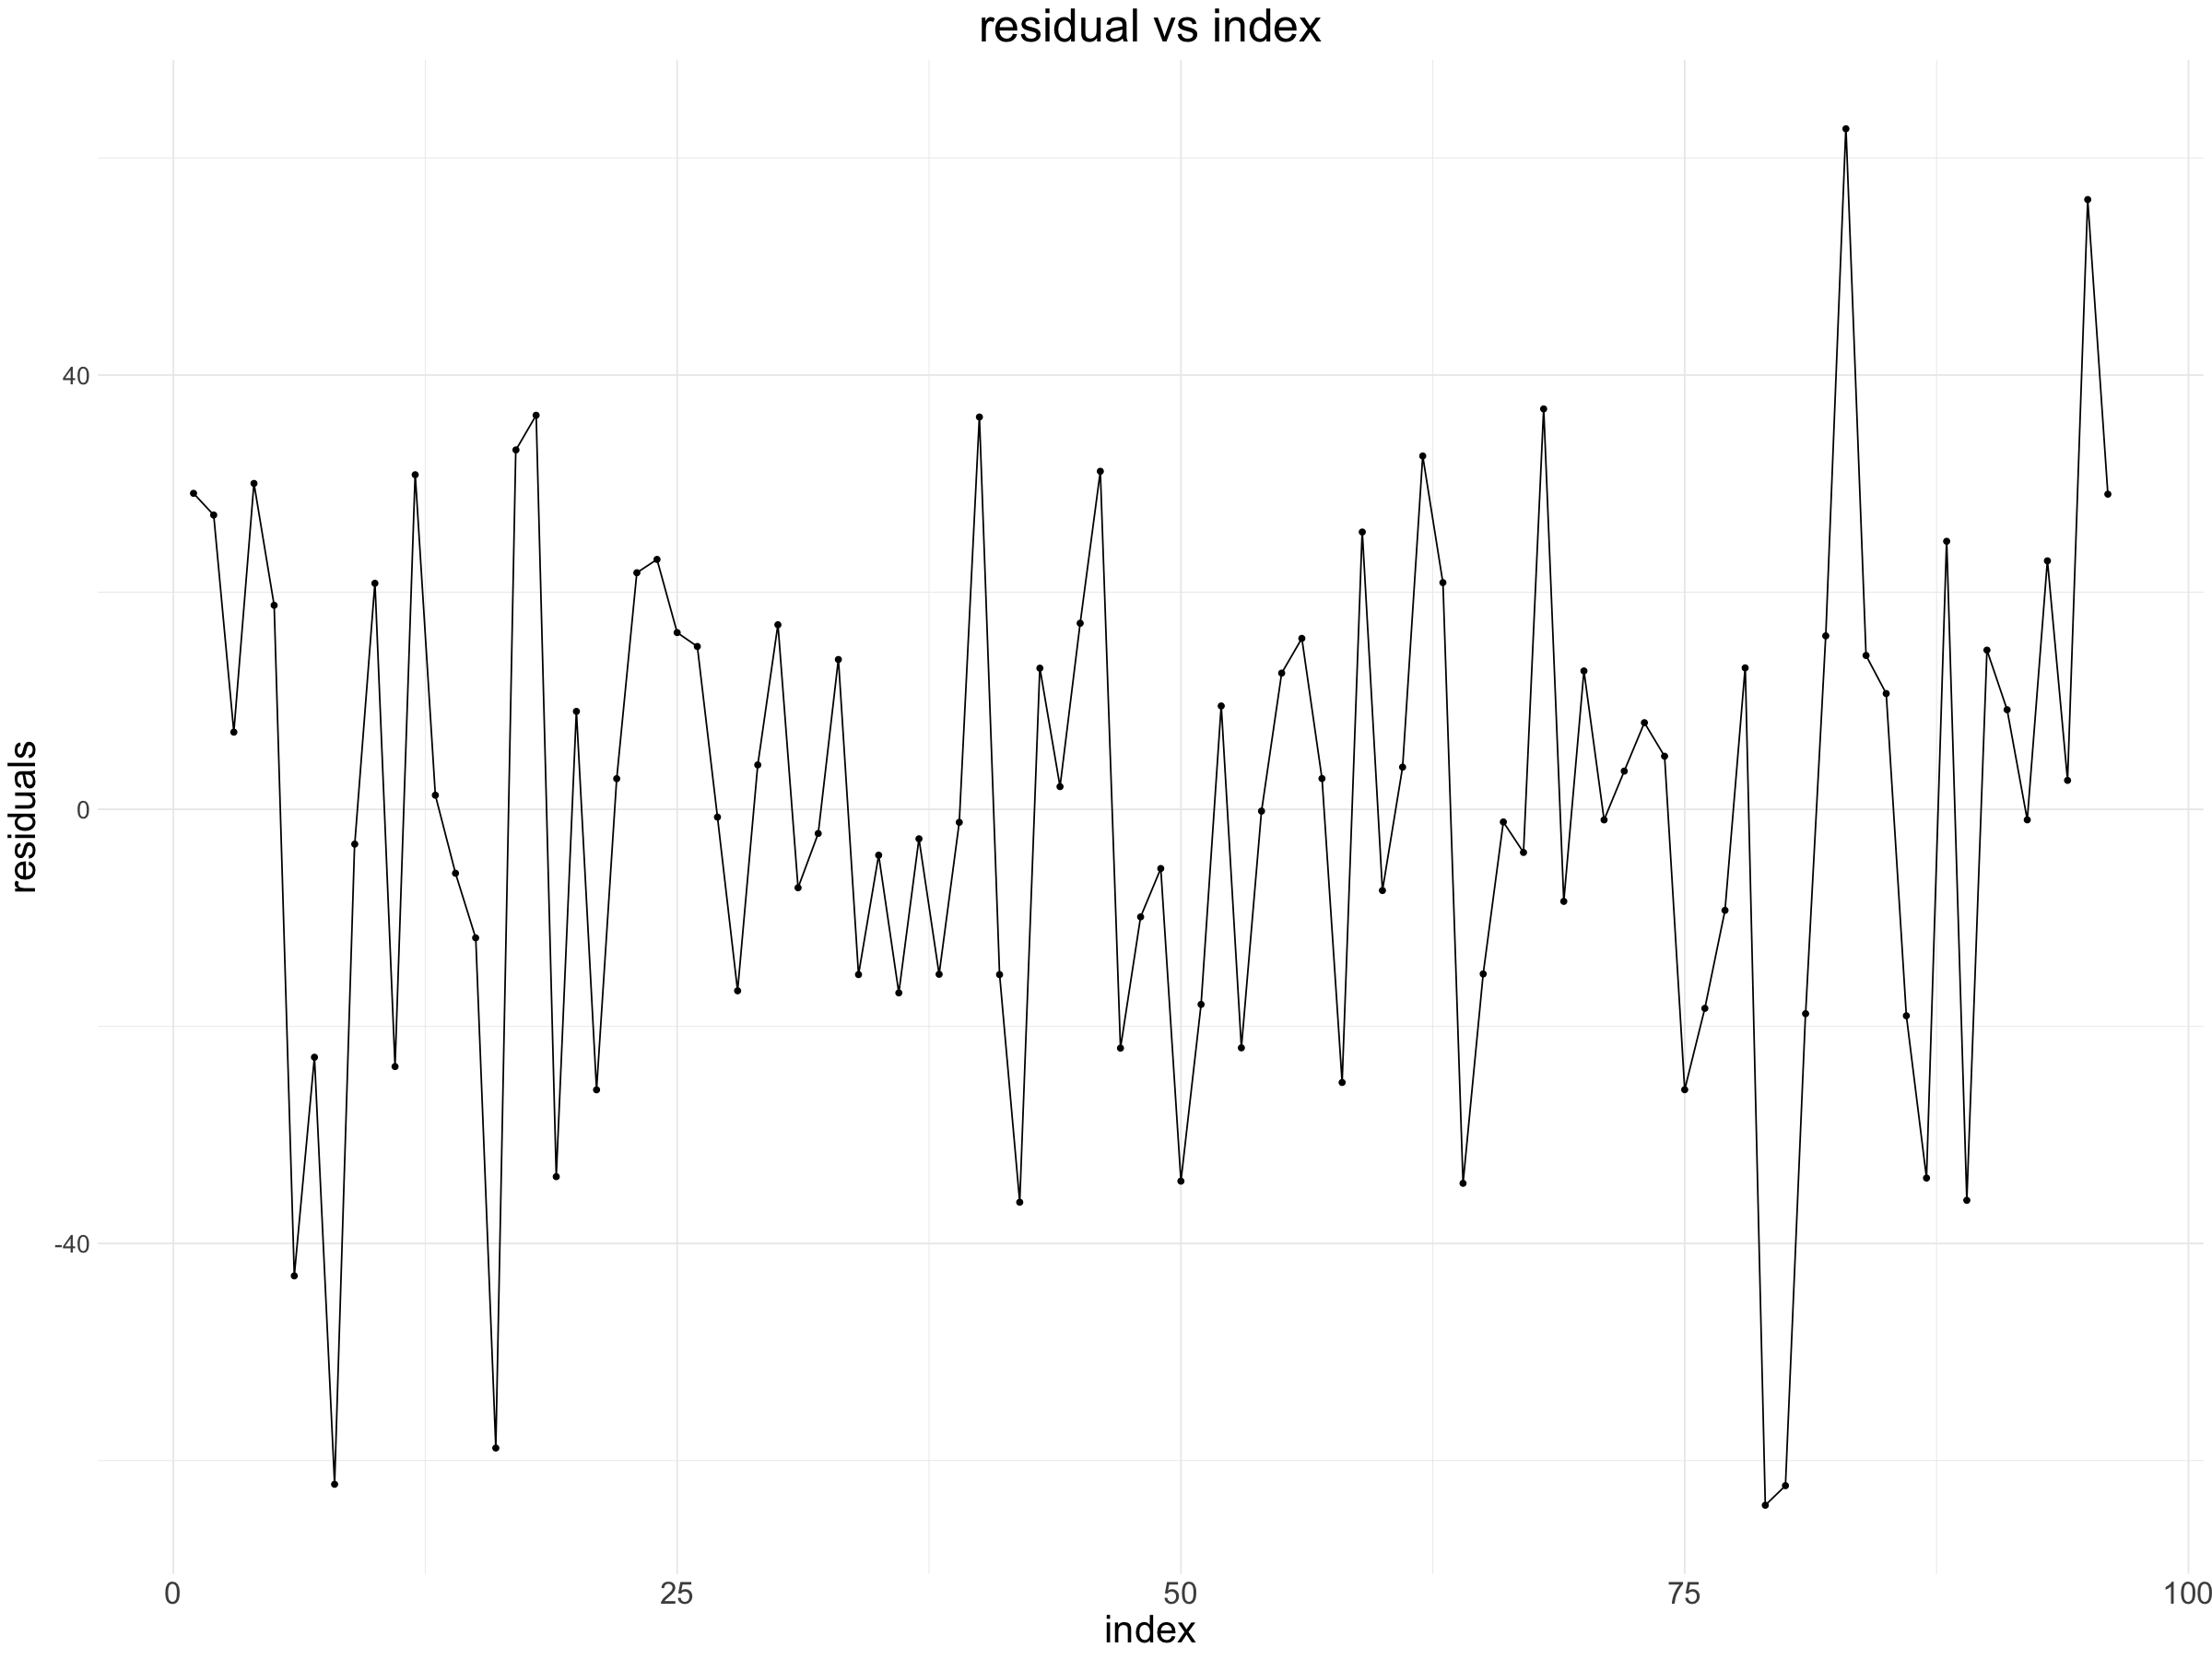

In [39]:
independence

In [40]:
# a function that generates plots of the residuals of each factor levels

resid_and_category_plot <- function(data, category) {
    plot <- ggplot(data, aes(x = category, y = residuals, group = category)) +
        geom_boxplot() +
        geom_hline(yintercept = 0, color = "red") +
        labs(x = deparse(substitute(category))) +
        theme(
            axis.title.y = element_blank()
        
        )

        
    
    plot
}

In [41]:
training %>% head()

time,coffee,reaction_time,person,residuals,index
<fct>,<chr>,<dbl>,<chr>,<dbl>,<int>
morning,yes,289,Michael,29.109164,1
morning,yes,287,Michael,27.109164,2
morning,yes,267,Michael,7.109164,3
midday,yes,323,Michael,30.020529,4
afternoon,yes,321,Michael,18.794383,5
midday,yes,250,Michael,-42.979471,6


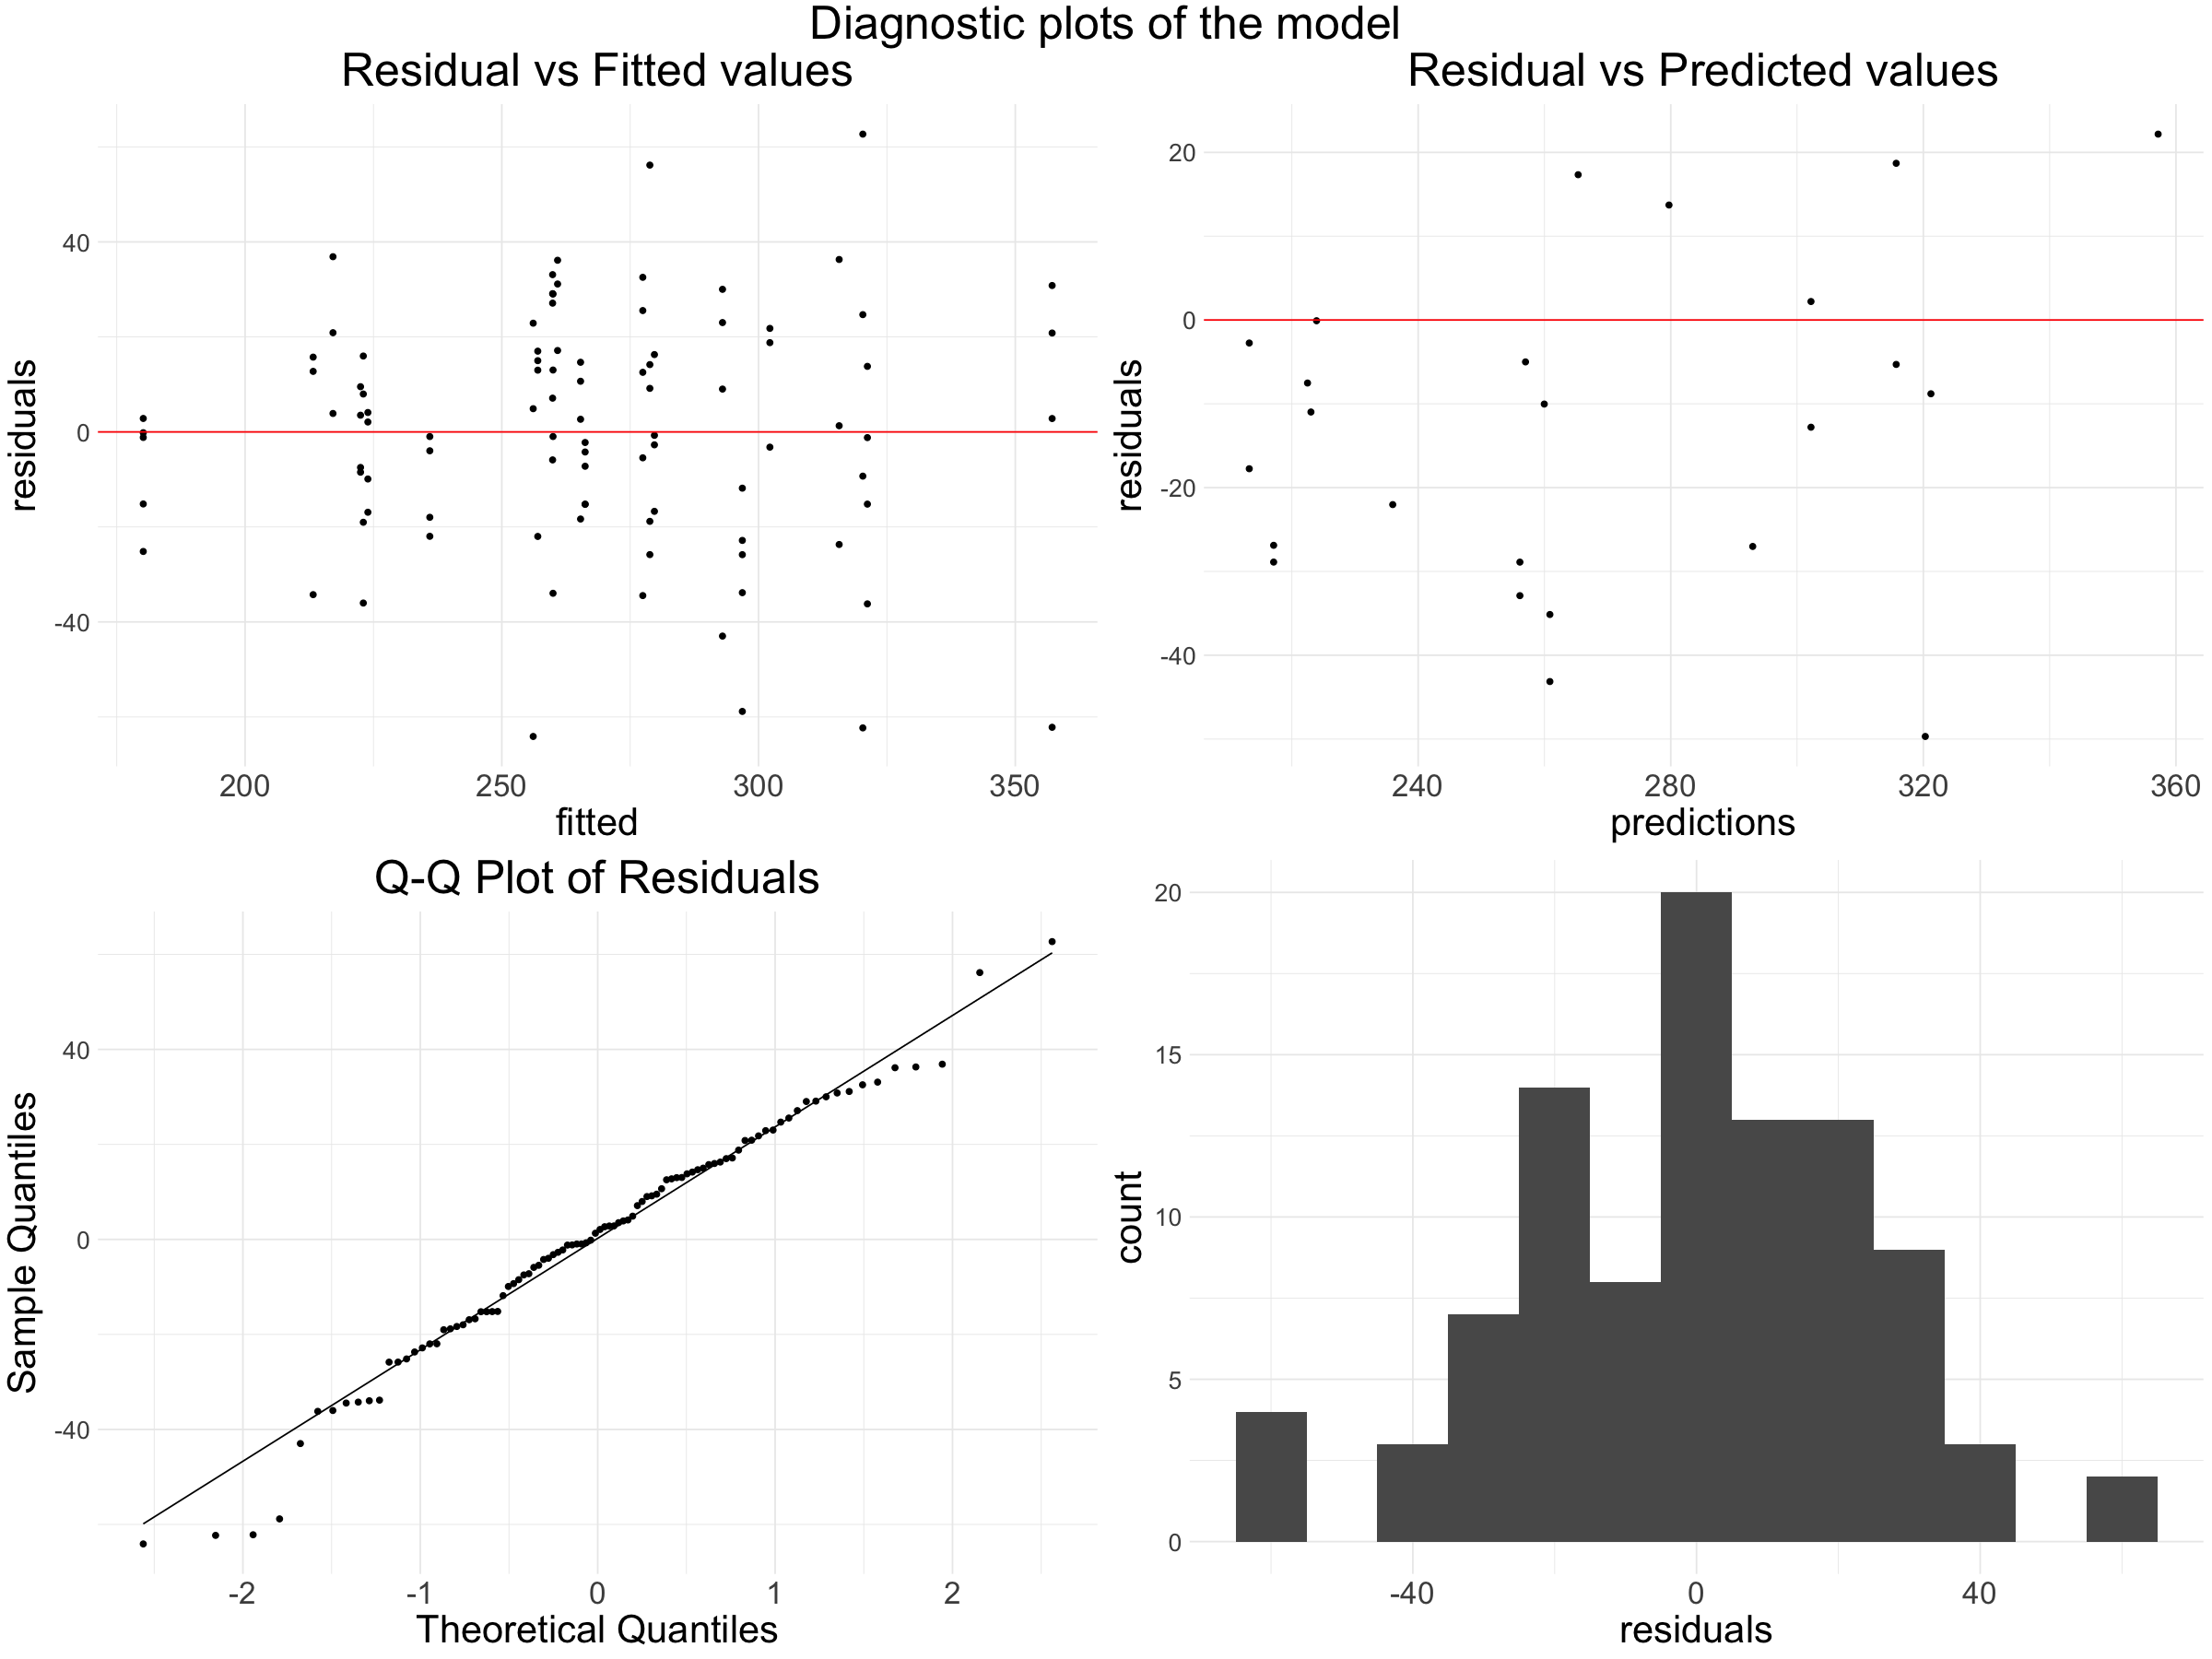

In [42]:
grid.arrange(
    residual_fitted_graph,
    residual_pred_graph,
    qq_plot,
    normality,
    ncol = 2,
    top = textGrob("Diagnostic plots of the model", gp = gpar(fontsize = 30))


)

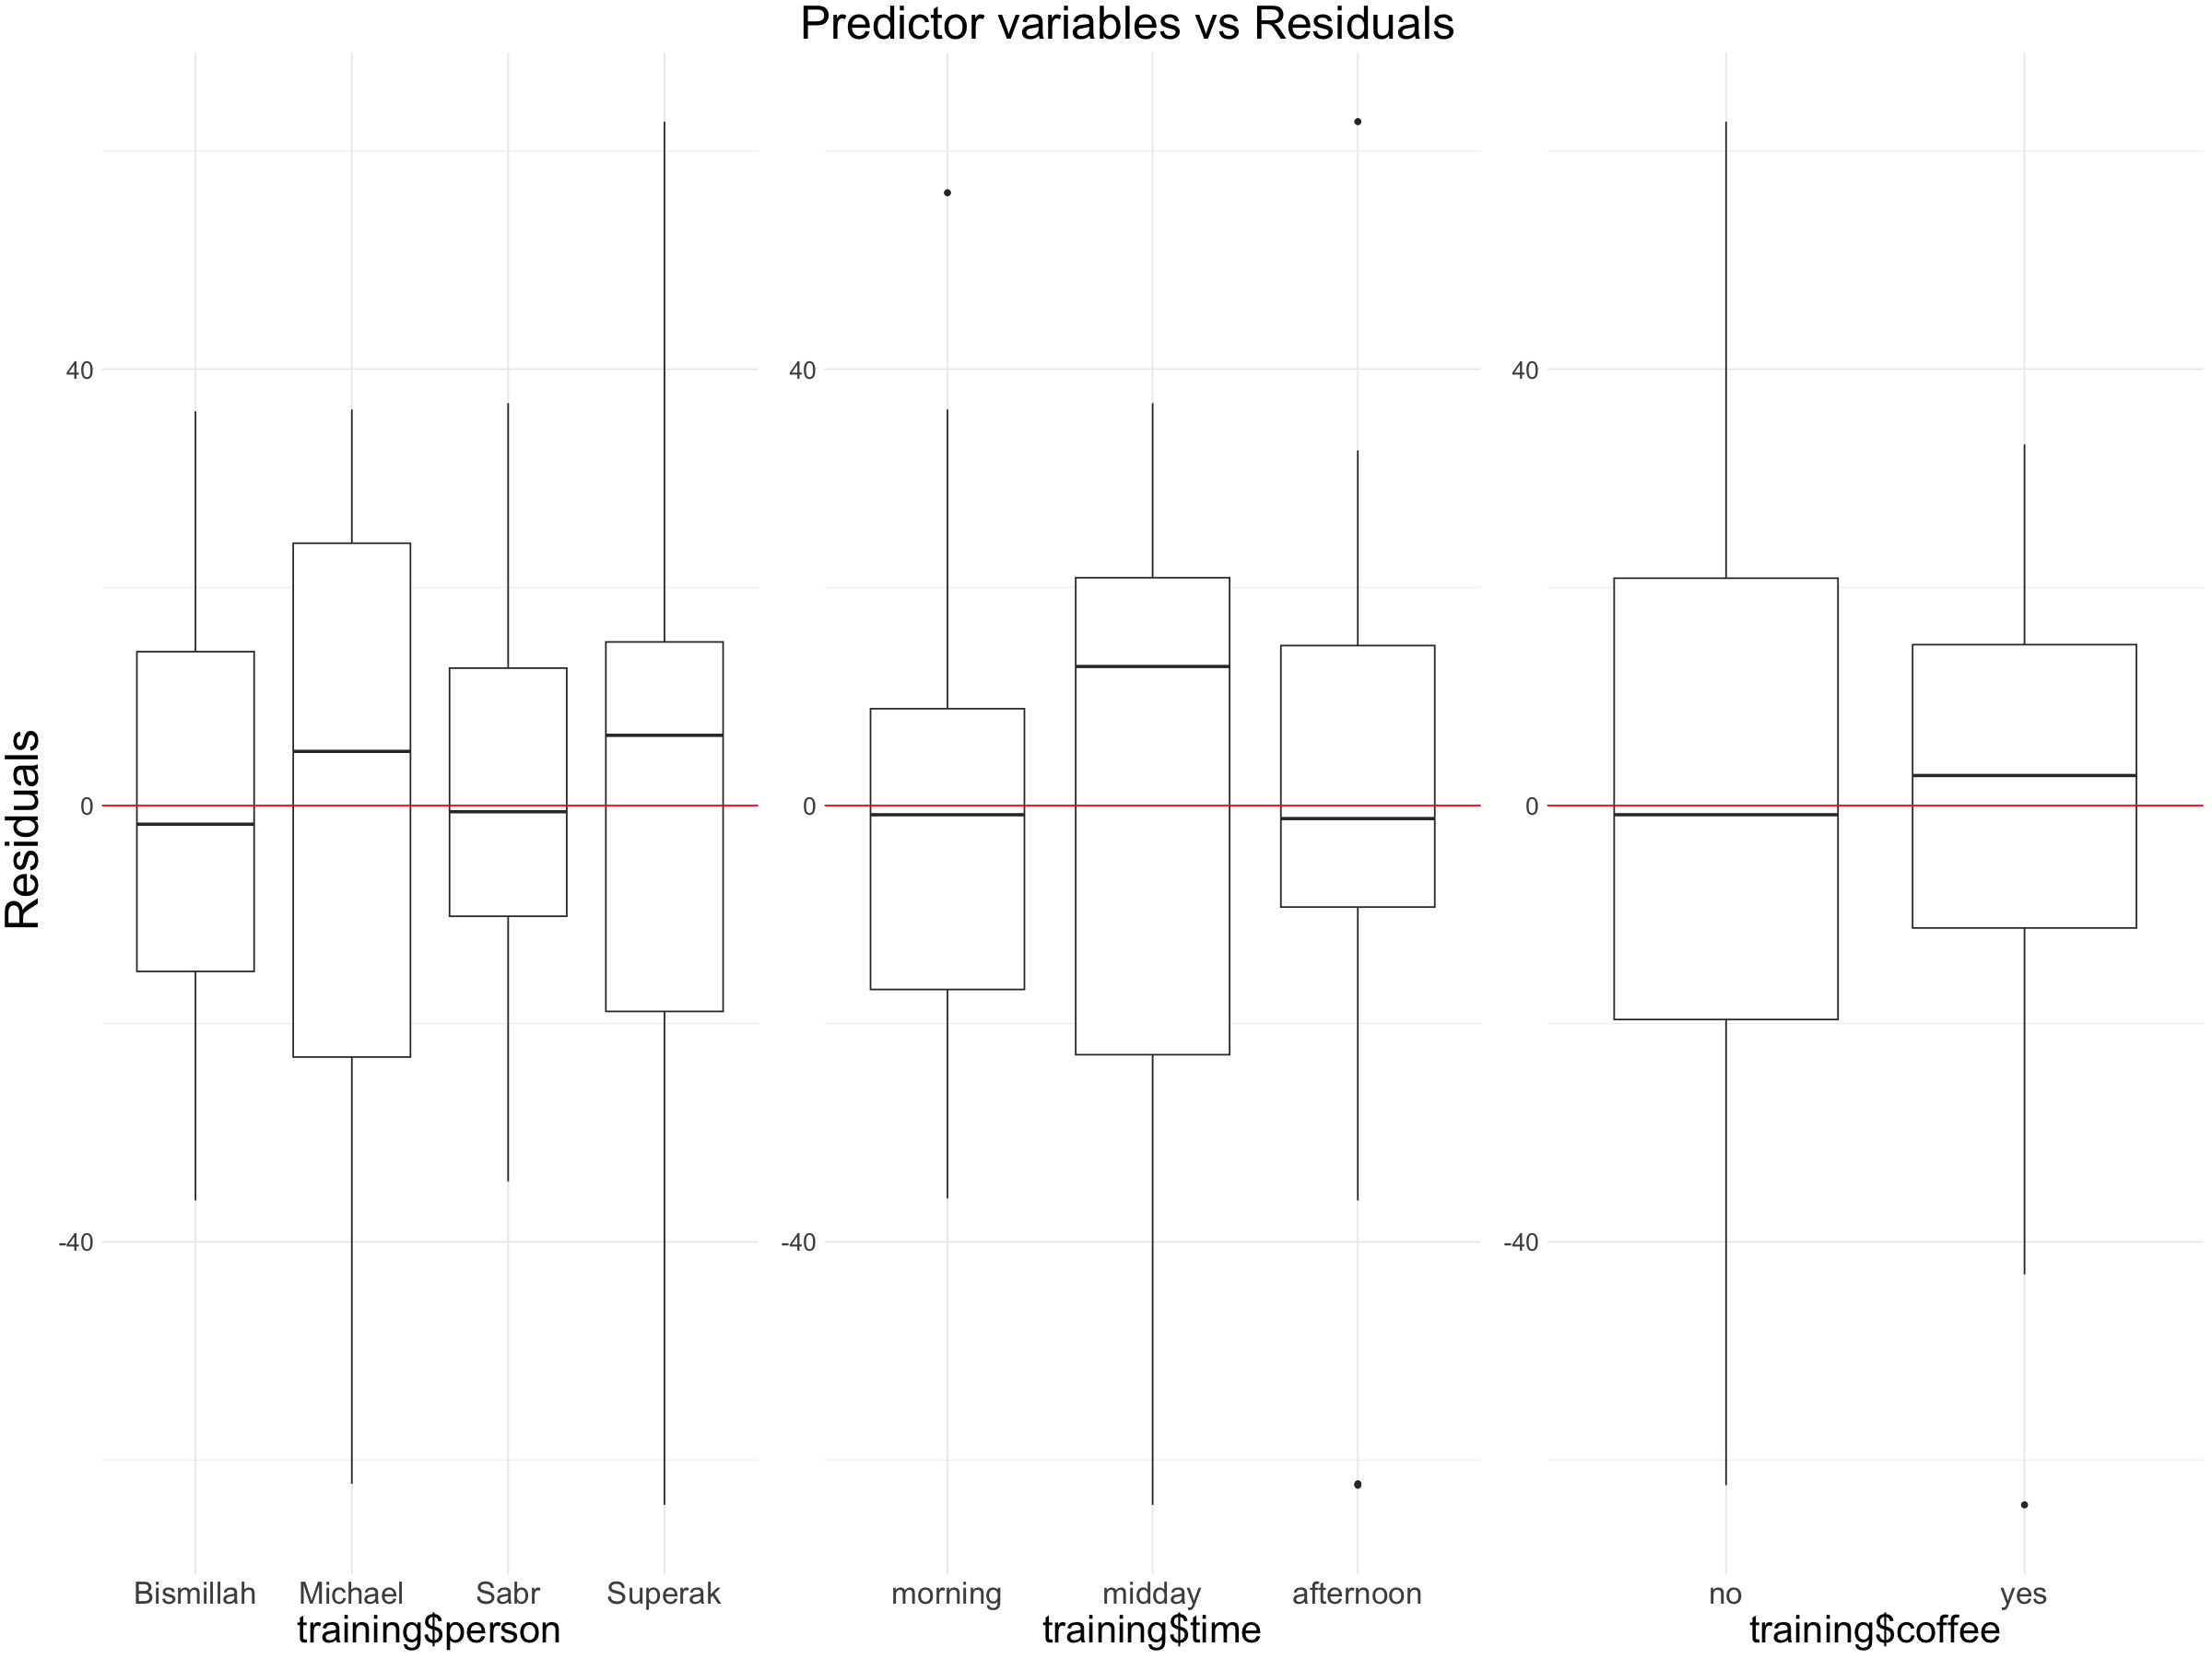

In [43]:
grid.arrange(
    resid_and_category_plot(training, training$person),
    resid_and_category_plot(training, training$time),
    resid_and_category_plot(training, training$coffee),
    top = textGrob("Predictor variables vs Residuals", gp = gpar(fontsize = 30)),
    left = textGrob("Residuals", rot = 90, gp = gpar(fontsize = 30)),
    ncol = 3
)

# ANOVA

In [44]:
training %>% head()

time,coffee,reaction_time,person,residuals,index
<fct>,<chr>,<dbl>,<chr>,<dbl>,<int>
morning,yes,289,Michael,29.109164,1
morning,yes,287,Michael,27.109164,2
morning,yes,267,Michael,7.109164,3
midday,yes,323,Michael,30.020529,4
afternoon,yes,321,Michael,18.794383,5
midday,yes,250,Michael,-42.979471,6


In [45]:
full_model <- lm(data = training, reaction_time ~ coffee * time * person)

In [46]:
# ANOVA SUMMARY

aov(full_model) %>% summary()

                   Df Sum Sq Mean Sq F value   Pr(>F)    
coffee              1  39976   39976  65.109 1.14e-11 ***
time                2  30082   15041  24.497 7.66e-09 ***
person              3  74071   24690  40.213 2.24e-15 ***
coffee:time         2  13394    6697  10.907 7.28e-05 ***
coffee:person       3   4901    1634   2.661   0.0545 .  
time:person         6   6894    1149   1.871   0.0975 .  
coffee:time:person  6   1856     309   0.504   0.8036    
Residuals          72  44207     614                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [47]:
# reduced model based on significant result

reduced_model <- lm(data = training, reaction_time ~ time * coffee + person)

In [48]:
reduced_model <- aov(reduced_model)

In [49]:
reduced_model %>% summary()

            Df Sum Sq Mean Sq F value   Pr(>F)    
time         2  32314   16157   24.30 4.14e-09 ***
coffee       1  37744   37744   56.76 4.35e-11 ***
person       3  74071   24690   37.13 1.52e-15 ***
time:coffee  2  13394    6697   10.07 0.000116 ***
Residuals   87  57858     665                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [50]:
# Tukey hsd on the reduced model 

aov(reduced_model) %>% TukeyHSD()

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = reduced_model)

$time
                      diff       lwr      upr     p adj
midday-morning    14.07302 -1.470449 29.61649 0.0841729
afternoon-morning 43.20677 28.180297 58.23325 0.0000000
afternoon-midday  29.13375 13.482248 44.78525 0.0000779

$coffee
            diff       lwr       upr p adj
yes-no -39.61917 -50.08197 -29.15637     0

$person
                        diff       lwr       upr     p adj
Michael-Bismillah  33.989117  14.48924  53.48900 0.0000948
Sabr-Bismillah    -43.978061 -63.47794 -24.47818 0.0000004
Superak-Bismillah  -1.747973 -21.24785  17.75191 0.9954095
Sabr-Michael      -77.967178 -97.46706 -58.46730 0.0000000
Superak-Michael   -35.737090 -55.23697 -16.23721 0.0000382
Superak-Sabr       42.230088  22.73021  61.72997 0.0000011

$`time:coffee`
                                  diff        lwr       upr     p adj
midday:no-morning:no       -13.5119925  -40.52161  13.49

In [51]:
TukeyHSD(aov(reduced_model))$`time:coffee`

,diff,lwr,upr,p adj
midday:no-morning:no,-13.5119925,-40.52161,13.49763,6.916102e-01
afternoon:no-morning:no,40.3976045,14.22085,66.57436,2.981680e-04
morning:yes-morning:no,-55.5802092,-81.40201,-29.75841,1.983157e-07
midday:yes-morning:no,-17.3230106,-44.82600,10.17998,4.487793e-01
afternoon:yes-morning:no,-14.4971685,-41.06758,12.07324,6.072746e-01
afternoon:no-midday:no,53.9095970,27.28714,80.53206,1.002035e-06
morning:yes-midday:no,-42.0682167,-68.34174,-15.79469,1.572487e-04
midday:yes-midday:no,-3.8110181,-31.73855,24.11652,9.986750e-01
afternoon:yes-midday:no,-0.9851761,-27.99480,26.02445,9.999980e-01
morning:yes-afternoon:no,-95.9778137,-121.39436,-70.56126,3.090365e-10


## testing the model on the testing data

In [52]:
model %>% predict(testing) -> y_pred

resid = y_pred - testing$reaction_time

In [53]:
test_result <- tibble(
    pred = y_pred,
    actual = testing$reaction_time,
    resid = resid

)

In [54]:
test_result %>% head()

pred,actual,resid
<dbl>,<dbl>,<dbl>
315.6987,297,18.698726
315.6987,321,-5.301274
302.2056,315,-12.794383
292.9795,320,-27.020529
357.1785,335,22.178532
302.2056,300,2.205617


In [55]:
resid %>% abs() %>% mean()

[1] 18.73847

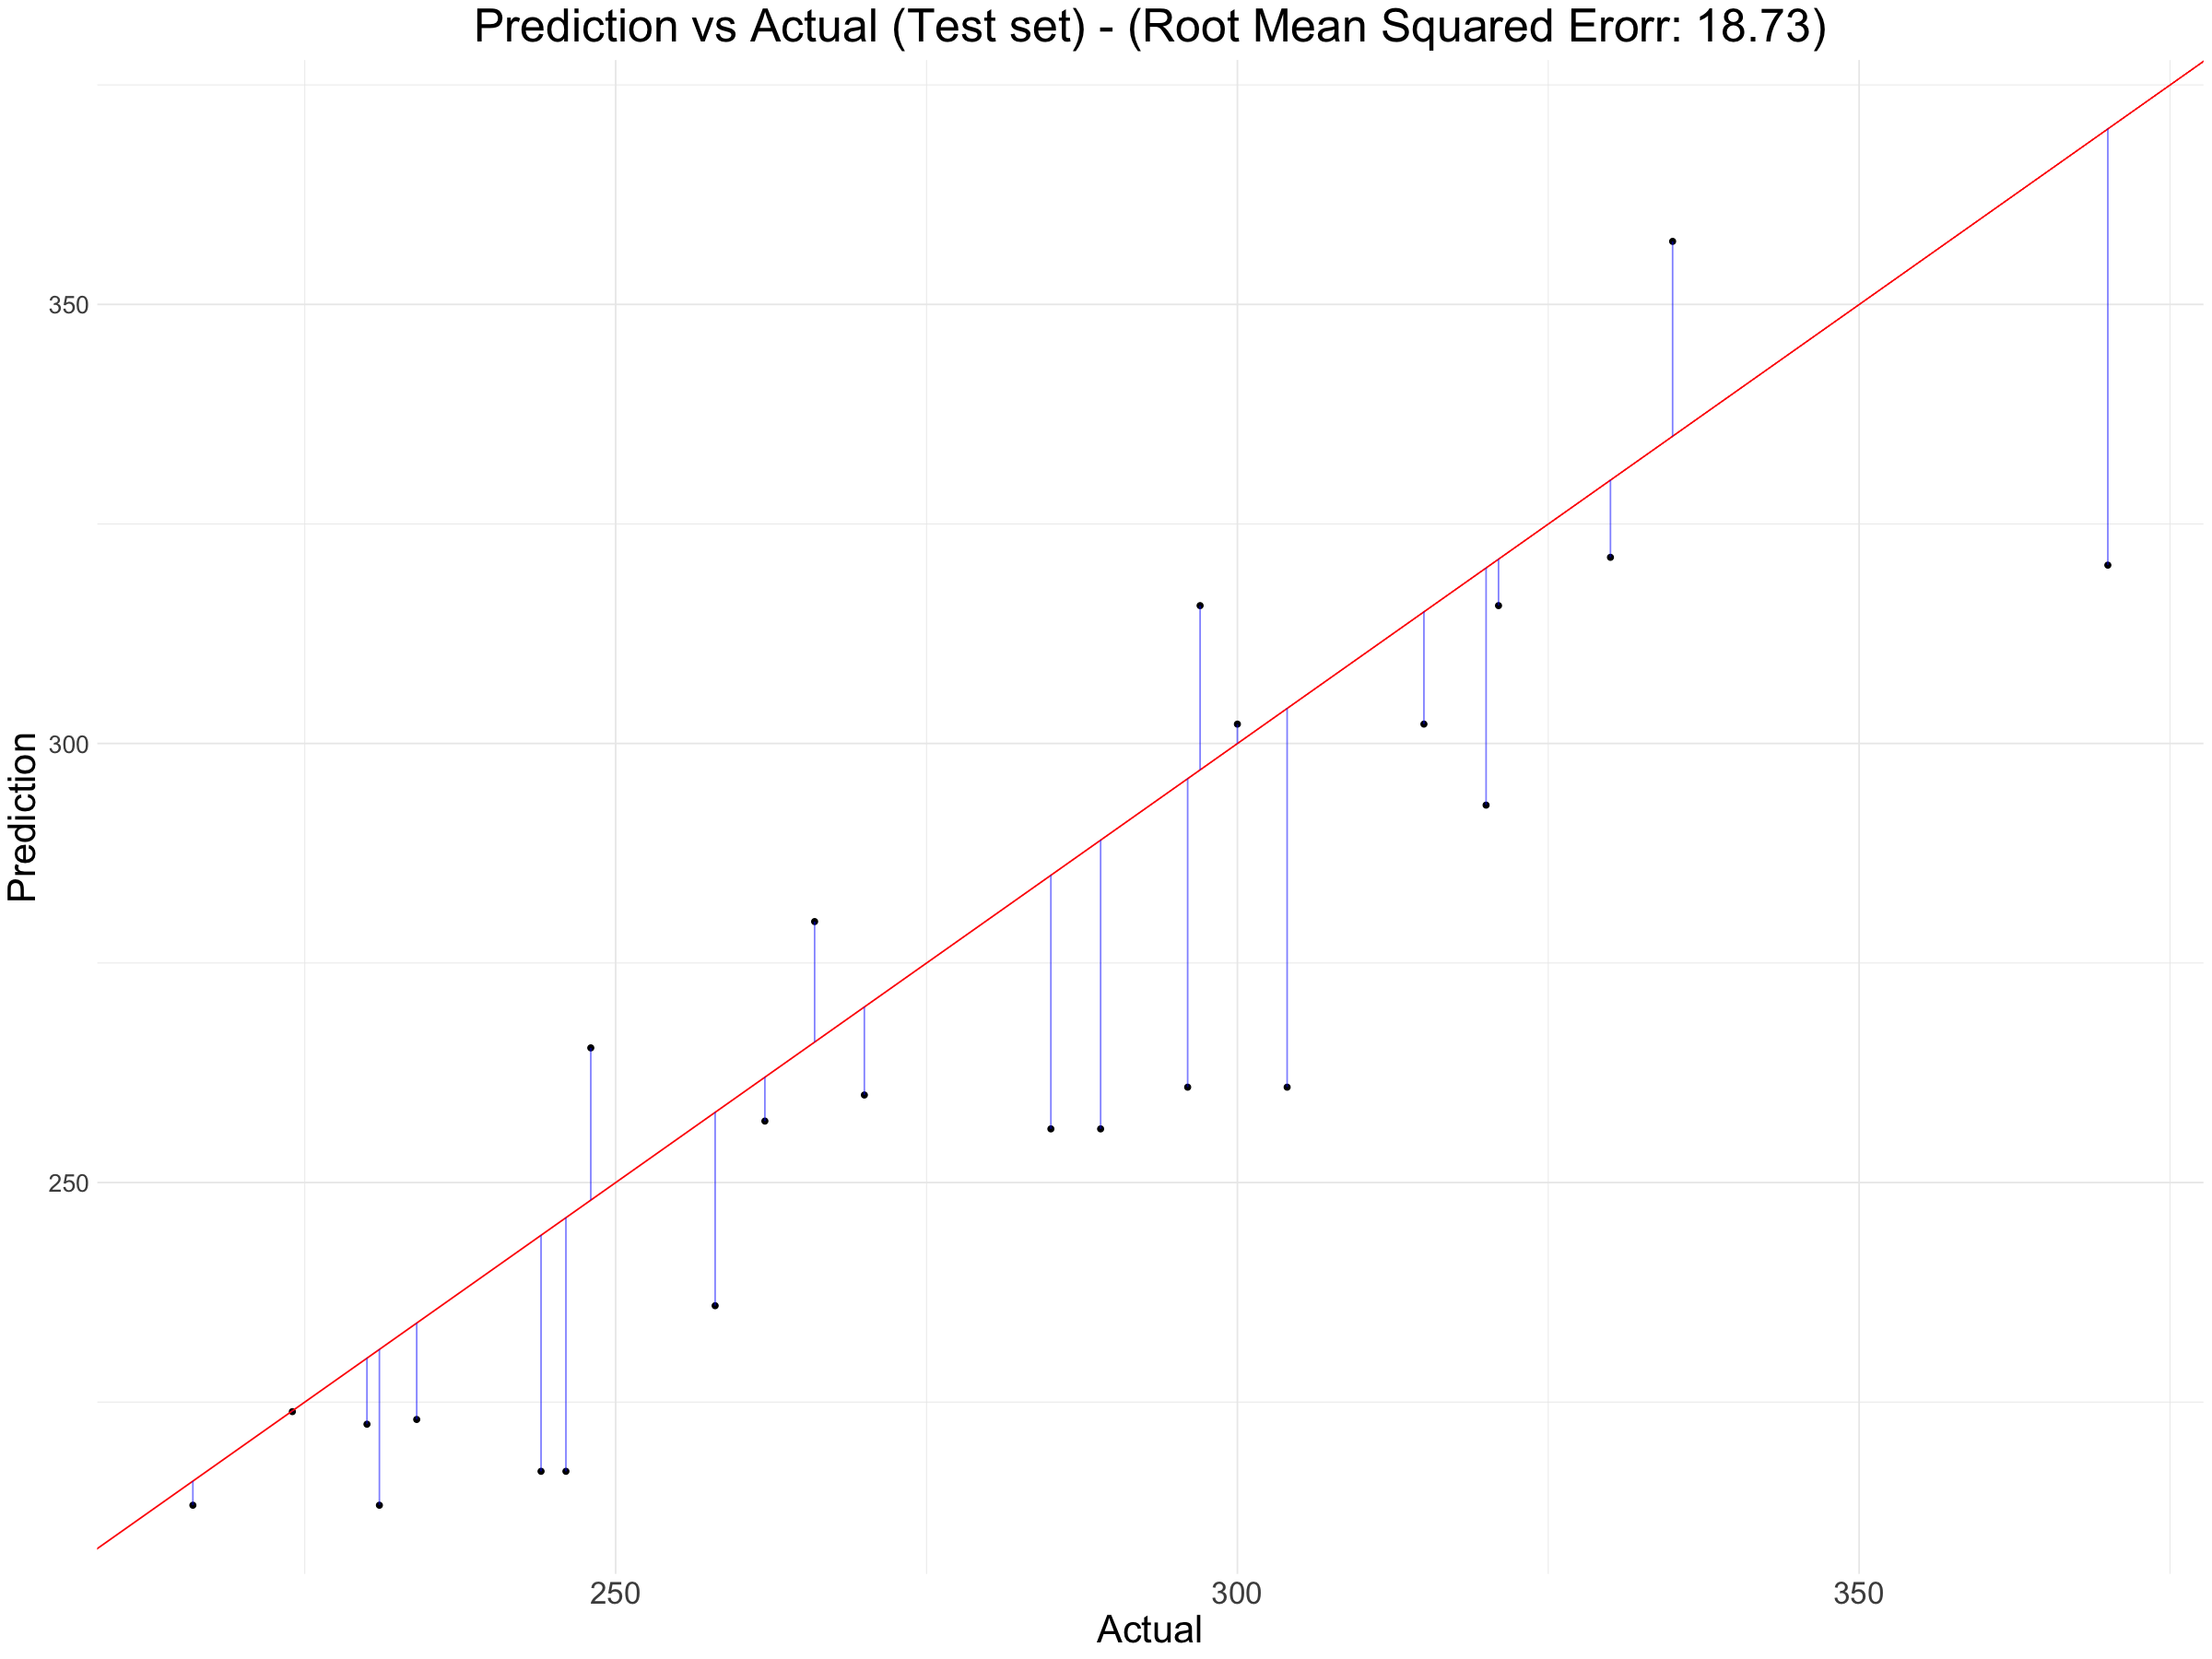

In [56]:
# actual vs predicted plot 

ggplot(aes(x = actual, y = pred), data = test_result) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    geom_segment(aes(x = actual, y = pred, xend = actual, yend = actual), 
               color = "blue", alpha = 0.5, data = test_result) +

    labs(
        title = "Prediction vs Actual (Test set) - (Root Mean Squared Erorr: 18.73)",
        x = "Actual",
        y = "Prediction"
    
    )


In [57]:
model %>% summary()


Call:
lm(formula = reaction_time ~ person + coffee + time + coffee:time, 
    data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-64.109 -15.598   1.696  16.055  62.692 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             279.7179     7.9189  35.323  < 2e-16 ***
personMichael            35.9808     7.4942   4.801 6.51e-06 ***
personSabr              -43.7452     7.4638  -5.861 8.06e-08 ***
personSuperak            -0.8897     7.4649  -0.119 0.905400    
coffeeyes               -55.8079     8.8888  -6.278 1.30e-08 ***
timemidday              -18.8586     9.3112  -2.025 0.045895 *  
timeafternoon            41.4798     8.9986   4.610 1.37e-05 ***
coffeeyes:timemidday     51.9472    13.0878   3.969 0.000148 ***
coffeeyes:timeafternoon   0.8350    12.6686   0.066 0.947601    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.79 on 87 degrees of freedom
Multiple R-squared:  